**<p style="font-size:30px;">.ipynb file for CIND 820 Capstone Project</p>**

**Student Name: Arunkumar Cherungot Meppadathkalam**

**Student No.: 501277792**

**Github Repository:** https://github.com/acherungotTMU/TMU_Capstone

**Supervisor Name: Tamer Abdou**

**Date of Submission: 02nd July 2024**


**<p style="font-size:20px;">Cleaning and Summarizing the Data</p>**

In [49]:
# importing pandas library
import pandas as pd

In [50]:
# reading the electric vehicle population data '.csv' file and storing it in 'electric_v' dataframe
electric_v = pd.read_csv("D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/Electric_Vehicle_Population_Data.csv")

In [51]:
# printing the dimensions of 'electric_v'
print(electric_v.shape)

(186879, 17)


In [52]:
# getting an overview of 'electric_v' by printing the first 5 observations
print(electric_v.head())

   VIN (1-10)  County       City State  Postal Code  Model Year   Make  \
0  WBY8P6C58K    King    Seattle    WA      98115.0        2019    BMW   
1  5YJSA1DN4D  Kitsap  Bremerton    WA      98312.0        2013  TESLA   
2  5YJSA1E26J    King       Kent    WA      98042.0        2018  TESLA   
3  WBY2Z2C54E    King   Bellevue    WA      98004.0        2014    BMW   
4  5YJXCDE23J    King   Bellevue    WA      98004.0        2018  TESLA   

     Model                   Electric Vehicle Type  \
0       I3          Battery Electric Vehicle (BEV)   
1  MODEL S          Battery Electric Vehicle (BEV)   
2  MODEL S          Battery Electric Vehicle (BEV)   
3       I8  Plug-in Hybrid Electric Vehicle (PHEV)   
4  MODEL X          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             153   
1           Clean Alternative Fuel Vehicle Eligible             208   
2           Clean

In [53]:
# printing a concise summary of 'electric_v' dataframe
print(electric_v.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186879 entries, 0 to 186878
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         186879 non-null  object 
 1   County                                             186876 non-null  object 
 2   City                                               186876 non-null  object 
 3   State                                              186879 non-null  object 
 4   Postal Code                                        186876 non-null  float64
 5   Model Year                                         186879 non-null  int64  
 6   Make                                               186879 non-null  object 
 7   Model                                              186879 non-null  object 
 8   Electric Vehicle Type                              186879 non-null  object

**Cleaning the Data**

In [54]:
# checking if there are any duplicate entries in the dataframe
print(electric_v['DOL Vehicle ID'].duplicated().sum())

0


In [55]:
# checking for null values in the dataframe
print(electric_v.isnull().sum())

VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 403
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [56]:
# dropping the observations having null values under 'Legislative District' as those observations belongs to states other than Washington
electric_v = electric_v.dropna(subset=['Legislative District'])

# dropping observations having null values under 'Vehicle Location'
electric_v = electric_v.dropna(subset=['Vehicle Location'])

# checking for null values again
print(electric_v.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [57]:
# checking the data types of variables in 'electric_v' dataframe
print(electric_v.dtypes)

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [58]:
# importing 're' library for matching regular expressions
import re

# defining a function to match a regular expression and returning a tuple with two values
def get_coordinates(location):
    if location and isinstance(location, str):
        extractor = re.match(r'POINT \(([^ ]+) ([^ ]+)\)', location)
        if extractor:
            lat = float(extractor.group(2))
            long = float (extractor.group(1))
            return lat, long
    return None, None

# applying the function to the 'Vehicle Location' variable in 'electric_v' data frame 
# storing the values in two new variables named 'Latitude' and 'Longitude'
electric_v['Latitude'], electric_v['Longitude'] = zip(*electric_v['Vehicle Location'].apply(get_coordinates))

# Insert the new columns just after 'Vehicle Location' for contextual relevance
location_index = electric_v.columns.get_loc('Vehicle Location')
electric_v.insert(location_index + 1, 'Latitude', electric_v.pop('Latitude'))
electric_v.insert(location_index + 2, 'Longitude', electric_v.pop('Longitude'))

In [59]:
# creating a list of columns that need to be converted to 'categorical' data type
categorical_columns = [
    'County', 'City', 'State', 'Make', 'Model', 
    'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility',
    'Electric Utility', 'Legislative District', '2020 Census Tract'
]

# converting the respective variables to categorical datatype
for col in categorical_columns:
    electric_v[col] = electric_v[col].astype('category')

In [60]:
# deleting the 'Base MSRP' column in 'electric_v' as 98% of the values are 0
electric_v = electric_v.drop(columns=['Base MSRP'])

#printing the info after modification
print(electric_v.info())

<class 'pandas.core.frame.DataFrame'>
Index: 186471 entries, 0 to 186878
Data columns (total 18 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         186471 non-null  object  
 1   County                                             186471 non-null  category
 2   City                                               186471 non-null  category
 3   State                                              186471 non-null  category
 4   Postal Code                                        186471 non-null  float64 
 5   Model Year                                         186471 non-null  int64   
 6   Make                                               186471 non-null  category
 7   Model                                              186471 non-null  category
 8   Electric Vehicle Type                              186471 non-null  c

**Exploratory Data Analysis of Electric Vehicle Population Data**

In [61]:
# installing ydata-profiling library which is used for comprehensive EDA reports
#!pip install ydata-profiling

# importing 'ProfileReport' from 'ydata_profiling' which is used to create the EDA report
from ydata_profiling import ProfileReport

# creating profile report for electric_v data
ev_profile = ProfileReport(electric_v, title = "Electric Vehicle Population Data - Exploratory Analysis", explorative=True)

# saving the generated report to an HTML format
ev_profile.to_file('D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/ev_profile.html')

c:\Users\Owner\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\Owner\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Clean Alternative Fuel Vehicle Eligible'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Univariate Analysis of 'electric_v' dataframe

In [62]:
# printing a summary of the 'electric_v' dataframe
print(electric_v.describe())

         Postal Code     Model Year  Electric Range  DOL Vehicle ID  \
count  186471.000000  186471.000000   186471.000000    1.864710e+05   
mean    98261.647527    2020.661148       56.683731    2.225855e+08   
std       304.624225       2.991387       90.771207    7.463921e+07   
min     98001.000000    1997.000000        0.000000    4.385000e+03   
25%     98052.000000    2019.000000        0.000000    1.851589e+08   
50%     98122.000000    2022.000000        0.000000    2.302291e+08   
75%     98371.000000    2023.000000       73.000000    2.578035e+08   
max     99403.000000    2024.000000      337.000000    4.792548e+08   

            Latitude      Longitude  
count  186471.000000  186471.000000  
mean       47.462836    -122.079426  
std         0.610882       1.020595  
min        45.595997    -124.614078  
25%        47.358111    -122.395519  
50%        47.610347    -122.275332  
75%        47.721052    -122.136803  
max        48.992052    -117.059519  


In [63]:
# importing the necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import warnings



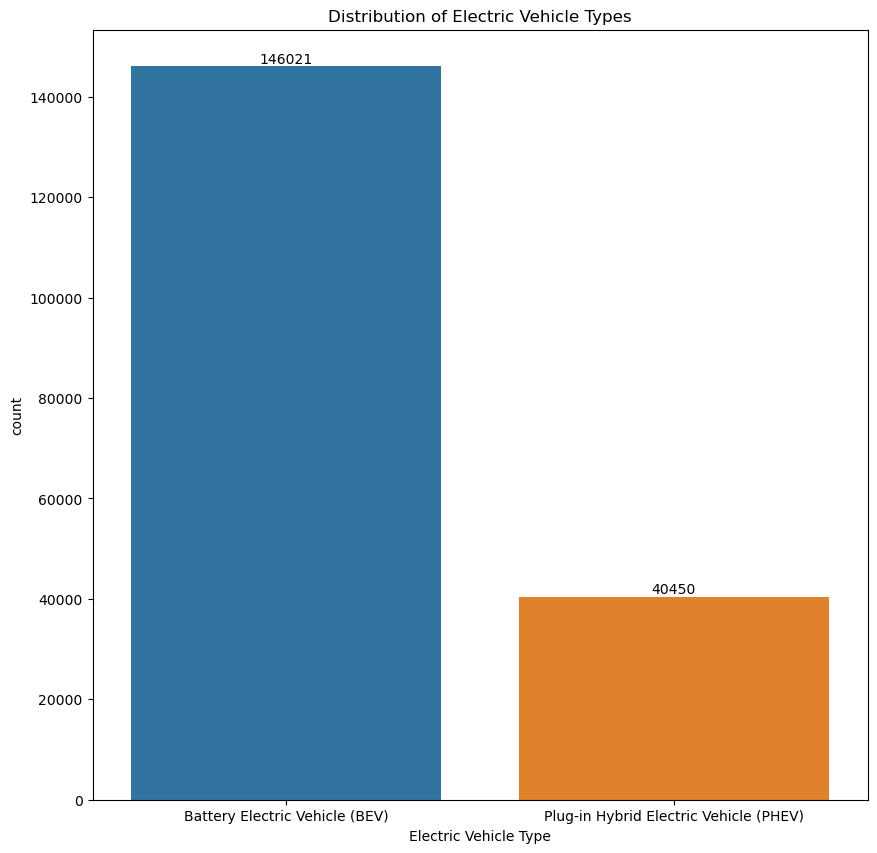

In [64]:
%matplotlib inline

#electric_type = electric_v['Electric Vehicle Type'].value_counts()
warnings.simplefilter(action='ignore', category=FutureWarning)
# Distribution of Electric Vehicle Types using countplot
plt.figure(figsize=(10,10))
plot = sns.countplot(data=electric_v, x='Electric Vehicle Type')

# adding labels to each bar which represent the corresponding values
plot.bar_label(plot.containers[0])
plt.title('Distribution of Electric Vehicle Types')
plt.show()

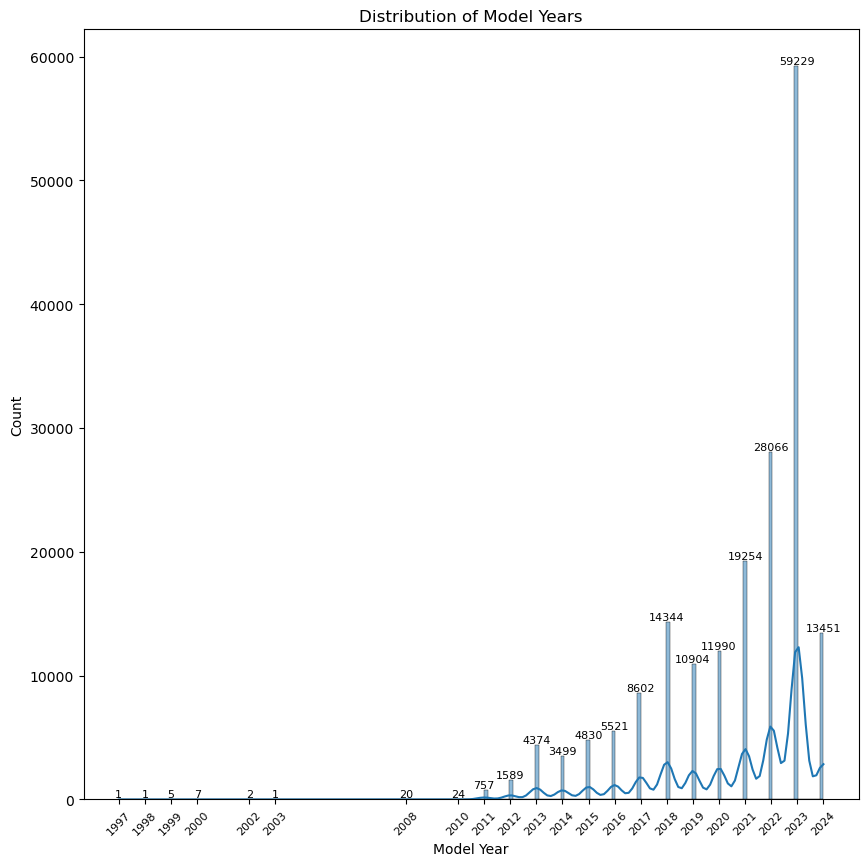

In [65]:


%matplotlib inline


plt.figure(figsize=(10,10))
sns.histplot(data=electric_v, x='Model Year', kde=True)
plt.title('Distribution of Model Years')

# Calculating the count with respect to each model year
year_count = electric_v['Model Year'].value_counts().sort_index()

# adding annotations (label) to each bar
for year, count in year_count.items():
    plt.text(year, count, str(count), ha='center', va='bottom', fontsize=8)

# customizing tick labels in the x-axis
plt.xticks(ticks=year_count.index, rotation=45, fontsize=8)

plt.show()

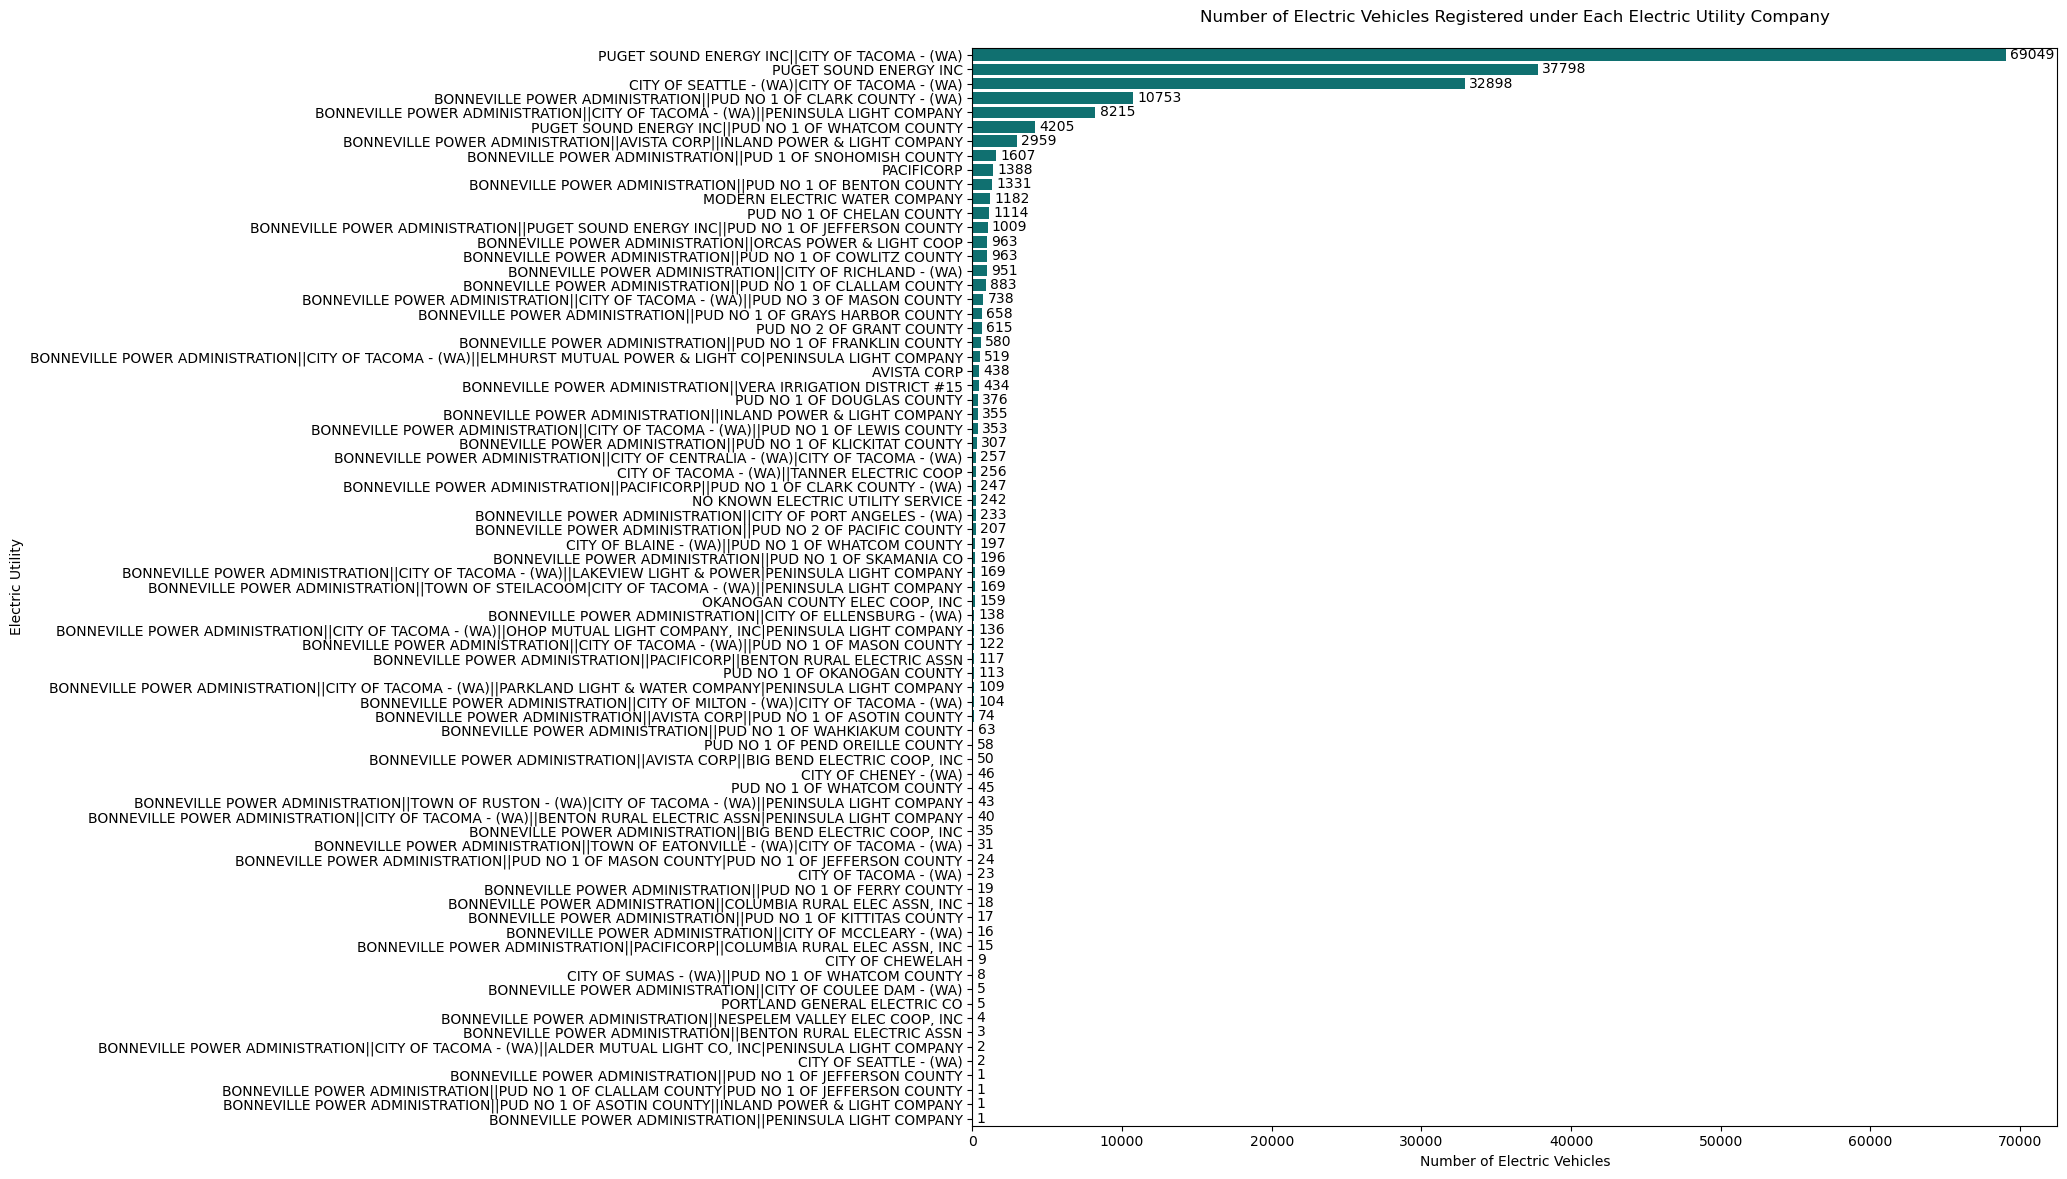

In [66]:
# Calculate the count of electric vehicles for each utility company
utility_counts = electric_v['Electric Utility'].value_counts().sort_values(ascending=False)

# Create a horizontal bar plot visualizing the utility company-wise vehicle count
plt.figure(figsize=(14, 14))
utility_barplot = sns.barplot(y=utility_counts.index, x=utility_counts.values, color="teal", order=utility_counts.index)

# Adding annotations (labels) to each bar as integers. Labels are placed at the edge of the bar
for utility_container in utility_barplot.containers:
    utility_barplot.bar_label(utility_container, fmt='%d', label_type='edge', padding=3, color='black', fontsize=10)

# Setting the plot title and x, y axis labels
plt.title('Number of Electric Vehicles Registered under Each Electric Utility Company\n')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Electric Utility')
plt.show()


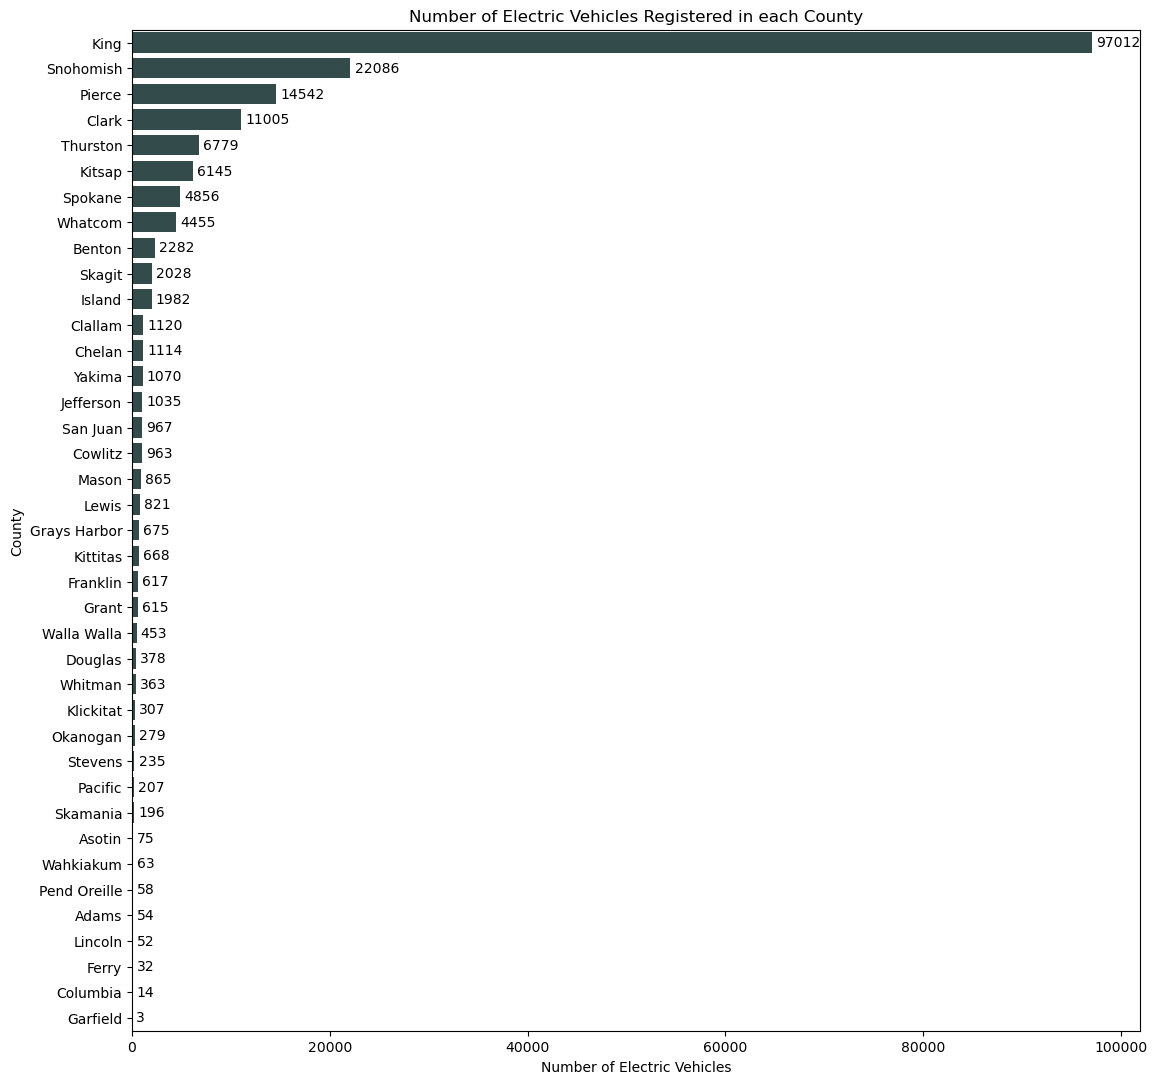

In [67]:
%matplotlib inline
# Calculate the count of electric vehicles in each county
county_counts = electric_v['County'].value_counts().sort_values(ascending=False)
#county_counts.columns = ['County', 'Count']

# Create a horizontal bar plot visualizing the county-wise vehicle count
plt.figure(figsize=(13, 13))
county_barplot = sns.barplot(y=county_counts.index, x= county_counts.values, color="darkslategrey", order=county_counts.index)

# Adding annotations (labels) to each bar as integers
for county_container in county_barplot.containers:
    county_barplot.bar_label(county_container, fmt='%d', label_type='edge', padding=3, color='black', fontsize=10)
    

# setting the plot title
# setting the x and y axis labels
plt.title('Number of Electric Vehicles Registered in each County')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('County')
plt.show()

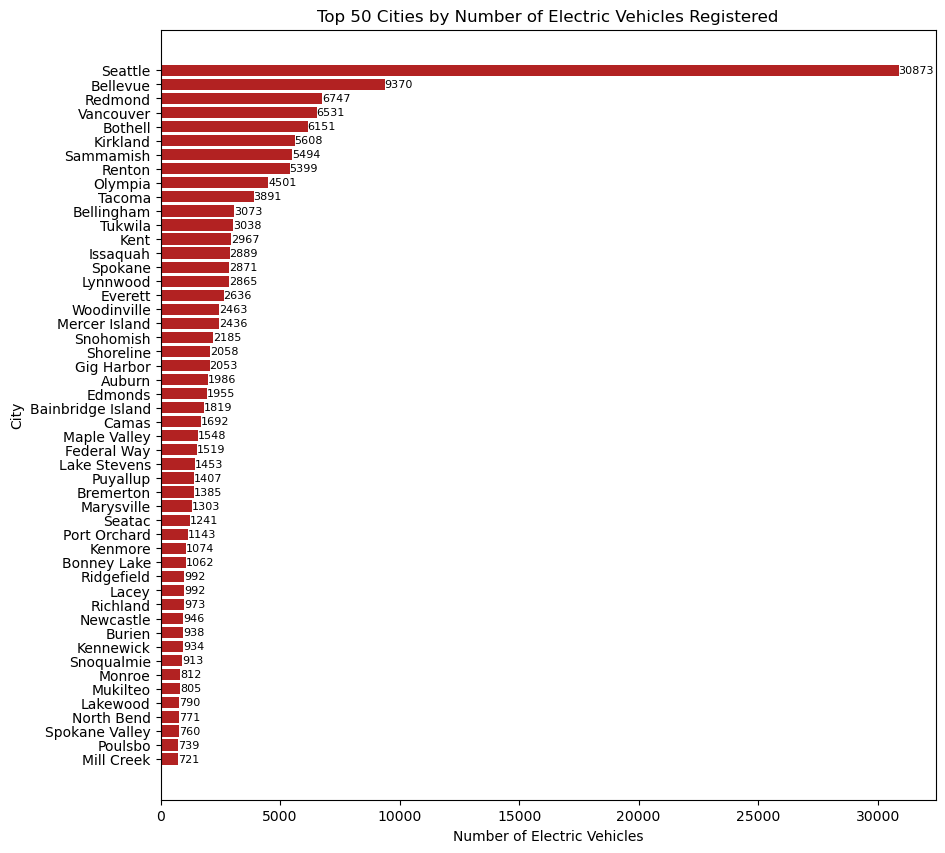

In [68]:
# Calculate the count of electric vehicles in each city
city_counts = electric_v['City'].value_counts().sort_values(ascending=False)

# Get the top 50 cities and sort it in descending order
top_city_counts = city_counts.head(50).sort_values()

# Plotting the top 50 cities using matplotlib
plt.figure(figsize=(10, 10))
plt.barh(top_city_counts.index, top_city_counts.values, color='firebrick')

# Adding annotations (labels) to each bar
for index, value in enumerate(top_city_counts.values):
    plt.text(value, index, f'{value}', va='center', ha='left', color='black', fontsize=8)

# Setting the plot title and x, y axis labels
plt.title('Top 50 Cities by Number of Electric Vehicles Registered')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('City')

# Display the plot
plt.show()

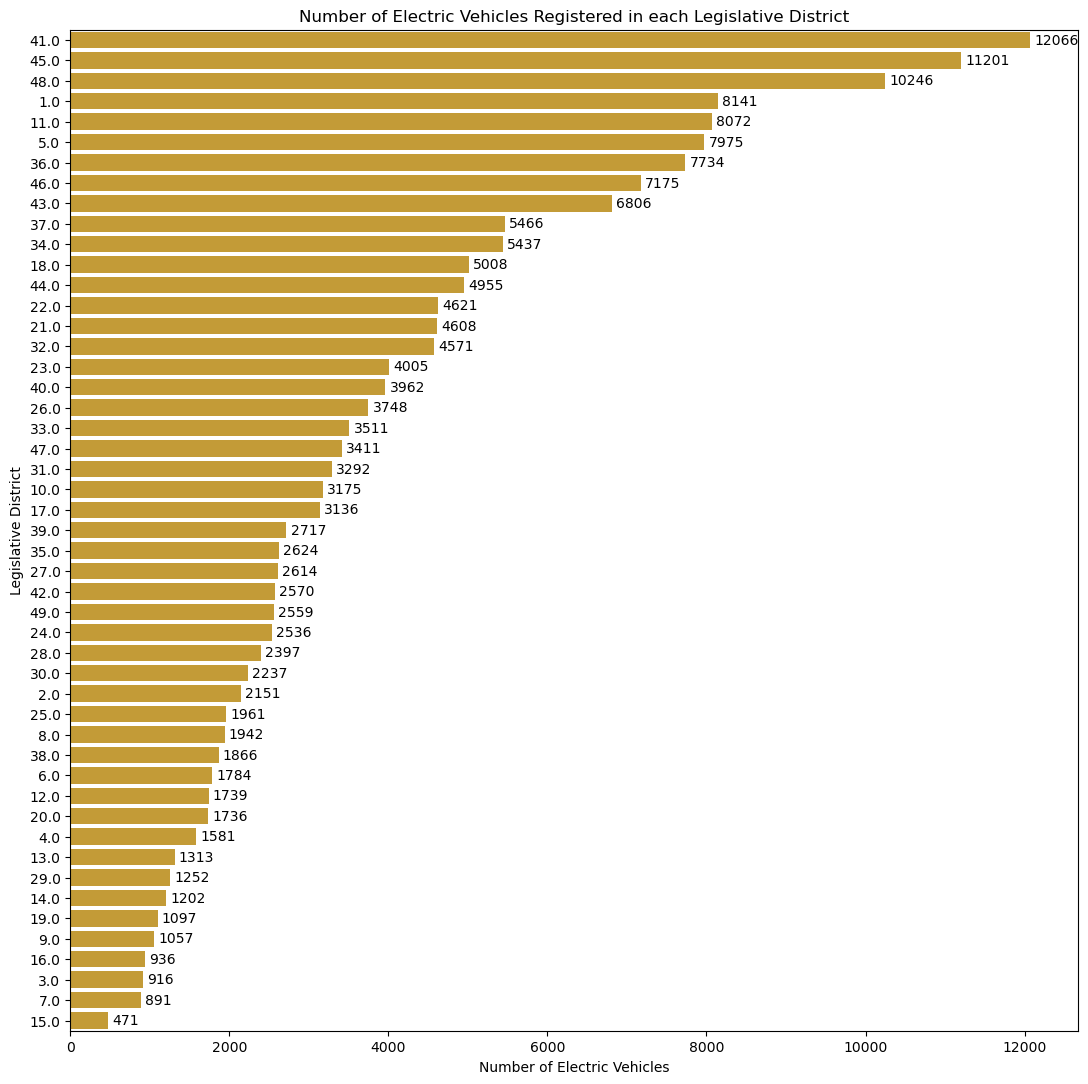

In [69]:
# Calculate the count of electric vehicles for each Legislative District
leg_dist_counts = electric_v['Legislative District'].value_counts()


# Create a horizontal bar plot for legislative district wise vehicle count
plt.figure(figsize=(13, 13))
leg_dist_barplot = sns.barplot(y=leg_dist_counts.index, x= leg_dist_counts.values, color="goldenrod", order=leg_dist_counts.index)

# Adding annotations (labels) to each bar as integers
for leg_dist_container in leg_dist_barplot.containers:
    leg_dist_barplot.bar_label(leg_dist_container, fmt='%d', color = 'black', label_type='edge', padding=3, fontsize=10)
    

plt.title('Number of Electric Vehicles Registered in each Legislative District')
plt.xlabel('Number of Electric Vehicles')
plt.ylabel('Legislative District')
plt.show()

Bivariate Analysis

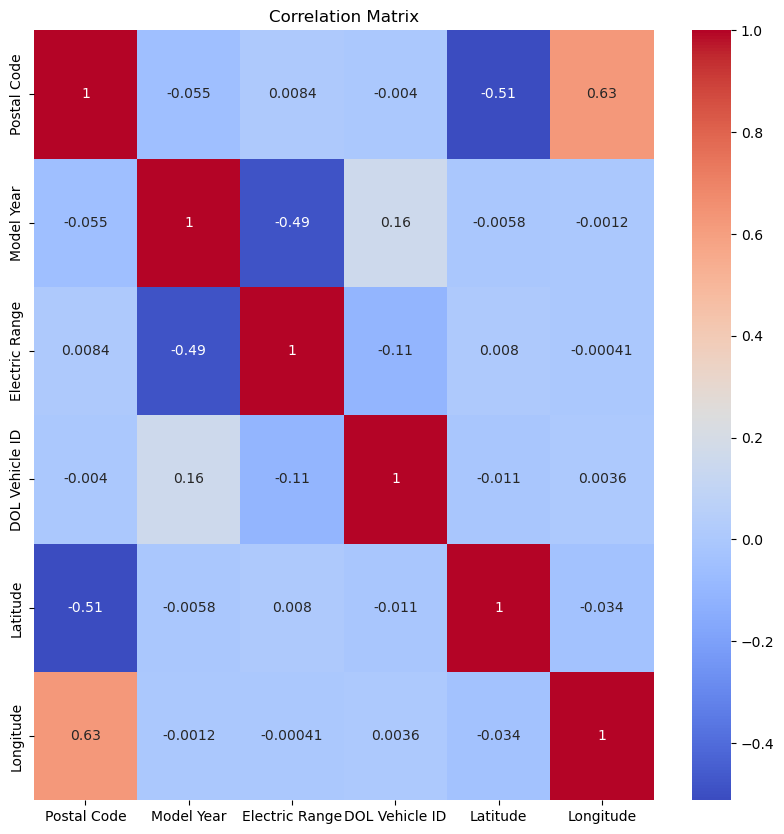

In [70]:
num_electric_v = electric_v.select_dtypes(include=['number'])
corr_matrix = num_electric_v.corr()

plt.figure(figsize=(10,10))

sns.heatmap(corr_matrix, annot=True, cmap = 'coolwarm')
plt.title('Correlation Matrix')
plt.show()

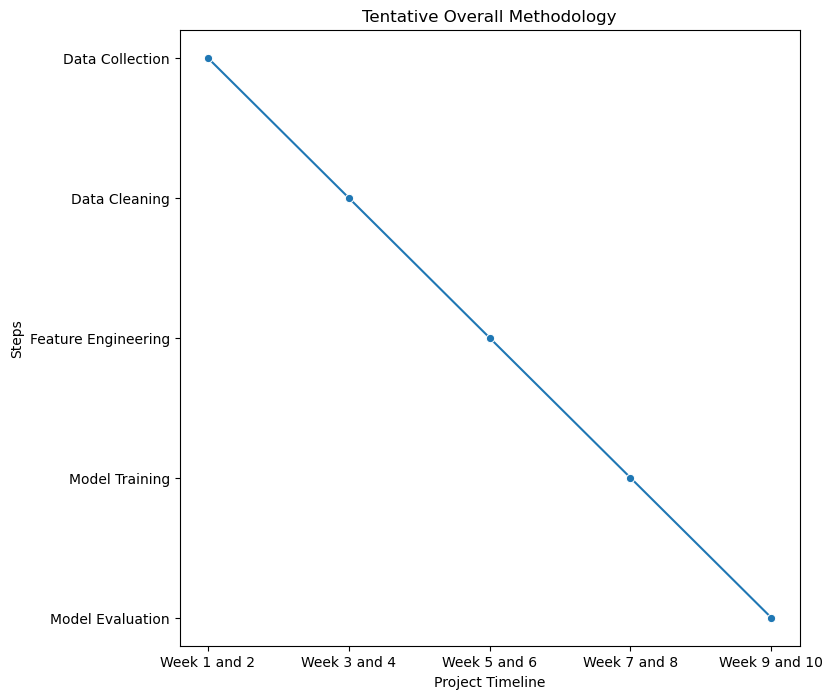

In [71]:
# Sample data for methodology graph
steps = ['Data Collection', 'Data Cleaning', 'Feature Engineering', 'Model Training', 'Model Evaluation']

timeline = ['Week 1 and 2', 'Week 3 and 4', 'Week 5 and 6', 'Week 7 and 8', 'Week 9 and 10']

plt.figure(figsize=(8, 8))
sns.lineplot(x=timeline, y=steps, marker='o')
plt.title('Tentative Overall Methodology')
plt.xlabel('Project Timeline')
plt.ylabel('Steps')
plt.show()


<p style="font-size:30px;"><b><u>Research Question No.1</u></b></p>

<p style="font-size:20px;"><b>What makes people in Washington State decide to buy BEVs and PHEVs?</b></p>

<u>STEP I</u>

<b>Feature Selection</b>

In [72]:
# using one-hot encoding to convert categorical variables into a format that can be provided into machine learning algorithms
electric_v_encoded = pd.get_dummies(electric_v, columns=['County', 'City', 'Legislative District', 'Electric Utility'])

# initializing an empty list to store feature column names
feature_cols = []

# using a for loop to iterate through the encoded data frame
for col in electric_v_encoded.columns:
    # check if the column name contains any of the specified prefixes. If it does, then add the columns to the feature_col list
    if 'County_' in col or 'City_' in col or 'Legislative District_' in col or 'Electric Utility_' in col:
        feature_cols.append(col)

# Prepare dependent variable for classification models
# Convert 'Electric Vehicle Type' to binary values (1 for BEV, 0 for PHEV)     
dependent_var = electric_v_encoded['Electric Vehicle Type'].apply(lambda x: 1 if x == 'Battery Electric Vehicle (BEV)' else 0)

# Select the feature columns identified earlier to form the independent variables (features) DataFrame
independent_vars = electric_v_encoded[feature_cols]



<u>STEP II</u>

<b>Splitting the data into training and testing sets.</b>

In [73]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing)
independent_train, independent_test, dependent_train, dependent_test = train_test_split(independent_vars, dependent_var, test_size=0.2, random_state=123)


<u>STEP III</u>

<b>Machine Learning</b>

In [74]:
# Importing 'StandardScaler' class from sklearn.preprocessing 
# This is used to standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler


# creating an instance of StandardScaler()
scaler = StandardScaler()

# Computing the mean and standard deviation for scaling.
indep_train_scaled = scaler.fit_transform(independent_train)

# Scaling the training data using the computed mean and standard deviation.
indep_test_scaled = scaler.transform(independent_test)

Logistic Regression Model

In [75]:
# importing 'LogisticRegression' class from 'sklearn.linear_model'
from sklearn.linear_model import LogisticRegression

# Initialize the LogisticRegression model with a maximum of 5000 iterations
log_reg = LogisticRegression(max_iter = 5000)

# fit the Logistic Regression model using the scaled training data
log_reg.fit(indep_train_scaled, dependent_train)

# use the fitted Logistic Regression Model to make predictions on the scaled testing data
log_reg_predict = log_reg.predict(indep_test_scaled)

Random Forest Classifier Model

In [76]:
# importing 'RandomForestClassifier' class from 'sklearn.ensemble'
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier model
rf_clf = RandomForestClassifier()

# fit he Random Forest Classifier model using scaled training data
rf_clf.fit(indep_train_scaled, dependent_train)

# use the fitted Random Forest Classifier model to make predictions on the scaled testing data
rf_predict = rf_clf.predict(indep_test_scaled)

Support Vector Machine Model

In [77]:
# import 'SVC' class from 'sklearn.svm'
from sklearn.svm import SVC

# importing 'PCA' class from 'sklearn.decomposition'
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality for best performance and reducing training time
# PCA helps in transforming the features into a set of orthogonal components (principal components)
# n_components=50 means we are reducing the features to 50 principal components
pca = PCA(n_components=50)

# Applying PCA transformation to the scaled training data 
indep_train_pca = pca.fit_transform(indep_train_scaled)

#Applying PCA transformation to the scaled testing data
indep_test_pca = pca.transform(indep_test_scaled)

# Initialize the SVC classifier with a maximum of 5000 iterations
svm_clf = SVC(max_iter=5000)

# Fit the SVM classifier using the PCA-transformed training data
svm_clf.fit(indep_train_pca, dependent_train)

# Use the fitted SVM classifier to make predictions on the PCA-transformed testing data
svm_predict = svm_clf.predict(indep_test_pca)

c:\Users\Owner\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


<u>STEP IV</u>

<b>Evaluating all three models and comparing model performance using accuracy, precision and recall</b>

In [78]:
# Importing 'classification_report' class from 'sklearn.metrics'
from sklearn.metrics import classification_report

In [79]:
# print the classification report for logistic regression predictions
print(classification_report(dependent_test, log_reg_predict))

              precision    recall  f1-score   support

           0       0.70      0.06      0.11      8005
           1       0.79      0.99      0.88     29290

    accuracy                           0.79     37295
   macro avg       0.75      0.53      0.49     37295
weighted avg       0.77      0.79      0.72     37295



In [80]:
# print the classification report for Random Forest Model predictions
print(classification_report(dependent_test, rf_predict))

              precision    recall  f1-score   support

           0       0.68      0.06      0.11      8005
           1       0.79      0.99      0.88     29290

    accuracy                           0.79     37295
   macro avg       0.74      0.53      0.49     37295
weighted avg       0.77      0.79      0.72     37295



In [81]:
# print the classification report for Support Vector Machine model predictions
print(classification_report(dependent_test, svm_predict))

              precision    recall  f1-score   support

           0       0.28      0.24      0.26      8005
           1       0.80      0.83      0.82     29290

    accuracy                           0.71     37295
   macro avg       0.54      0.53      0.54     37295
weighted avg       0.69      0.71      0.70     37295



<u>STEP V</u>

<b>Drawing conclusions using Logistic Regression and Random Forest</b>

In [82]:
# importing 'numpy' library
import numpy as np
# importing 'tabulate' class from 'tabulate' library for tabular representation of data
from tabulate import tabulate

# Get feature importances from random forest model
rf_importances = rf_clf.feature_importances_

# Get feature importances from logistic regression model
log_reg_coefficients = log_reg.coef_[0]

# Create a DataFrame to hold the feature names and their importance values
#feature_names = independent_train.columns

# Logistic Regression coefficients
log_reg_features = pd.DataFrame({
    'Feature': independent_train.columns,
    'Importance': log_reg_coefficients
})

# Random Forest importances
rf_important_features = pd.DataFrame({
    'Feature': independent_train.columns,
    'Importance': rf_importances
})

# merge the importance values from both models
combined_importance = pd.merge(log_reg_features, rf_important_features, on='Feature', suffixes=('_log_reg', '_rf'))

# calculating the mean of importances from both the models (across columns in each row) and storing it in a new variable
combined_importance['Combined Importance'] = combined_importance[['Importance_log_reg', 'Importance_rf']].mean(axis=1)

# define a function to get the top influential features for a given prefix
def influential_feature(data, prefix, positive=True, top_n=10):
    # filter the features based on the prefix (e.g. 'County_', 'City_', 'Legislative District_', 'Electric Utility Company_')
    filtered_feature = data[data['Feature'].str.contains(prefix)]
    if positive:
        # Get the top_n features with the highest combined importance
        get_feature = filtered_feature.nlargest(top_n, 'Combined Importance')
    else:
        # Get the top_n features with the lowest combined importance
        get_feature = filtered_feature.nsmallest(top_n, 'Combined Importance')
    #return the result
    return get_feature

# Get the top 10 positive and negative influential features for each 'County_'
top_positive_county = influential_feature(combined_importance,'County_', positive=True)
top_negative_county = influential_feature(combined_importance, 'County_', positive=False)

# Get the top 10 positive and negative influential features for each 'City_'
top_positive_city = influential_feature(combined_importance, 'City_', positive=True)
top_negative_city = influential_feature(combined_importance, 'City_', positive=False)

# Get the top 10 positive and negative influential features for each 'Legislative District_'
top_positive_leg_dist = influential_feature(combined_importance, 'Legislative District_', positive=True)
top_negative_leg_dist = influential_feature(combined_importance, 'Legislative District_', positive=False)

# Get the top 10 positive and negative influential features for each 'Electric Utility_'
top_positive_elec_utility = influential_feature(combined_importance, 'Electric Utility_', positive=True)
top_negative_elec_utility = influential_feature(combined_importance, 'Electric Utility_', positive=False)

# Display the results using the tabulate library for better readability
print("Top 10 Counties with Positive Influence according to Combined Importance:")
print(tabulate(top_positive_county[['Feature', 'Combined Importance']], headers='keys', tablefmt='grid'))

print("\nTop 10 Counties with Negative Influence according to Combined Importance:")
print(tabulate(top_negative_county[['Feature', 'Combined Importance']], headers='keys', tablefmt='grid'),"\n\n")

print("Top 10 Cities with Positive Influence according to Combined Importance:")
print(tabulate(top_positive_city[['Feature', 'Combined Importance']], headers ='keys', tablefmt = 'grid'))

print("\nTop 10 Cities with Negative Influence according to Combined Importance:")
print(tabulate(top_negative_city[['Feature', 'Combined Importance']], headers = 'keys', tablefmt = 'grid'), "\n\n")

print("Top 10 Legislative Districts with Positive Influence according to Combined Importance:")
print(tabulate(top_positive_leg_dist[['Feature', 'Combined Importance']], headers ='keys', tablefmt = 'grid'))

print("\nTop 10 Legislative District with Negative Influence according to Combined Importance:")
print(tabulate(top_negative_leg_dist[['Feature', 'Combined Importance']], headers = 'keys', tablefmt = 'grid'), "\n\n")

print("Top 10 Electric Utility Companies with Positive Influence according to Combined Importance:")
print(tabulate(top_positive_elec_utility[['Feature', 'Combined Importance']], headers ='keys', tablefmt = 'grid'))

print("\nTop 10 Electric Utility Companies with Negative Influence according to Combined Importance:")
print(tabulate(top_negative_elec_utility[['Feature', 'Combined Importance']], headers = 'keys', tablefmt = 'grid'), "\n\n")

Top 10 Counties with Positive Influence according to Combined Importance:
+----+---------------------+-----------------------+
|    | Feature             |   Combined Importance |
+====+=====================+=======================+
| 22 | County_Mason        |             0.28462   |
+----+---------------------+-----------------------+
| 13 | County_Grays Harbor |             0.205709  |
+----+---------------------+-----------------------+
| 27 | County_San Juan     |             0.198614  |
+----+---------------------+-----------------------+
| 16 | County_King         |             0.132101  |
+----+---------------------+-----------------------+
| 20 | County_Lewis        |             0.0923962 |
+----+---------------------+-----------------------+
| 26 | County_Pierce       |             0.081727  |
+----+---------------------+-----------------------+
|  0 | County_Adams        |             0.0770946 |
+----+---------------------+-----------------------+
| 23 | County_Okanogan   

### Comprehensive Analysis and Interpretation of Factors Influencing BEV and PHEV Purchases in Washington State

**Research Question No.1:**
**What makes people in Washington State decide to buy BEVs and PHEVs?**

### Key Influential Factors

#### 1. Counties

- **BEV Preference (Positive Influence):**
  - Mason County
  - Grays Harbor County
  - San Juan County
  - King County
  - Lewis County

- **PHEV Preference (Negative Influence):**
  - Snohomish County
  - Kittitas County
  - Whitman County
  - Spokane County
  - Yakima County

#### 2. Cities

- **BEV Preference (Positive Influence):**
  - Ellensburg
  - Cle Elum
  - Bellevue
  - Sammamish
  - Redmond

- **PHEV Preference (Negative Influence):**
  - Shelton
  - Olympia
  - Belfair
  - Aberdeen
  - Bainbridge Island

#### 3. Legislative Districts

- **BEV Preference (Positive Influence):**
  - Legislative District 18
  - Legislative District 17
  - Legislative District 49
  - Legislative District 9
  - Legislative District 8

- **PHEV Preference (Negative Influence):**
  - Legislative District 43
  - Legislative District 36
  - Legislative District 34
  - Legislative District 46
  - Legislative District 42

#### 4. Electric Utility Companies

- **BEV Preference (Positive Influence):**
  - Puget Sound Energy Inc
  - Bonneville Power Administration || PUD 1 of Snohomish County
  - Bonneville Power Administration || PUD No 1 of Clallam County
  - Pacificorp
  - PUD No 1 of Douglas County

- **PHEV Preference (Negative Influence):**
  - Puget Sound Energy Inc || City of Tacoma - (WA)
  - Bonneville Power Administration || Orcas Power & Light Coop
  - Bonneville Power Administration || PUD No 1 of Franklin County
  - Bonneville Power Administration || City of Tacoma - (WA) || Peninsula Light Company
  - Bonneville Power Administration || Avista Corp || Big Bend Electric Coop, Inc

### Analysis and Interpretation

#### County Level
- **BEV Preference:**
  - Counties like Mason, Grays Harbor, and San Juan show a higher likelihood of purchasing BEVs over PHEVs, indicating favorable infrastructure, incentives, or consumer preferences for BEVs.
- **PHEV Preference:**
  - Counties such as Snohomish, Kittitas, and Whitman show a higher likelihood of purchasing PHEVs over BEVs, suggesting that these areas might have factors like better support for hybrid technology, lack of charging infrastructure, or other economic considerations.

#### City Level
- **BEV Preference:**
  - Cities like Ellensburg, Cle Elum, and Bellevue are more inclined towards BEV purchases, potentially due to better charging infrastructure, supportive local policies, or higher environmental awareness.
- **PHEV Preference:**
  - Cities like Shelton, Olympia, and Belfair show a preference for PHEVs, which might be influenced by less developed charging infrastructure, local incentives for PHEVs, or consumer preferences for hybrid technology.

#### Legislative District Level
- **BEV Preference:**
  - Legislative Districts 18, 17, and 49 show positive influence towards BEV adoption, possibly due to supportive legislative actions, funding for electric vehicle infrastructure, or demographic factors favoring BEVs.
- **PHEV Preference:**
  - Legislative Districts 43, 36, and 34 show a preference for PHEVs, which could be due to legislative focus on hybrid vehicles, insufficient BEV incentives, or local preferences for PHEVs.

#### Electric Utility Companies
- **BEV Preference:**
  - Electric utility providers like Puget Sound Energy Inc and combinations involving Bonneville Power Administration in Snohomish and Clallam counties promote BEV adoption, likely due to favorable electricity rates, incentives for BEV users, or better charging infrastructure.
- **PHEV Preference:**
  - Combinations such as Puget Sound Energy Inc with the City of Tacoma and other similar setups show a negative influence on BEV adoption, indicating a higher preference for PHEVs. These utilities might offer better incentives or support for PHEV users, or there might be other economic factors at play.

### Conclusion

**Factors Influencing BEV vs. PHEV Purchases:**

- **Counties:** Factors like infrastructure, local policies, and consumer preferences significantly impact whether residents prefer BEVs or PHEVs. Mason, Grays Harbor, and San Juan counties favor BEVs, while Snohomish, Kittitas, and Whitman counties lean towards PHEVs.

- **Cities:** Urban infrastructure, local government policies, and consumer demographics influence the choice between BEVs and PHEVs. Cities like Ellensburg and Bellevue show a higher preference for BEVs, while Shelton and Olympia favor PHEVs.

- **Legislative Districts:** Legislative actions, funding, and demographic factors play crucial roles. Districts 18, 17, and 49 favor BEVs, while Districts 43, 36, and 34 prefer PHEVs.

- **Electric Utility Companies:** Utility rates, incentives, and infrastructure provided by electric utility companies are key factors. Providers like Puget Sound Energy Inc promote BEV adoption, whereas combinations involving the City of Tacoma show a preference for PHEVs.

By understanding these factors, targeted strategies can be developed to promote BEV adoption in areas showing a preference for PHEVs and vice versa, ensuring a balanced approach to increasing overall electric vehicle adoption in Washington State.

In [83]:
#!pip install geopy folium pandas iPython

#importing 'folium' library
import folium

#importing 'Nominatim' class from 'geopy.geocoders' module
from geopy.geocoders import Nominatim

#importing 'display' and 'HTML' class from 'IPython.display' module
from IPython.display import display, HTML

# Defining a function named 'influential_feature' to get influential features for a given prefix
def influential_feature(data, prefix, positive=True, top_n=10):
    filtered_feature = data[data['Feature'].str.contains(prefix)]
    if positive:
        get_feature = filtered_feature.nlargest(top_n, 'Combined Importance')
    else:
        get_feature = filtered_feature.nsmallest(top_n, 'Combined Importance')
    return get_feature

# Defining a function named 'get_lat_long' to get latitude and longitude for a given location
def get_lat_long(location):
    try:
        loc = geolocator.geocode(location + ", Washington")
        if loc:
            return loc.latitude, loc.longitude
        else:
            return None, None
    except Exception as e:
        return None, None

# Initialize the geolocator
geolocator = Nominatim(user_agent="ev_adoption_analysis")

# Get the top 10 positive and negative influential features for Counties 
top_positive_county = influential_feature(combined_importance, 'County_', positive=True)
top_negative_county = influential_feature(combined_importance, 'County_', positive=False)

# Get the top 10 positive and negative influential features for Cities
top_positive_city = influential_feature(combined_importance, 'City_', positive=True)
top_negative_city = influential_feature(combined_importance, 'City_', positive=False)

# Combine the results into single DataFrames for counties
county_data = pd.concat([top_positive_county, top_negative_county])

# Combine the results into single DataFrames for counties
city_data = pd.concat([top_positive_city, top_negative_city])

# Get latitude and longitude for counties and cities
# the 'zip(*)' operator is used to unpack the list of tuples returned by the 'apply' function. Each tuple contains latitude and longitude for a county
# the list of latitudes and longitudes are assigned to new columns in the 'county_data' and 'city_data' dataframe
county_data['Lat'], county_data['Long'] = zip(*county_data['Feature'].apply(lambda x: get_lat_long(x.replace('County_', ''))))
city_data['Lat'], city_data['Long'] = zip(*city_data['Feature'].apply(lambda x: get_lat_long(x.replace('City_', ''))))

# Since all the 1s are assigned to BEV and 0s to PHEV, the positive features are the factors that influence the purchase of 'BEVs'
# and the negative features are the factors that influence the purchase of 'PHEVs'
# Split the DataFrames into BEV and PHEV preferences for 'county_data'
bev_county_df = county_data[county_data['Feature'].isin(top_positive_county['Feature'])]
phev_county_df = county_data[county_data['Feature'].isin(top_negative_county['Feature'])]

# Split the DataFrames into BEV and PHEV preferences for 'city_data'
bev_city_df = city_data[city_data['Feature'].isin(top_positive_city['Feature'])]
phev_city_df = city_data[city_data['Feature'].isin(top_negative_city['Feature'])]

# Create base maps for counties and cities for better display. The map is then storied in 'm_counties'
m_counties = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

# Create base maps for cities for better display. The map is then storied in 'm_cities'
m_cities = folium.Map(location=[47.7511, -120.7401], zoom_start=7)

# Plot the counties with BEV preference. Blue Circles are drawn for the latitude and longitude of the counties
# that have a higher preference for purchasing BEVs
for _, row in bev_county_df.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Long']),
        radius=10,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"County: {row['Feature'].replace('County_', '')}\nImportance: {row['Combined Importance']}"
    ).add_to(m_counties)

# Plot the counties with PHEV preference. Red Circles are drawn for the latitude and longitude of the counties
# that have a higher preference for purchasing BEVs
for _, row in phev_county_df.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Long']),
        radius=10,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.6,
        popup=f"County: {row['Feature'].replace('County_', '')}\nImportance: {row['Combined Importance']}"
    ).add_to(m_counties)

# Plot the cities with BEV preference. Green Circles are drawn for the latitude and longitude of the counties
# that have a higher preference for purchasing BEVs
for _, row in bev_city_df.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Long']),
        radius=10,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.6,
        popup=f"City: {row['Feature'].replace('City_', '')}\nImportance: {row['Combined Importance']}"
    ).add_to(m_cities)

# Plot the cities with PHEV preference. Orange Circles are drawn for the latitude and longitude of the counties
# that have a higher preference for purchasing BEVs
for _, row in phev_city_df.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Long']),
        radius=10,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.6,
        popup=f"City: {row['Feature'].replace('City_', '')}\nImportance: {row['Combined Importance']}"
    ).add_to(m_cities)
    
# Add legend to counties map using html. The string is then stored in 'legend_html_counties'
legend_html_counties = '''
<div style="position: fixed; 
    bottom: 50px; left: 50px; width: 300px; height: 100px; 
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; padding: 10px;">
    <b>Legend</b><br>
    <i class="fa fa-circle" style="color: blue"></i>&nbsp; BEV Preference<br>
    <i class="fa fa-circle" style="color: red"></i>&nbsp; PHEV Preference
</div>
'''

# Accessing the html part of the root element of the map object using 'get_root()'.
# The root element contains all the underlying HTML and JavaScript that Folium generates to render the map.
# the 'add_child()' is used to insert additional html elements in the map which in this case is legend.
# the 'folium.Element' class wraps the HTML code so that it can be added to the map

# adding the html legend to 'm_counties' map object
m_counties.get_root().html.add_child(folium.Element(legend_html_counties))

# Add legend to cities map using html. The string is then stored in 'legend_html_cities'
legend_html_cities = '''
<div style="position: fixed; 
    bottom: 50px; left: 50px; width: 300px; height: 100px; 
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; padding: 10px;">
    <b>Legend</b><br>
    <i class="fa fa-circle" style="color: green"></i>&nbsp; BEV Preference<br>
    <i class="fa fa-circle" style="color: orange"></i>&nbsp; PHEV Preference
</div>
'''
# adding the html legend to 'm_cities' map object
m_cities.get_root().html.add_child(folium.Element(legend_html_cities))

# Save the maps as HTML files
m_counties.save('ev_adoption_counties_map.html')
m_cities.save('ev_adoption_cities_map.html')

# Display the maps with titles using HTML and CSS
display(HTML("<h3>Top Counties Influencing BEV and PHEV Purchases in Washington State</h3>"))
display(m_counties)
display(HTML("<h3>Top Cities Influencing BEV and PHEV Purchases in Washington State</h3>"))
display(m_cities)


<p style="font-size:30px;"><b><u>Research Question No.2</u></b></p>

<p style="font-size:20px;"><b>Can we use machine learning to predict the number of new electric vehicle adopters over the next ten years in Washington State, based on detailed data about residents' geographic locations and the availability of infrastructural facilities, such as electric utility stations?</b></p>

<u>STEP I</u>

<b>Feature Engineering</b>

In [90]:
# importing 'pandas' library
import pandas as pd

In [125]:
# create a new variable named 'elec_veh_data' and assigning it the same DataFrame that is currently stored in the variable 'electric_v'
# will be using 'elec_veh_data' for further analysis for research question no.2

elec_veh_data = electric_v

# Convert 'Model Year' to datetime and extract the year
elec_veh_data['Year'] = pd.to_datetime(elec_veh_data['Model Year'], format='%Y').dt.year

# defining a function named 'group_data' to group data by year and different geographical/utility attributes
def group_data(df, vehicle_type, group_by, new_col_name):
    return df[df['Electric Vehicle Type'] == vehicle_type].groupby(['Year', group_by])['DOL Vehicle ID'].count().reset_index(name=new_col_name)

#applying the group_data function to extract the city-wise, county-wise, Legislative District-wise and Electric Utility-wise BEVs
bevs_per_year_county = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'County', 'County_BEVs_per_year')
bevs_per_year_city = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'City', 'City_BEVs_per_year')
bevs_per_year_leg_dist = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'Legislative District', 'Leg_Dist_BEVs_per_year')
bevs_per_year_elec_utility = group_data(elec_veh_data, 'Battery Electric Vehicle (BEV)', 'Electric Utility', 'Elec_Util_BEVs_per_year')

#applying the group_data function to extract the city-wise, county-wise, Legislative District-wise and Electric Utility-wise PHEVs
phevs_per_year_county = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'County', 'County_PHEVs_per_year')
phevs_per_year_city = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'City', 'City_PHEVs_per_year')
phevs_per_year_leg_dist = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Legislative District', 'Leg_Dist_PHEVs_per_year')
phevs_per_year_elec_utility = group_data(elec_veh_data, 'Plug-in Hybrid Electric Vehicle (PHEV)', 'Electric Utility', 'Elec_Util_PHEVs_per_year')

# combining the county-wise, city-wise, legislative district-wise and electric utility-wise data for better integrated analysis and simplifying the process

# Merge data on Year and County
combined_county = pd.merge(bevs_per_year_county, phevs_per_year_county, on=['Year', 'County'], how='outer')

# Merge data on Year and City
combined_city = pd.merge(bevs_per_year_city, phevs_per_year_city, on=['Year', 'City'], how='outer')

# Merge data on Year and Legislative District
combined_leg_dist = pd.merge(bevs_per_year_leg_dist, phevs_per_year_leg_dist, on=['Year', 'Legislative District'], how='outer')

# Merge data on Year and Electric Utility
combined_elec_utility = pd.merge(bevs_per_year_elec_utility, phevs_per_year_elec_utility, on=['Year', 'Electric Utility'], how='outer')

# Fill NaN values with 0 for numerical columns only using '.loc'
combined_county.loc[:, ['County_BEVs_per_year', 'County_PHEVs_per_year']] = combined_county.loc[:, ['County_BEVs_per_year', 'County_PHEVs_per_year']].fillna(0)
combined_city.loc[:, ['City_BEVs_per_year', 'City_PHEVs_per_year']] = combined_city.loc[:, ['City_BEVs_per_year', 'City_PHEVs_per_year']].fillna(0)
combined_leg_dist.loc[:, ['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year']] = combined_leg_dist.loc[:, ['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year']].fillna(0)
combined_elec_utility.loc[:, ['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year']] = combined_elec_utility.loc[:, ['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year']].fillna(0)

# Convert data types of each column for consistency
combined_county = combined_county.astype({'Year': 'int32', 'County_BEVs_per_year': 'int64', 'County_PHEVs_per_year': 'int64'})
combined_city = combined_city.astype({'Year': 'int32', 'City_BEVs_per_year': 'int64', 'City_PHEVs_per_year': 'int64'})
combined_leg_dist = combined_leg_dist.astype({'Year': 'int32', 'Leg_Dist_BEVs_per_year': 'int64', 'Leg_Dist_PHEVs_per_year': 'int64'})
combined_elec_utility = combined_elec_utility.astype({'Year': 'int32', 'Elec_Util_BEVs_per_year': 'int64', 'Elec_Util_PHEVs_per_year': 'int64'})


<u>STEP II</u>

<b>Validating the new variables: Descriptive Statistics</b>

In [123]:
print("Summary statistics of county data:")
print(combined_county.describe(),"\n\n")

print("Summary statistics of city data:")
print(combined_city.describe(),"\n\n")

print("Summary statistics of legislative district data:")
print(combined_leg_dist.describe(), "\n\n")

print("Summart statistics of electric utility data:")
print(combined_elec_utility.describe(), "\n\n")

Summary statistics of county data:
              Year  County_BEVs_per_year  County_PHEVs_per_year
count   858.000000            858.000000             858.000000
mean   2011.909091            170.187646              47.144522
std       8.495102           1202.220650             224.309973
min    1997.000000              0.000000               0.000000
25%    2003.000000              0.000000               0.000000
50%    2013.500000              3.000000               1.000000
75%    2019.000000             38.000000              17.000000
max    2024.000000          28227.000000            3923.000000 


Summary statistics of city data:
               Year  City_BEVs_per_year  City_PHEVs_per_year
count  10406.000000        10406.000000          10406.00000
mean    2011.909091           14.032385              3.88718
std        8.490558          124.065485             26.80212
min     1997.000000            0.000000              0.00000
25%     2003.000000            0.000000         

Visualize Data Distribution

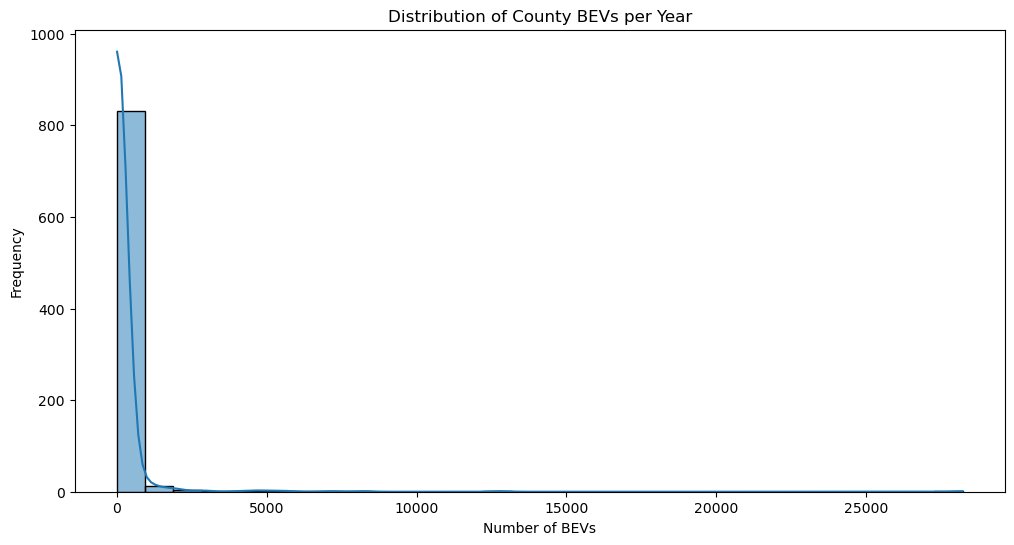

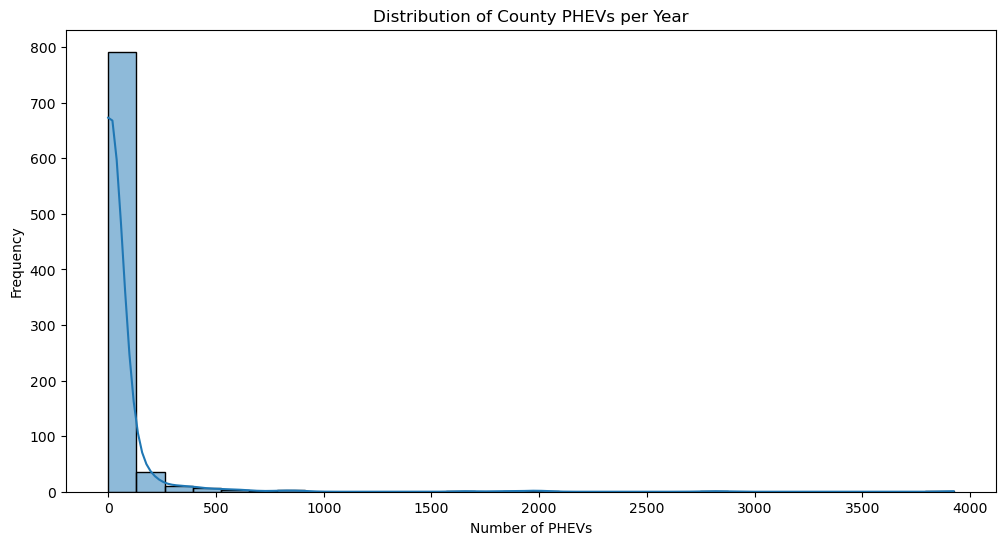

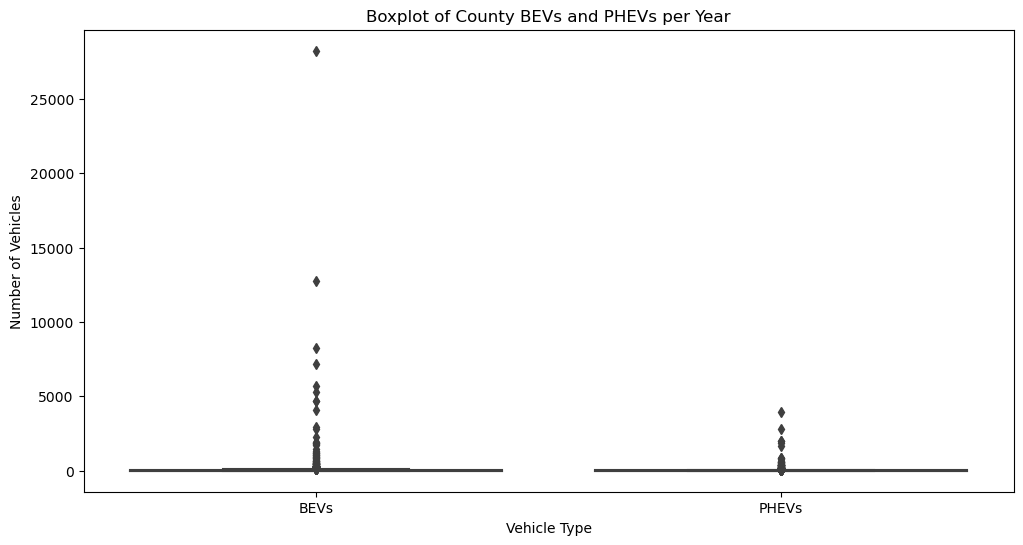

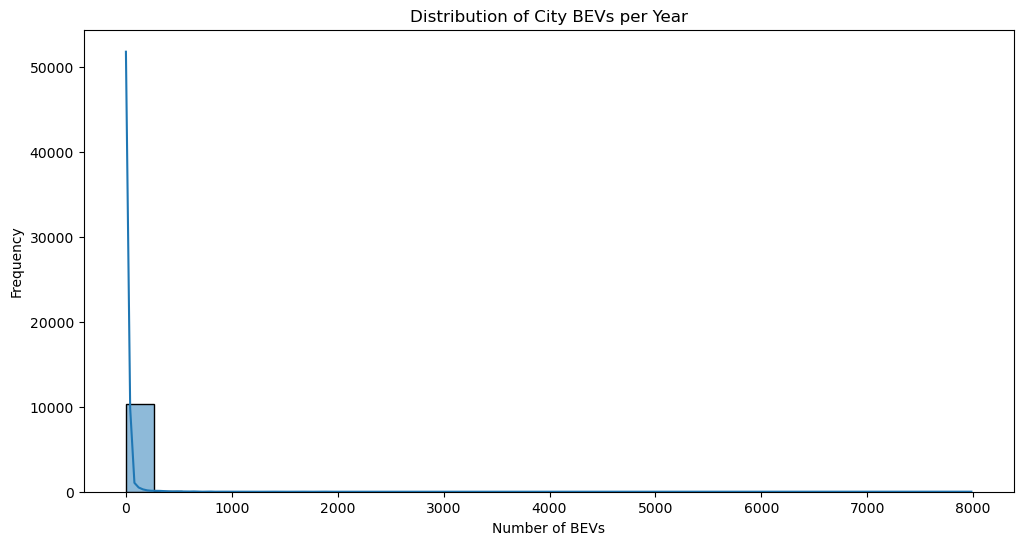

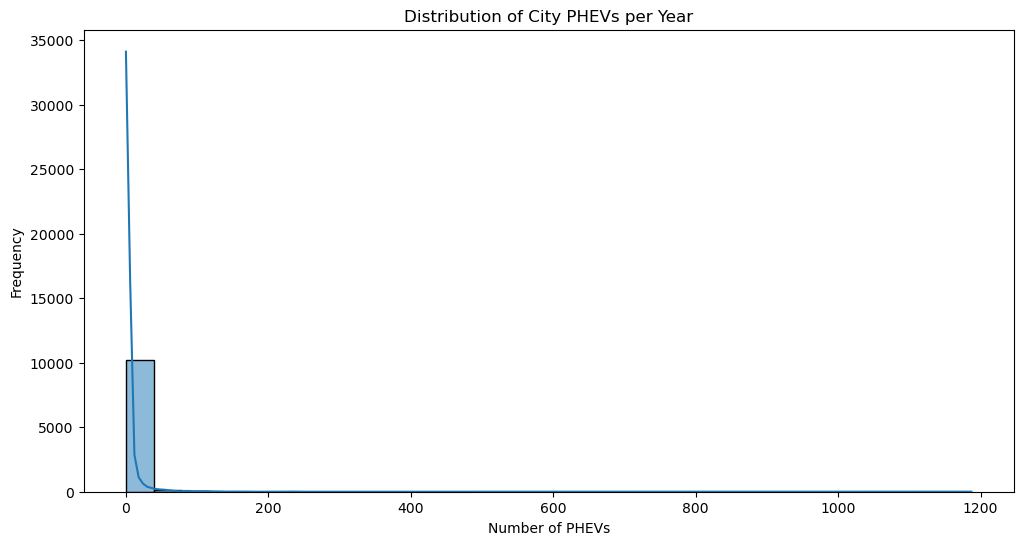

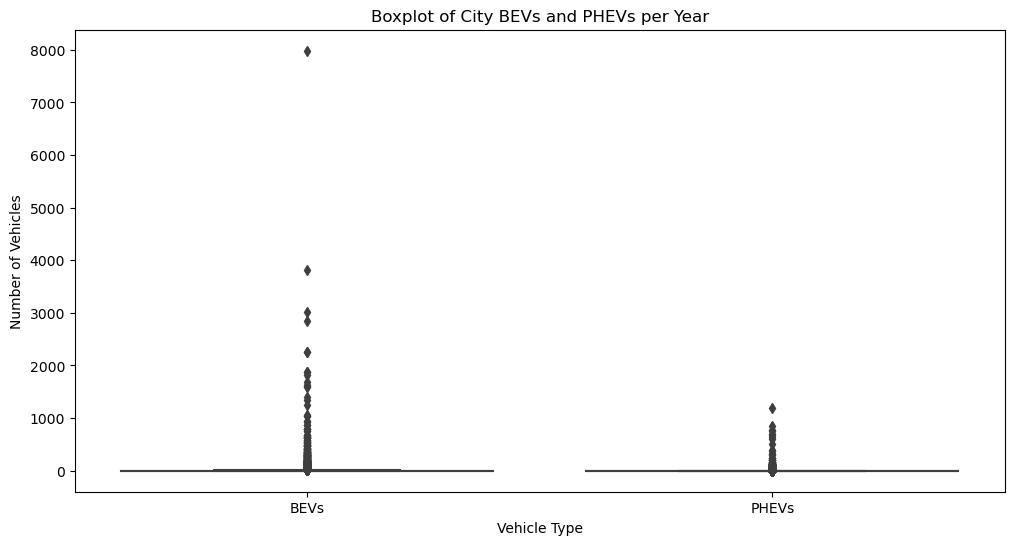

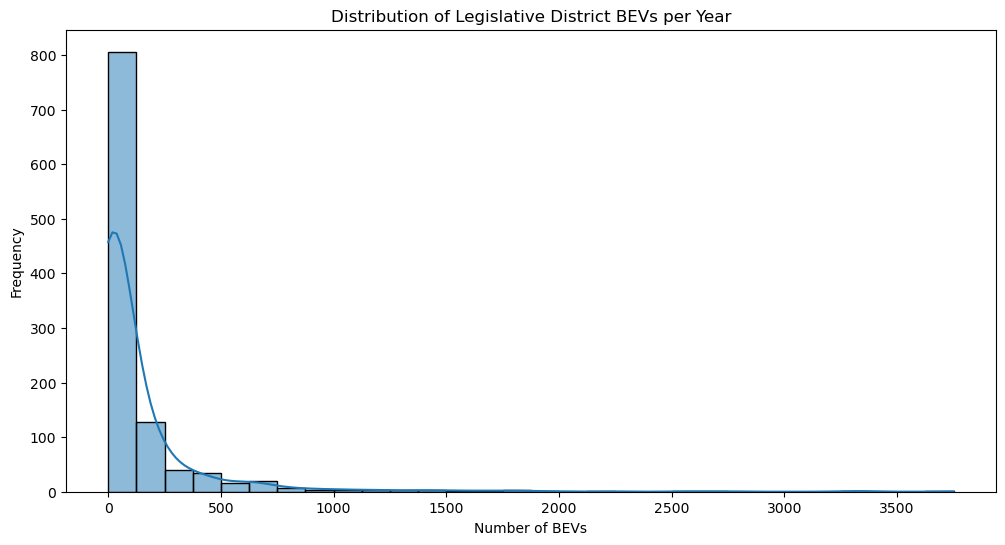

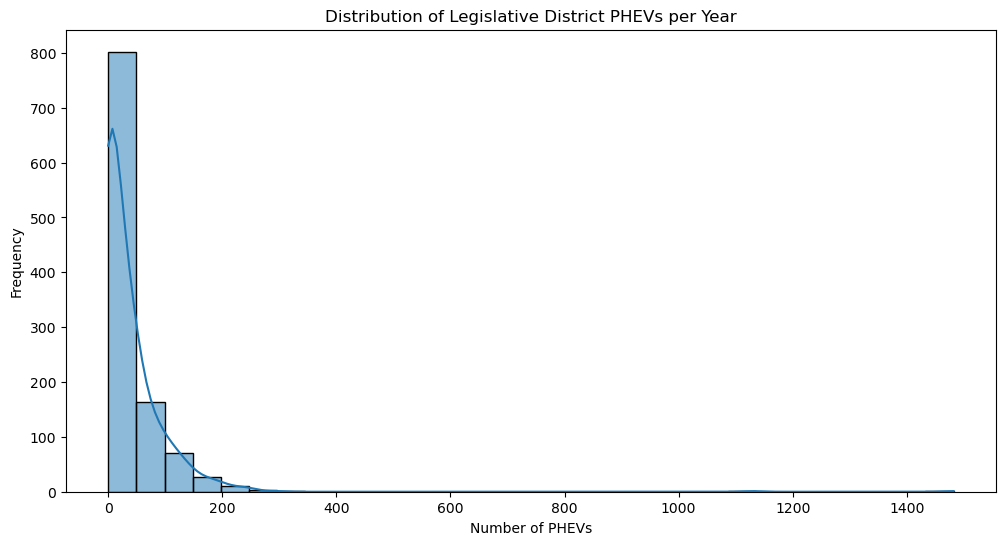

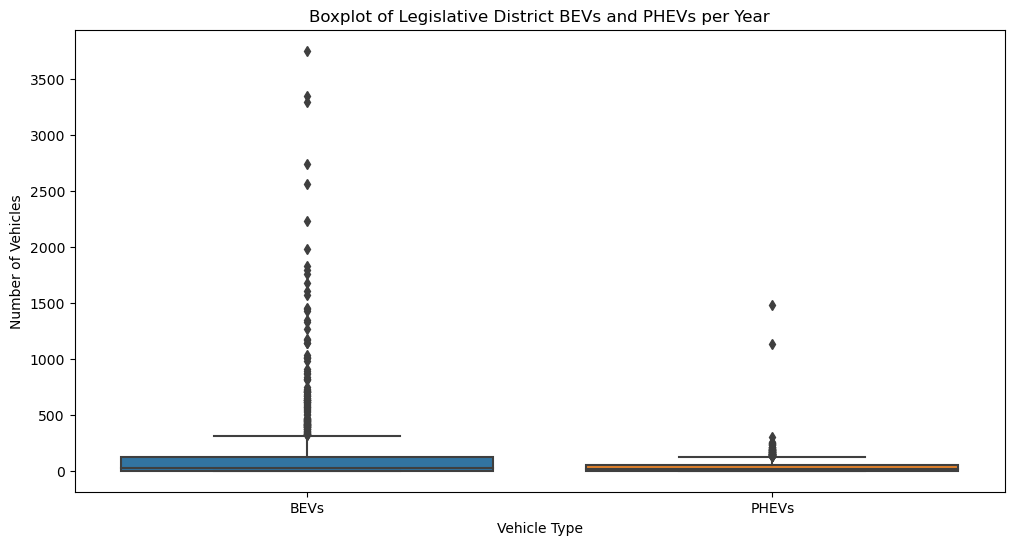

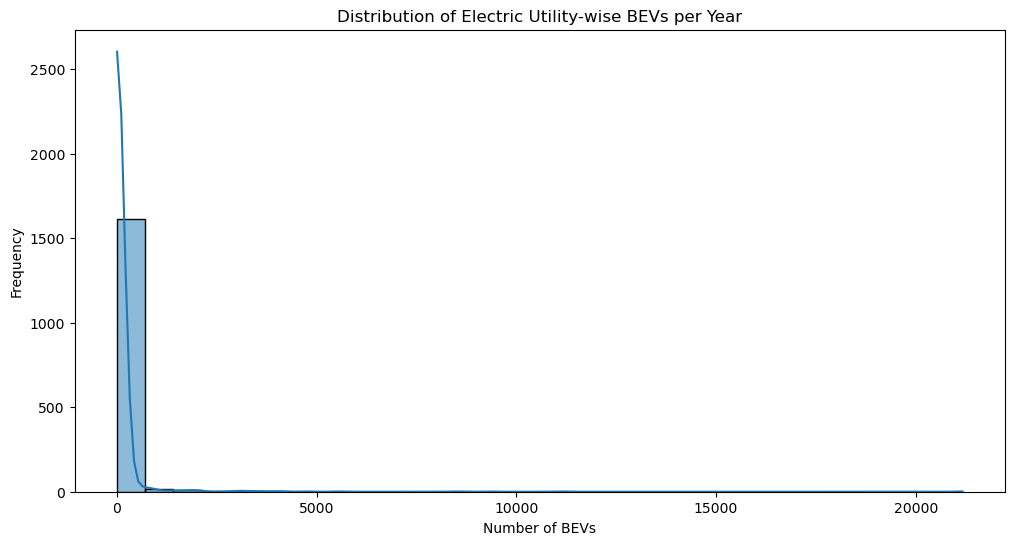

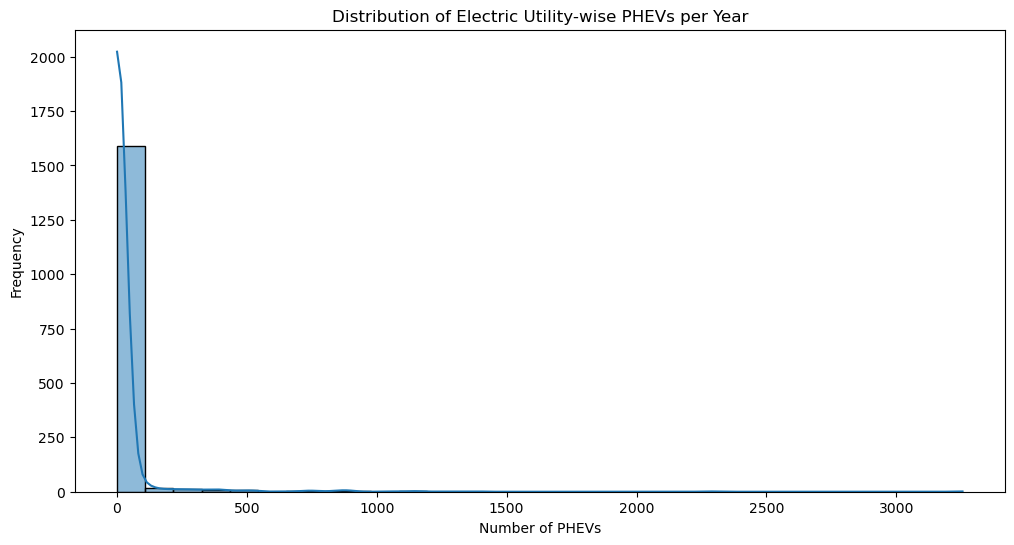

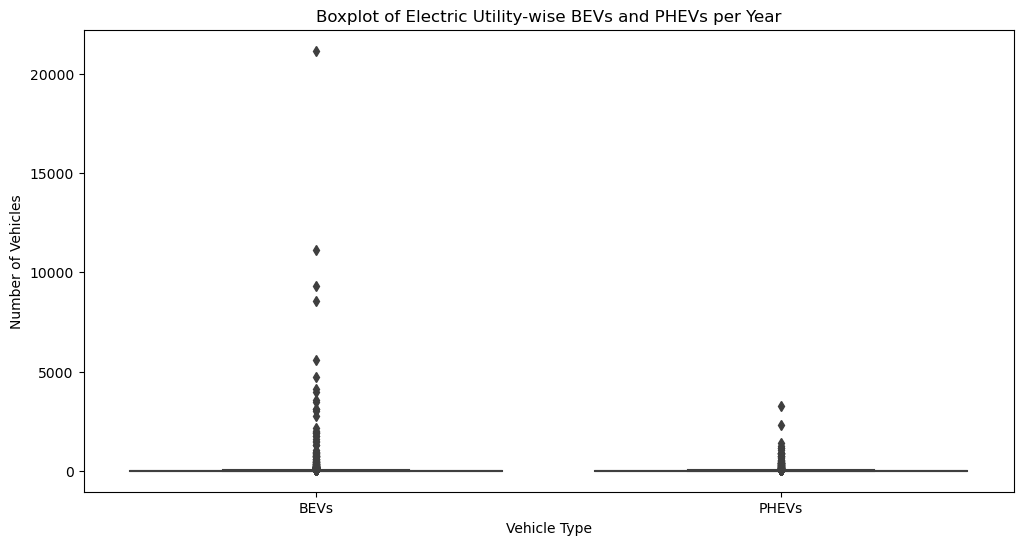

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns

# Defining a function named 'plot_histogram' with data, column, title, xlabel and ylabel as parameters
# this function will be reused to draw histograms for BEVs and PHEVs county-wise, city-wise, legislative district-wise and electric utility-wise
def plot_histogram(data, column, title, xlabel, ylabel):
    plt.figure(figsize=(12, 6))
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Defining a function named 'plot_boxplot' with data, column, title, xlabel and ylabel and xtick_labels as parameters
# this function will be reused to draw boxplot for BEVs and PHEVs county-wise, city-wise, legislative district-wise and electric utility-wise
def plot_boxplot(data, columns, title, xlabel, ylabel, xtick_labels):
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data[columns])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks([0, 1], xtick_labels)
    plt.show()

# Plot histograms and box plots for county-wise data
plot_histogram(combined_county, 'County_BEVs_per_year', 'Distribution of County BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_county, 'County_PHEVs_per_year', 'Distribution of County PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_county, ['County_BEVs_per_year', 'County_PHEVs_per_year'], 'Boxplot of County BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])

# Plot histograms and box plots for city-wise data
plot_histogram(combined_city, 'City_BEVs_per_year', 'Distribution of City BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_city, 'City_PHEVs_per_year', 'Distribution of City PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_city, ['City_BEVs_per_year', 'City_PHEVs_per_year'], 'Boxplot of City BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])

# Plot histograms and box plots for legislative district-wise data
plot_histogram(combined_leg_dist, 'Leg_Dist_BEVs_per_year', 'Distribution of Legislative District BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_leg_dist, 'Leg_Dist_PHEVs_per_year', 'Distribution of Legislative District PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_leg_dist, ['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year'], 'Boxplot of Legislative District BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])

# Plot histograms and box plots for electric utility-wise data
plot_histogram(combined_elec_utility, 'Elec_Util_BEVs_per_year', 'Distribution of Electric Utility-wise BEVs per Year', 'Number of BEVs', 'Frequency')
plot_histogram(combined_elec_utility, 'Elec_Util_PHEVs_per_year', 'Distribution of Electric Utility-wise PHEVs per Year', 'Number of PHEVs', 'Frequency')
plot_boxplot(combined_elec_utility, ['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year'], 'Boxplot of Electric Utility-wise BEVs and PHEVs per Year', 'Vehicle Type', 'Number of Vehicles', ['BEVs', 'PHEVs'])


<u>STEP II Contd.</u>

<b>Validating the new variables: Statistical Test</b>

In [142]:
# importing 'stats' class from scipy.stats' module
import scipy.stats as stats

# For statistical test, t-test would be more appropriate since it involves comparing the means of two groups (BEVs and PHEVs) within each category.

# Defining a function to perform t-test and print results
def perform_t_test(data, column1, column2, category):
    ttest_result = stats.ttest_ind(data[column1], data[column2])
    print(f'T-test result for {category} BEVs and PHEVs per year:', ttest_result,"\n")

# T-tests for County-wise data
perform_t_test(combined_county, 'County_BEVs_per_year', 'County_PHEVs_per_year', 'County')

# T-tests for City-wise data
perform_t_test(combined_city, 'City_BEVs_per_year', 'City_PHEVs_per_year', 'City')

# T-tests for Legislative District-wise data
perform_t_test(combined_leg_dist, 'Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year', 'Legislative District')

# T-tests for Electric Utility-wise data
perform_t_test(combined_elec_utility, 'Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year', 'Electric Utility')


T-test result for County BEVs and PHEVs per year: Ttest_indResult(statistic=2.9470403552739164, pvalue=0.0032516580153221894) 

T-test result for City BEVs and PHEVs per year: Ttest_indResult(statistic=8.15355287992028, pvalue=3.732044449804378e-16) 

T-test result for Legislative District BEVs and PHEVs per year: Ttest_indResult(statistic=9.641066287155605, pvalue=1.4516882008138812e-21) 

T-test result for Electric Utility BEVs and PHEVs per year: Ttest_indResult(statistic=3.4237045557912666, pvalue=0.0006252703883660123) 



**Interpretation**

The results of the t-tests indicate that there are statistically significant differences in the mean adoption rates of Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) across all the geographic and infrastructural categories tested (counties, cities, legislative districts, and electric utilities). Here's a detailed interpretation:

T-Test Results Interpretation:
County BEVs and PHEVs per year:

T-statistic: 2.947
P-value: 0.00325
Interpretation: The p-value is less than 0.05, indicating a statistically significant difference between the mean adoption rates of BEVs and PHEVs across counties. This suggests that counties have different levels of BEV and PHEV adoption.

City BEVs and PHEVs per year:

T-statistic: 8.154
P-value: 3.732e-16
Interpretation: The p-value is much less than 0.05, indicating a highly statistically significant difference between the mean adoption rates of BEVs and PHEVs across cities. This suggests that cities exhibit significantly different adoption patterns for BEVs and PHEVs.

Legislative District BEVs and PHEVs per year:

T-statistic: 9.641
P-value: 1.451e-21
Interpretation: The p-value is far less than 0.05, indicating an extremely statistically significant difference between the mean adoption rates of BEVs and PHEVs across legislative districts. This suggests strong variations in EV adoption patterns across different legislative districts.

Electric Utility BEVs and PHEVs per year:

T-statistic: 3.424
P-value: 0.000625
Interpretation: The p-value is less than 0.05, indicating a statistically significant difference between the mean adoption rates of BEVs and PHEVs across electric utilities. This suggests that the availability and type of electric utility infrastructure may influence EV adoption rates.

General Implications:

Statistically Significant Differences: Across all categories, the t-tests reveal significant differences in the mean adoption rates of BEVs and PHEVs, indicating that these groups are not adopting at the same rate within each category.

Policy and Infrastructure Implications: The significant differences suggest that geographic and infrastructural factors play an essential role in EV adoption. Policies aimed at increasing EV adoption might need to be tailored to address specific regional characteristics and infrastructure availability.

Further Investigation: These findings warrant further investigation to understand the underlying factors driving these differences. For instance, urban areas might have better charging infrastructure, incentives, and awareness programs contributing to higher BEV adoption.

<b>Identify High and Low Adoption Areas</b>

In [153]:
import pandas as pd

# Define a function named 'identify_adoption_areas' to identify high and low adoption areas
def identify_adoption_areas(data, column_prefix, category_name):
    high_adoption = data[data[f'{column_prefix}_per_year'] > data[f'{column_prefix}_per_year'].quantile(0.75)]
    low_adoption = data[data[f'{column_prefix}_per_year'] <= data[f'{column_prefix}_per_year'].quantile(0.25)]
    
    print(f"High Adoption {category_name}:")
    print(high_adoption)
    
    print(f"\nLow Adoption {category_name}:")
    print(low_adoption,"\n\n")
    
    return high_adoption, low_adoption

# Apply the function to each category for BEVs and PHEVs i.e. county, city, legislative district and electric utility

# County-wise adoption rates
high_adoption_counties_bev, low_adoption_counties_bev = identify_adoption_areas(combined_county, 'County_BEVs', 'Counties (BEVs)')
high_adoption_counties_phev, low_adoption_counties_phev = identify_adoption_areas(combined_county, 'County_PHEVs', 'Counties (PHEVs)')

# City-wise adoption rates
high_adoption_cities_bev, low_adoption_cities_bev = identify_adoption_areas(combined_city, 'City_BEVs', 'Cities (BEVs)')
high_adoption_cities_phev, low_adoption_cities_phev = identify_adoption_areas(combined_city, 'City_PHEVs', 'Cities (PHEVs)')

# Legislative District-wise adoption rates
high_adoption_leg_dist_bev, low_adoption_leg_dist_bev = identify_adoption_areas(combined_leg_dist, 'Leg_Dist_BEVs', 'Legislative Districts (BEVs)')
high_adoption_leg_dist_phev, low_adoption_leg_dist_phev = identify_adoption_areas(combined_leg_dist, 'Leg_Dist_PHEVs', 'Legislative Districts (PHEVs)')

# Electric Utility-wise adoption rates
high_adoption_elec_utility_bev, low_adoption_elec_utility_bev = identify_adoption_areas(combined_elec_utility, 'Elec_Util_BEVs', 'Electric Utilities (BEVs)')
high_adoption_elec_utility_phev, low_adoption_elec_utility_phev = identify_adoption_areas(combined_elec_utility, 'Elec_Util_PHEVs', 'Electric Utilities (PHEVs)')


High Adoption Counties (BEVs):
     Year     County  County_BEVs_per_year  County_PHEVs_per_year
317  2011      Clark                    42                      4
328  2011       King                   295                     23
338  2011     Pierce                    60                      3
342  2011  Snohomish                    70                      9
356  2012      Clark                    58                     67
..    ...        ...                   ...                    ...
847  2024     Skagit                    54                     60
849  2024  Snohomish                  1057                    475
850  2024    Spokane                   177                    260
852  2024   Thurston                   230                    155
855  2024    Whatcom                   142                    151

[210 rows x 4 columns]

Low Adoption Counties (BEVs):
     Year        County  County_BEVs_per_year  County_PHEVs_per_year
0    1997         Adams                     0        

**Here's a detailed interpretation of the output:**

High Adoption Areas

Counties:
High Adoption Counties (BEVs): These counties have BEV registrations per year higher than the 75th percentile.
Examples include King, Snohomish, and Clark counties with high BEV adoption rates.
High Adoption Counties (PHEVs): These counties have PHEV registrations per year higher than the 75th percentile.
Examples include King, Spokane, and Thurston counties with high PHEV adoption rates.

Cities:
High Adoption Cities (BEVs): These cities have BEV registrations per year higher than the 75th percentile.
Examples include Seattle, Bellevue, and Yelm with high BEV adoption rates.
High Adoption Cities (PHEVs): These cities have PHEV registrations per year higher than the 75th percentile.
Examples include Yakima, Yarrow Point, and Yelm with high PHEV adoption rates.

Legislative Districts:
High Adoption Legislative Districts (BEVs): These legislative districts have BEV registrations per year higher than the 75th percentile.
Examples include districts 45, 48, and 46 with high BEV adoption rates.
High Adoption Legislative Districts (PHEVs): These legislative districts have PHEV registrations per year higher than the 75th percentile.
Examples include districts 45, 46, and 48 with high PHEV adoption rates.

Electric Utilities:
High Adoption Electric Utilities (BEVs): These electric utilities serve areas with BEV registrations per year higher than the 75th percentile.
Examples include Puget Sound Energy Inc. and utilities serving Tacoma.
High Adoption Electric Utilities (PHEVs): These electric utilities serve areas with PHEV registrations per year higher than the 75th percentile.
Examples include Puget Sound Energy Inc. and utilities serving Tacoma.


Low Adoption Areas

Counties:
Low Adoption Counties (BEVs): These counties have BEV registrations per year less than or equal to the 25th percentile.
Examples include Adams, Asotin, and Benton counties with low BEV adoption rates.
Low Adoption Counties (PHEVs): These counties have PHEV registrations per year less than or equal to the 25th percentile.
Examples include Adams, Asotin, and Benton counties with low PHEV adoption rates.

Cities:
Low Adoption Cities (BEVs): These cities have BEV registrations per year less than or equal to the 25th percentile.
Examples include Aberdeen, Acme, and Addy with low BEV adoption rates.
Low Adoption Cities (PHEVs): These cities have PHEV registrations per year less than or equal to the 25th percentile.
Examples include Aberdeen, Acme, and Addy with low PHEV adoption rates.

Legislative Districts:
Low Adoption Legislative Districts (BEVs): These legislative districts have BEV registrations per year less than or equal to the 25th percentile.
Examples include districts 1, 2, and 3 with low BEV adoption rates.
Low Adoption Legislative Districts (PHEVs): These legislative districts have PHEV registrations per year less than or equal to the 25th percentile.
Examples include districts 1, 2, and 3 with low PHEV adoption rates.

Electric Utilities:
Low Adoption Electric Utilities (BEVs): These electric utilities serve areas with BEV registrations per year less than or equal to the 25th percentile.
Examples include utilities serving Avista Corp and Portland General Electric Co.
Low Adoption Electric Utilities (PHEVs): These electric utilities serve areas with PHEV registrations per year less than or equal to the 25th percentile.
Examples include utilities serving Avista Corp and Portland General Electric Co.

Implications
High Adoption Areas: These areas have successfully adopted BEVs and PHEVs at a higher rate, potentially due to better infrastructure, more incentives, higher awareness, and other favorable conditions.
Low Adoption Areas: These areas have lower adoption rates, indicating potential barriers such as lack of infrastructure, fewer incentives, lower awareness, and other unfavorable conditions.

<u>STEP III</u>

<b>Training and Testing</b>

In [154]:
# import necessary libraries

import pandas as pd
from sklearn.model_selection import train_test_split

In [155]:
# define a function named 'prepare_data'to create training and test sets
def prepare_data(data, target_column):
    # Separate features and target
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # One-hot encode categorical variables
    X_encoded = pd.get_dummies(X, drop_first=True)
    
    # Split the dataset into training (80%) and testing (20%)
    X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

In [156]:
# Prepare data for BEVs (County-wise)
X_train_bev_county, X_test_bev_county, y_train_bev_county, y_test_bev_county = prepare_data(combined_county, 'County_BEVs_per_year')

# Prepare data for PHEVs (County-wise)
X_train_phev_county, X_test_phev_county, y_train_phev_county, y_test_phev_county = prepare_data(combined_county, 'County_PHEVs_per_year')

# Prepare data for BEVs (City-wise)
X_train_bev_city, X_test_bev_city, y_train_bev_city, y_test_bev_city = prepare_data(combined_city, 'City_BEVs_per_year')

# Prepare data for PHEVs (City-wise)
X_train_phev_city, X_test_phev_city, y_train_phev_city, y_test_phev_city = prepare_data(combined_city, 'City_PHEVs_per_year')

# Prepare data for BEVs (Legislative District-wise)
X_train_bev_leg_dist, X_test_bev_leg_dist, y_train_bev_leg_dist, y_test_bev_leg_dist = prepare_data(combined_leg_dist, 'Leg_Dist_BEVs_per_year')

# Prepare data for PHEVs (Legislative District-wise)
X_train_phev_leg_dist, X_test_phev_leg_dist, y_train_phev_leg_dist, y_test_phev_leg_dist = prepare_data(combined_leg_dist, 'Leg_Dist_PHEVs_per_year')

# Prepare data for BEVs (Electric Utility-wise)
X_train_bev_elec_utility, X_test_bev_elec_utility, y_train_bev_elec_utility, y_test_bev_elec_utility = prepare_data(combined_elec_utility, 'Elec_Util_BEVs_per_year')

# Prepare data for PHEVs (Electric Utility-wise)
X_train_phev_elec_utility, X_test_phev_elec_utility, y_train_phev_elec_utility, y_test_phev_elec_utility = prepare_data(combined_elec_utility, 'Elec_Util_PHEVs_per_year')


In [157]:
# Print shapes of datasets for verification

print("County-wise BEVs: Training data shape:", X_train_bev_county.shape, "Testing data shape:", X_test_bev_county.shape)
print("County-wise PHEVs: Training data shape:", X_train_phev_county.shape, "Testing data shape:", X_test_phev_county.shape)

print("City-wise BEVs: Training data shape:", X_train_bev_city.shape, "Testing data shape:", X_test_bev_city.shape)
print("City-wise PHEVs: Training data shape:", X_train_phev_city.shape, "Testing data shape:", X_test_phev_city.shape)

print("Legislative District-wise BEVs: Training data shape:", X_train_bev_leg_dist.shape, "Testing data shape:", X_test_bev_leg_dist.shape)
print("Legislative District-wise PHEVs: Training data shape:", X_train_phev_leg_dist.shape, "Testing data shape:", X_test_phev_leg_dist.shape)

print("Electric Utility-wise BEVs: Training data shape:", X_train_bev_elec_utility.shape, "Testing data shape:", X_test_bev_elec_utility.shape)
print("Electric Utility-wise PHEVs: Training data shape:", X_train_phev_elec_utility.shape, "Testing data shape:", X_test_phev_elec_utility.shape)

County-wise BEVs: Training data shape: (686, 40) Testing data shape: (172, 40)
County-wise PHEVs: Training data shape: (686, 40) Testing data shape: (172, 40)
City-wise BEVs: Training data shape: (8324, 474) Testing data shape: (2082, 474)
City-wise PHEVs: Training data shape: (8324, 474) Testing data shape: (2082, 474)
Legislative District-wise BEVs: Training data shape: (862, 50) Testing data shape: (216, 50)
Legislative District-wise PHEVs: Training data shape: (862, 50) Testing data shape: (216, 50)
Electric Utility-wise BEVs: Training data shape: (1320, 76) Testing data shape: (330, 76)
Electric Utility-wise PHEVs: Training data shape: (1320, 76) Testing data shape: (330, 76)


<u>STEP IV</u>

<b>Training Machine Learning Models</b>

In [158]:
# import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [159]:
# defining a function named 'train_and_evaluate_model'
# the function takes the train and test sets of independent and dependent variables and also the machine learning model as parameters
def train_and_evaluate_model(X_train, X_test, y_train, y_test, model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Evaluate the model
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    
    print(f'Model: {model.__class__.__name__}')
    print(f'Training MSE: {mse_train}')
    print(f'Testing MSE: {mse_test}')
    print(f'Training R^2: {r2_train}')
    print(f'Testing R^2: {r2_test}')
    print('')

# creating a list of two machine learning models, Linear regression and random forest regressor
models = [LinearRegression(), RandomForestRegressor(random_state=42)]

for model in models:
    print('County-wise BEVs:')
    train_and_evaluate_model(X_train_bev_county, X_test_bev_county, y_train_bev_county, y_test_bev_county, model)
    
    print('County-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_county, X_test_phev_county, y_train_phev_county, y_test_phev_county, model)
    
    print('City-wise BEVs:')
    train_and_evaluate_model(X_train_bev_city, X_test_bev_city, y_train_bev_city, y_test_bev_city, model)
    
    print('City-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_city, X_test_phev_city, y_train_phev_city, y_test_phev_city, model)
    
    print('Legislative District-wise BEVs:')
    train_and_evaluate_model(X_train_bev_leg_dist, X_test_bev_leg_dist, y_train_bev_leg_dist, y_test_bev_leg_dist, model)
    
    print('Legislative District-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_leg_dist, X_test_phev_leg_dist, y_train_phev_leg_dist, y_test_phev_leg_dist, model)
    
    print('Electric Utility-wise BEVs:')
    train_and_evaluate_model(X_train_bev_elec_utility, X_test_bev_elec_utility, y_train_bev_elec_utility, y_test_bev_elec_utility, model)
    
    print('Electric Utility-wise PHEVs:')
    train_and_evaluate_model(X_train_phev_elec_utility, X_test_phev_elec_utility, y_train_phev_elec_utility, y_test_phev_elec_utility, model)


County-wise BEVs:
Model: LinearRegression
Training MSE: 230689.3968316366
Testing MSE: 747582.5993299438
Training R^2: 0.8463018191911079
Testing R^2: 0.38453558445175506

County-wise PHEVs:
Model: LinearRegression
Training MSE: 5230.541898251493
Testing MSE: 21935.313590825546
Training R^2: 0.8834470230325614
Testing R^2: 0.694021880131342

City-wise BEVs:
Model: LinearRegression
Training MSE: 7997.028611631651
Testing MSE: 2283.518367032071
Training R^2: 0.5528470672575849
Testing R^2: 0.5778672114897181

City-wise PHEVs:
Model: LinearRegression
Training MSE: 333.414270672379
Testing MSE: 45.88035873433895
Training R^2: 0.6101512881702522
Testing R^2: 0.7291690341821694

Legislative District-wise BEVs:
Model: LinearRegression
Training MSE: 50054.32179284161
Testing MSE: 86977.70006911887
Training R^2: 0.46258083268194294
Testing R^2: 0.44292261504573116

Legislative District-wise PHEVs:
Model: LinearRegression
Training MSE: 1714.7374746195305
Testing MSE: 7104.899330219081
Training R

<u>STEP V</u>

<b>Predicting the number of new electric vehicles over the next 10 years</b>

In [206]:
import pandas as pd
import numpy as np

# Define the future years ie.2024 to 2034
future_years = np.arange(2024, 2034)

# Function to expand future years data for all unique categories
def prepare_future_data(future_years, unique_values, column_name):
    future_data_list = []
    for year in future_years:
        for value in unique_values:
            future_data_list.append({column_name: value, 'Year': year})
    future_data = pd.DataFrame(future_data_list)
    return future_data

# Prepare future data for each category
unique_counties = combined_county['County'].unique()
future_data_county = prepare_future_data(future_years, unique_counties, 'County')

unique_cities = combined_city['City'].unique()
future_data_city = prepare_future_data(future_years, unique_cities, 'City')

unique_leg_dists = combined_leg_dist['Legislative District'].unique()
future_data_leg_dist = prepare_future_data(future_years, unique_leg_dists, 'Legislative District')

unique_elec_utilities = combined_elec_utility['Electric Utility'].unique()
future_data_elec_utility = prepare_future_data(future_years, unique_elec_utilities, 'Electric Utility')

# One-hot encode the categorical variables for future data
future_data_county_encoded = pd.get_dummies(future_data_county, drop_first=True)
future_data_city_encoded = pd.get_dummies(future_data_city, drop_first=True)
future_data_leg_dist_encoded = pd.get_dummies(future_data_leg_dist, drop_first=True)
future_data_elec_utility_encoded = pd.get_dummies(future_data_elec_utility, drop_first=True)


In [207]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Ensure the same columns in the future data as in the training data
def align_columns(train_data, future_data):
    future_data_aligned = future_data.reindex(columns=train_data.columns, fill_value=0)
    return future_data_aligned

# Define target variables for training
y_bev_county = combined_county['County_BEVs_per_year']
y_phev_county = combined_county['County_PHEVs_per_year']
y_bev_city = combined_city['City_BEVs_per_year']
y_phev_city = combined_city['City_PHEVs_per_year']
y_bev_leg_dist = combined_leg_dist['Leg_Dist_BEVs_per_year']
y_phev_leg_dist = combined_leg_dist['Leg_Dist_PHEVs_per_year']
y_bev_elec_utility = combined_elec_utility['Elec_Util_BEVs_per_year']
y_phev_elec_utility = combined_elec_utility['Elec_Util_PHEVs_per_year']

# One-hot encode the categorical variables for training data
encoded_combined_county = pd.get_dummies(combined_county.drop(columns=['County_BEVs_per_year', 'County_PHEVs_per_year']), drop_first=True)
encoded_combined_city = pd.get_dummies(combined_city.drop(columns=['City_BEVs_per_year', 'City_PHEVs_per_year']), drop_first=True)
encoded_combined_leg_dist = pd.get_dummies(combined_leg_dist.drop(columns=['Leg_Dist_BEVs_per_year', 'Leg_Dist_PHEVs_per_year']), drop_first=True)
encoded_combined_elec_utility = pd.get_dummies(combined_elec_utility.drop(columns=['Elec_Util_BEVs_per_year', 'Elec_Util_PHEVs_per_year']), drop_first=True)

# Align future data columns to match the training data columns
encoded_future_county = align_columns(encoded_combined_county, future_data_county_encoded)
encoded_future_city = align_columns(encoded_combined_city, future_data_city_encoded)
encoded_future_leg_dist = align_columns(encoded_combined_leg_dist, future_data_leg_dist_encoded)
encoded_future_elec_utility = align_columns(encoded_combined_elec_utility, future_data_elec_utility_encoded)



In [208]:
# Split the datasets into training and testing sets
X_train_bev_county, X_test_bev_county, y_train_bev_county, y_test_bev_county = train_test_split(encoded_combined_county, y_bev_county, test_size=0.2, random_state=42)
X_train_phev_county, X_test_phev_county, y_train_phev_county, y_test_phev_county = train_test_split(encoded_combined_county, y_phev_county, test_size=0.2, random_state=42)

X_train_bev_city, X_test_bev_city, y_train_bev_city, y_test_bev_city = train_test_split(encoded_combined_city, y_bev_city, test_size=0.2, random_state=42)
X_train_phev_city, X_test_phev_city, y_train_phev_city, y_test_phev_city = train_test_split(encoded_combined_city, y_phev_city, test_size=0.2, random_state=42)

X_train_bev_leg_dist, X_test_bev_leg_dist, y_train_bev_leg_dist, y_test_bev_leg_dist = train_test_split(encoded_combined_leg_dist, y_bev_leg_dist, test_size=0.2, random_state=42)
X_train_phev_leg_dist, X_test_phev_leg_dist, y_train_phev_leg_dist, y_test_phev_leg_dist = train_test_split(encoded_combined_leg_dist, y_phev_leg_dist, test_size=0.2, random_state=42)

X_train_bev_elec_utility, X_test_bev_elec_utility, y_train_bev_elec_utility, y_test_bev_elec_utility = train_test_split(encoded_combined_elec_utility, y_bev_elec_utility, test_size=0.2, random_state=42)
X_train_phev_elec_utility, X_test_phev_elec_utility, y_train_phev_elec_utility, y_test_phev_elec_utility = train_test_split(encoded_combined_elec_utility, y_phev_elec_utility, test_size=0.2, random_state=42)

# Train Random Forest models
rf_model_bev_county = RandomForestRegressor(random_state=42)
rf_model_bev_county.fit(X_train_bev_county, y_train_bev_county)

rf_model_phev_county = RandomForestRegressor(random_state=42)
rf_model_phev_county.fit(X_train_phev_county, y_train_phev_county)

rf_model_bev_city = RandomForestRegressor(random_state=42)
rf_model_bev_city.fit(X_train_bev_city, y_train_bev_city)

rf_model_phev_city = RandomForestRegressor(random_state=42)
rf_model_phev_city.fit(X_train_phev_city, y_train_phev_city)

rf_model_bev_leg_dist = RandomForestRegressor(random_state=42)
rf_model_bev_leg_dist.fit(X_train_bev_leg_dist, y_train_bev_leg_dist)

rf_model_phev_leg_dist = RandomForestRegressor(random_state=42)
rf_model_phev_leg_dist.fit(X_train_phev_leg_dist, y_train_phev_leg_dist)

rf_model_bev_elec_utility = RandomForestRegressor(random_state=42)
rf_model_bev_elec_utility.fit(X_train_bev_elec_utility, y_train_bev_elec_utility)

rf_model_phev_elec_utility = RandomForestRegressor(random_state=42)
rf_model_phev_elec_utility.fit(X_train_phev_elec_utility, y_train_phev_elec_utility)

# Train Linear Regression models
lr_model_bev_county = LinearRegression()
lr_model_bev_county.fit(X_train_bev_county, y_train_bev_county)

lr_model_phev_county = LinearRegression()
lr_model_phev_county.fit(X_train_phev_county, y_train_phev_county)

lr_model_bev_city = LinearRegression()
lr_model_bev_city.fit(X_train_bev_city, y_train_bev_city)

lr_model_phev_city = LinearRegression()
lr_model_phev_city.fit(X_train_phev_city, y_train_phev_city)

lr_model_bev_leg_dist = LinearRegression()
lr_model_bev_leg_dist.fit(X_train_bev_leg_dist, y_train_bev_leg_dist)

lr_model_phev_leg_dist = LinearRegression()
lr_model_phev_leg_dist.fit(X_train_phev_leg_dist, y_train_phev_leg_dist)

lr_model_bev_elec_utility = LinearRegression()
lr_model_bev_elec_utility.fit(X_train_bev_elec_utility, y_train_bev_elec_utility)

lr_model_phev_elec_utility = LinearRegression()
lr_model_phev_elec_utility.fit(X_train_phev_elec_utility, y_train_phev_elec_utility)



LinearRegression()

In [220]:
# Function to make predictions and add the year and names columns for readability
def predict_future_values(model, future_data_encoded, future_data, name_column):
    predictions = model.predict(future_data_encoded)
    predictions = np.round(predictions).astype(int)  # Round predictions to integers
    result = future_data.copy()
    result['Predicted_Values'] = predictions
    return result

# Predict future values for each category using Random Forest
predictions_rf_bev_county = predict_future_values(rf_model_bev_county, encoded_future_county, future_data_county, 'County')
predictions_rf_phev_county = predict_future_values(rf_model_phev_county, encoded_future_county, future_data_county, 'County')

predictions_rf_bev_city = predict_future_values(rf_model_bev_city, encoded_future_city, future_data_city, 'City')
predictions_rf_phev_city = predict_future_values(rf_model_phev_city, encoded_future_city, future_data_city, 'City')

predictions_rf_bev_leg_dist = predict_future_values(rf_model_bev_leg_dist, encoded_future_leg_dist, future_data_leg_dist, 'Legislative District')
predictions_rf_phev_leg_dist = predict_future_values(rf_model_phev_leg_dist, encoded_future_leg_dist, future_data_leg_dist, 'Legislative District')

predictions_rf_bev_elec_utility = predict_future_values(rf_model_bev_elec_utility, encoded_future_elec_utility, future_data_elec_utility, 'Electric Utility')
predictions_rf_phev_elec_utility = predict_future_values(rf_model_phev_elec_utility, encoded_future_elec_utility, future_data_elec_utility, 'Electric Utility')

# Predict future values for each category using Linear Regression
predictions_lr_bev_county = predict_future_values(lr_model_bev_county, encoded_future_county, future_data_county, 'County')
predictions_lr_phev_county = predict_future_values(lr_model_phev_county, encoded_future_county, future_data_county, 'County')

predictions_lr_bev_city = predict_future_values(lr_model_bev_city, encoded_future_city, future_data_city, 'City')
predictions_lr_phev_city = predict_future_values(lr_model_phev_city, encoded_future_city, future_data_city, 'City')

predictions_lr_bev_leg_dist = predict_future_values(lr_model_bev_leg_dist, encoded_future_leg_dist, future_data_leg_dist, 'Legislative District')
predictions_lr_phev_leg_dist = predict_future_values(lr_model_phev_leg_dist, encoded_future_leg_dist, future_data_leg_dist, 'Legislative District')

predictions_lr_bev_elec_utility = predict_future_values(lr_model_bev_elec_utility, encoded_future_elec_utility, future_data_elec_utility, 'Electric Utility')
predictions_lr_phev_elec_utility = predict_future_values(lr_model_phev_elec_utility, encoded_future_elec_utility, future_data_elec_utility, 'Electric Utility')

# Function to create a pivot table for the predictions
def create_pivot_table(predictions, name_column):
    pivot_table = predictions.pivot(index=name_column, columns='Year', values='Predicted_Values')
    return pivot_table

# Create pivot tables for each category and model
pivot_rf_bev_county = create_pivot_table(predictions_rf_bev_county, 'County')
pivot_rf_phev_county = create_pivot_table(predictions_rf_phev_county, 'County')

pivot_rf_bev_city = create_pivot_table(predictions_rf_bev_city, 'City')
pivot_rf_phev_city = create_pivot_table(predictions_rf_phev_city, 'City')

pivot_rf_bev_leg_dist = create_pivot_table(predictions_rf_bev_leg_dist, 'Legislative District')
pivot_rf_phev_leg_dist = create_pivot_table(predictions_rf_phev_leg_dist, 'Legislative District')

pivot_rf_bev_elec_utility = create_pivot_table(predictions_rf_bev_elec_utility, 'Electric Utility')
pivot_rf_phev_elec_utility = create_pivot_table(predictions_rf_phev_elec_utility, 'Electric Utility')

pivot_lr_bev_county = create_pivot_table(predictions_lr_bev_county, 'County')
pivot_lr_phev_county = create_pivot_table(predictions_lr_phev_county, 'County')

pivot_lr_bev_city = create_pivot_table(predictions_lr_bev_city, 'City')
pivot_lr_phev_city = create_pivot_table(predictions_lr_phev_city, 'City')

pivot_lr_bev_leg_dist = create_pivot_table(predictions_lr_bev_leg_dist, 'Legislative District')
pivot_lr_phev_leg_dist = create_pivot_table(predictions_lr_phev_leg_dist, 'Legislative District')

pivot_lr_bev_elec_utility = create_pivot_table(predictions_lr_bev_elec_utility, 'Electric Utility')
pivot_lr_phev_elec_utility = create_pivot_table(predictions_lr_phev_elec_utility, 'Electric Utility')


# Display the pivot tables
print("Random Forest - County-wise BEVs predictions:\n", pivot_rf_bev_county)
print("Random Forest - County-wise PHEVs predictions:\n", pivot_rf_phev_county)

print("Random Forest - City-wise BEVs predictions:\n", pivot_rf_bev_city)
print("Random Forest - City-wise PHEVs predictions:\n", pivot_rf_phev_city)

print("Random Forest - Legislative District-wise BEVs predictions:\n", pivot_rf_bev_leg_dist)
print("Random Forest - Legislative District-wise PHEVs predictions:\n", pivot_rf_phev_leg_dist)

print("Random Forest - Electric Utility-wise BEVs predictions:\n", pivot_rf_bev_elec_utility)
print("Random Forest - Electric Utility-wise PHEVs predictions:\n", pivot_rf_phev_elec_utility)

print("Linear Regression - County-wise BEVs predictions:\n", pivot_lr_bev_county)
print("Linear Regression - County-wise PHEVs predictions:\n", pivot_lr_phev_county)

print("Linear Regression - City-wise BEVs predictions:\n", pivot_lr_bev_city)
print("Linear Regression - City-wise PHEVs predictions:\n", pivot_lr_phev_city)

print("Linear Regression - Legislative District-wise BEVs predictions:\n", pivot_lr_bev_leg_dist)
print("Linear Regression - Legislative District-wise PHEVs predictions:\n", pivot_lr_phev_leg_dist)

print("Linear Regression - Electric Utility-wise BEVs predictions:\n", pivot_lr_bev_elec_utility)
print("Linear Regression - Electric Utility-wise PHEVs predictions:\n", pivot_lr_phev_elec_utility)


Random Forest - County-wise BEVs predictions:
 Year           2024   2025   2026   2027   2028   2029   2030   2031   2032  \
County                                                                        
Adams             5      5      5      5      5      5      5      5      5   
Asotin            4      4      4      4      4      4      4      4      4   
Benton          406    406    406    406    406    406    406    406    406   
Chelan          188    188    188    188    188    188    188    188    188   
Clallam          45     45     45     45     45     45     45     45     45   
Clark           738    738    738    738    738    738    738    738    738   
Columbia          2      2      2      2      2      2      2      2      2   
Cowlitz          81     81     81     81     81     81     81     81     81   
Douglas          20     20     20     20     20     20     20     20     20   
Ferry             3      3      3      3      3      3      3      3      3   
Frank

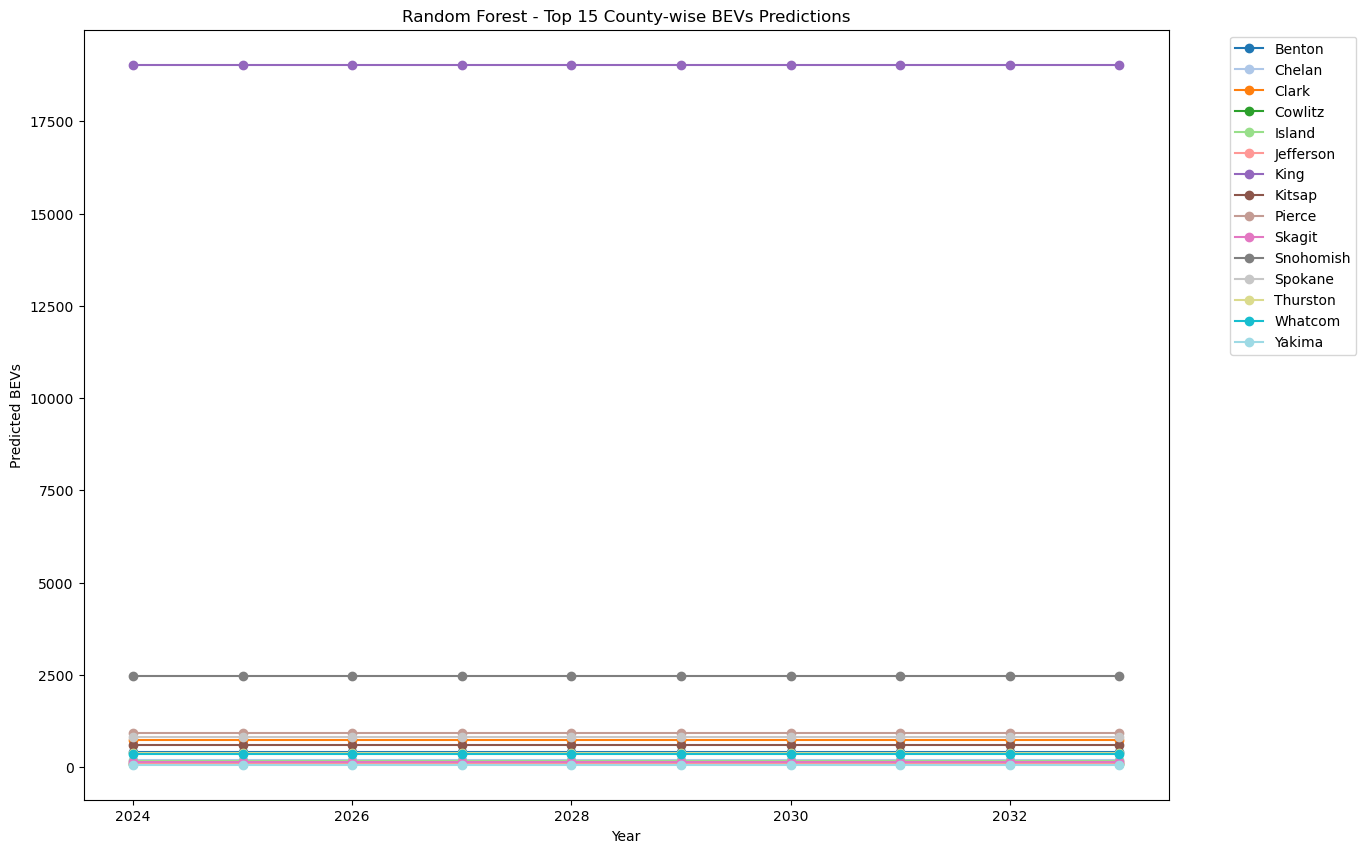

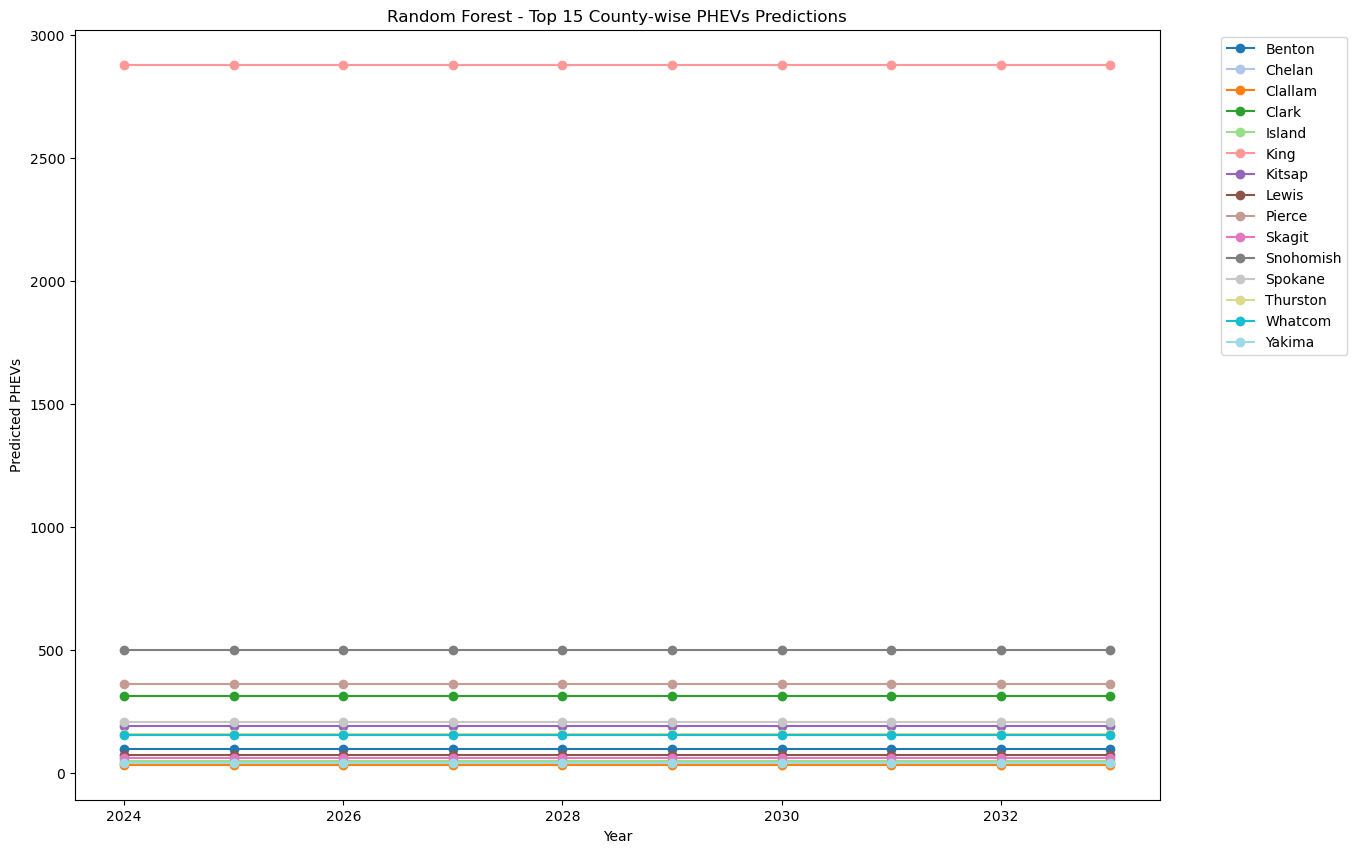

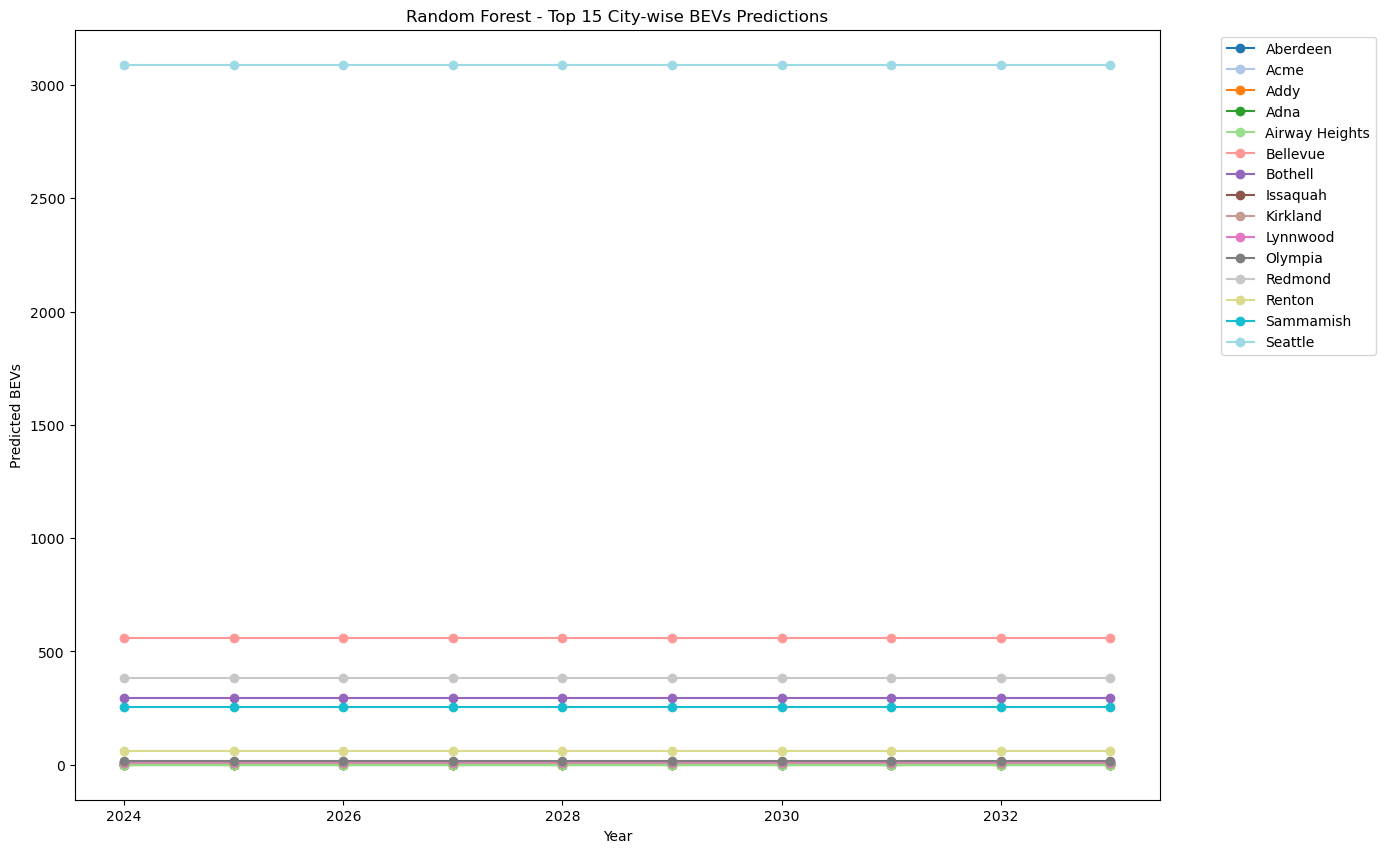

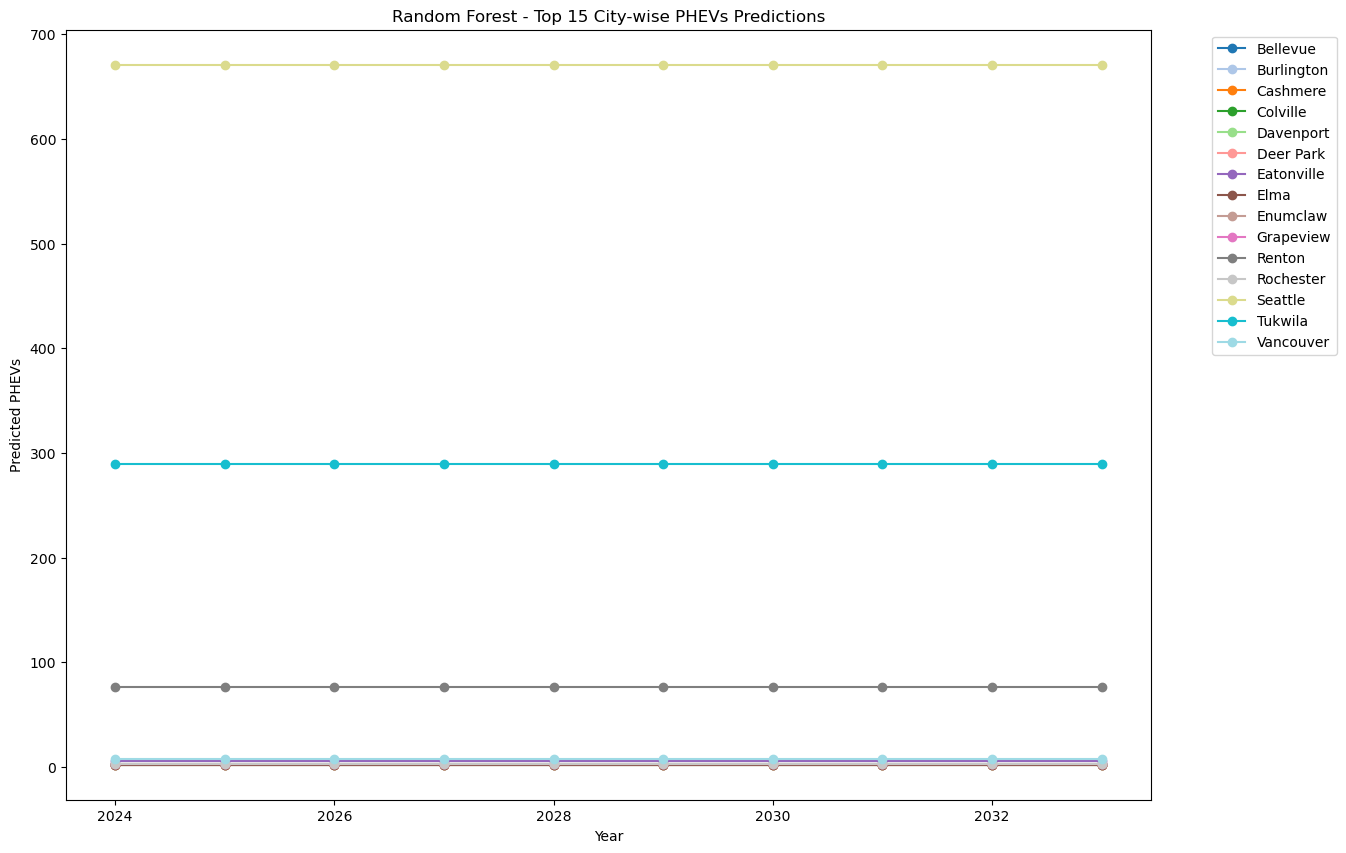

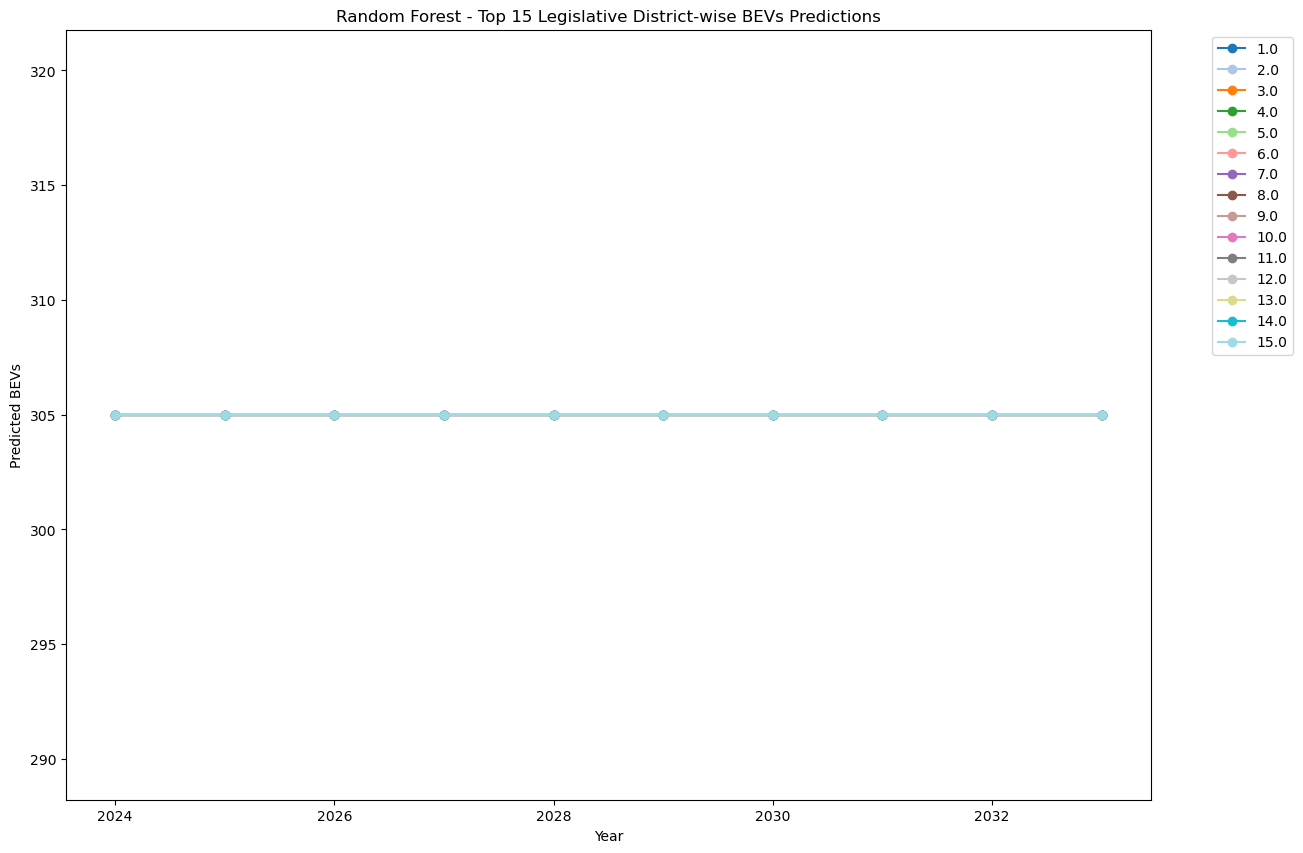

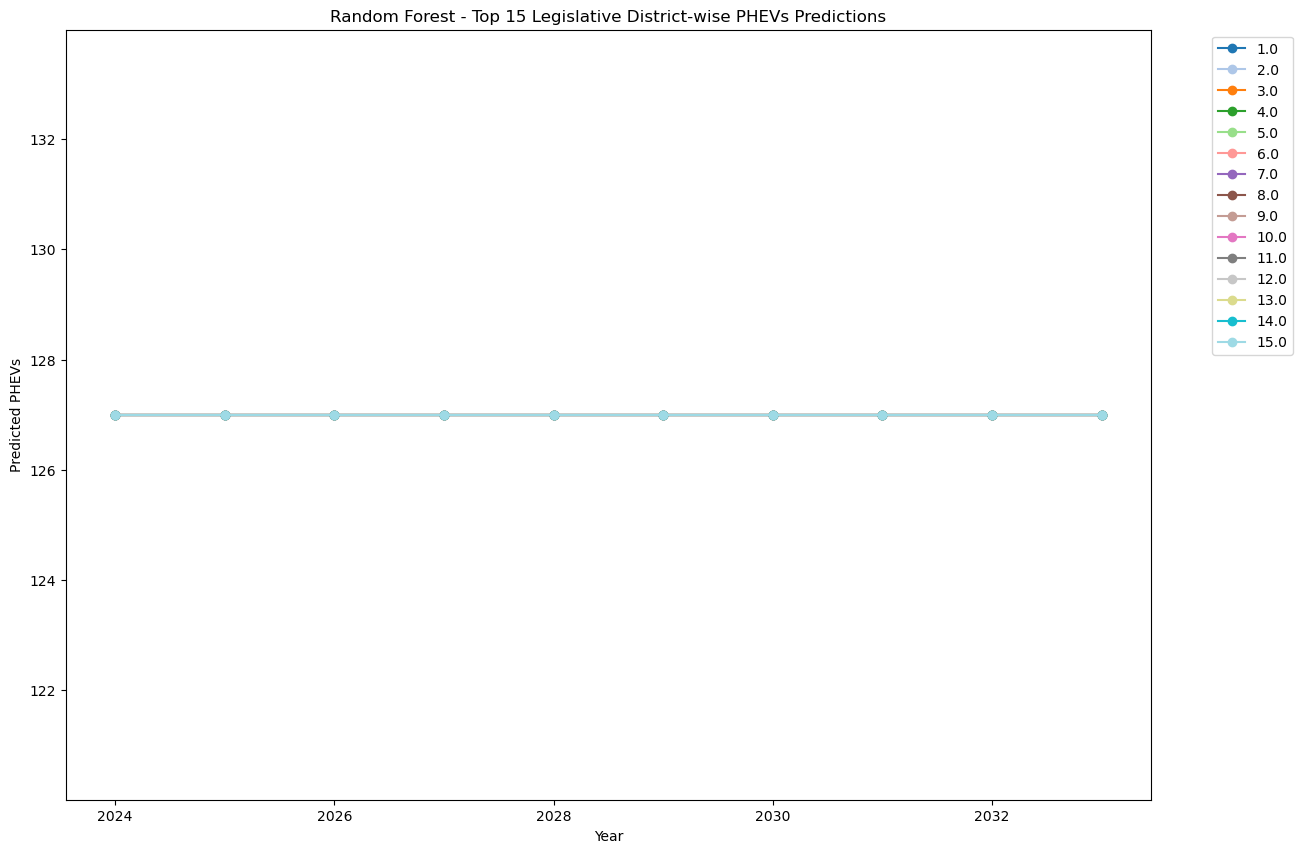

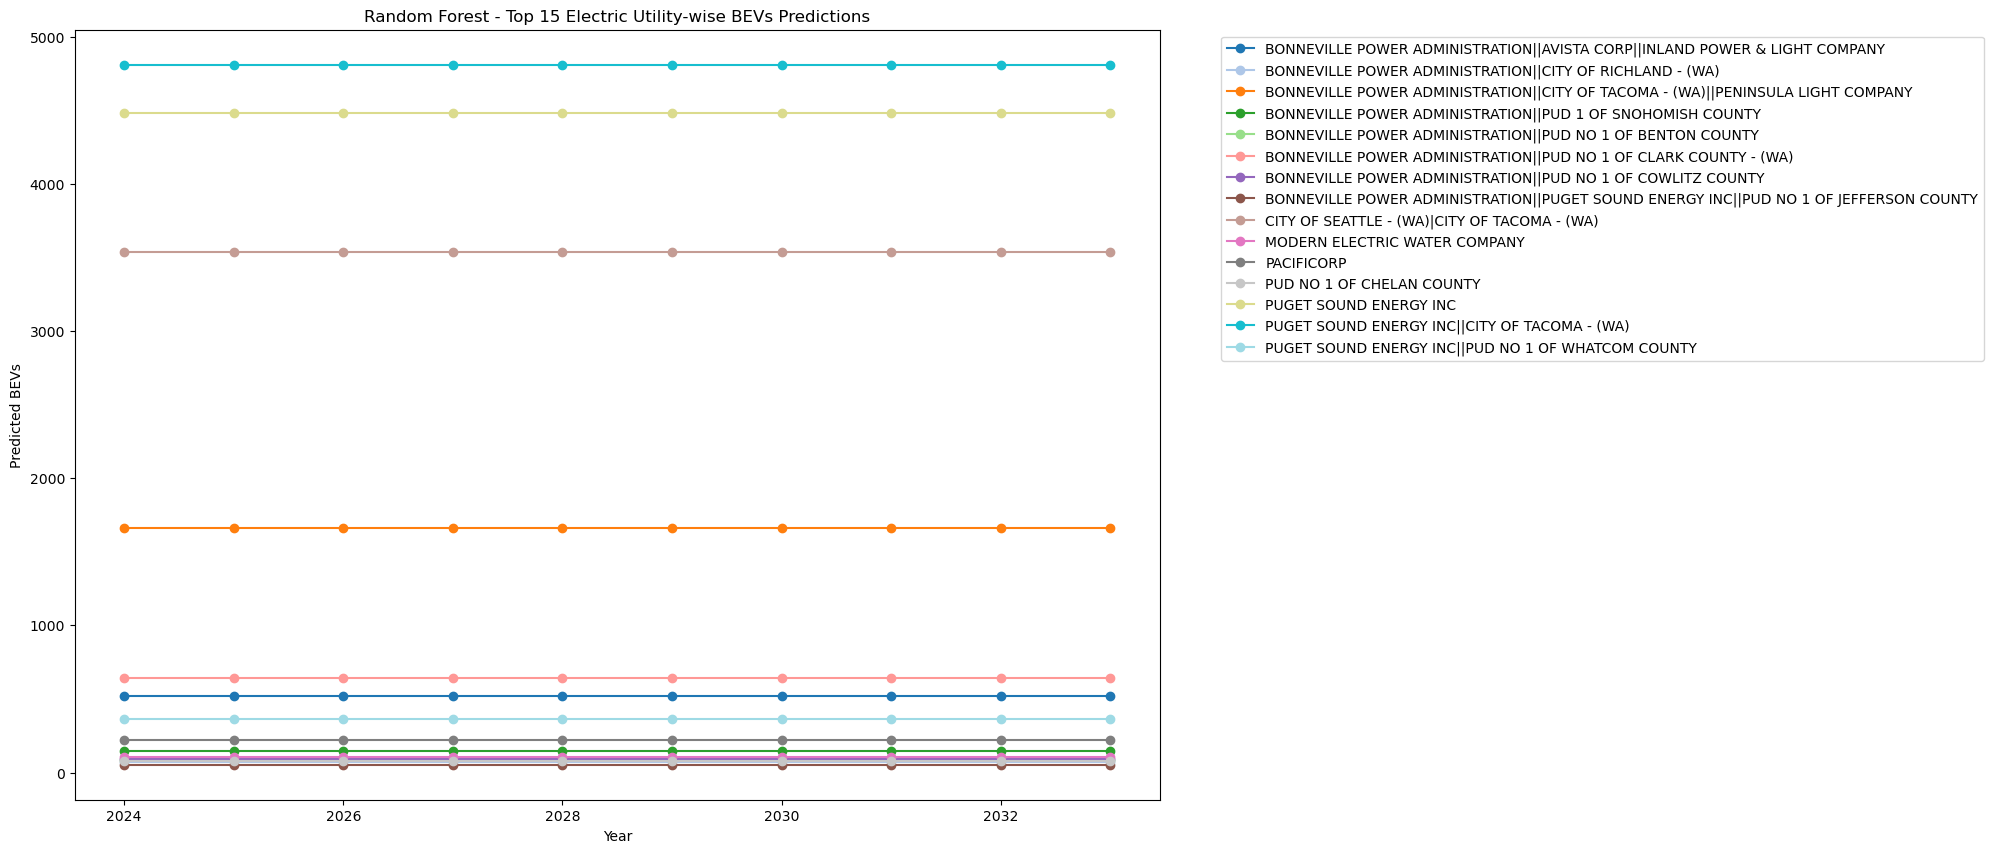

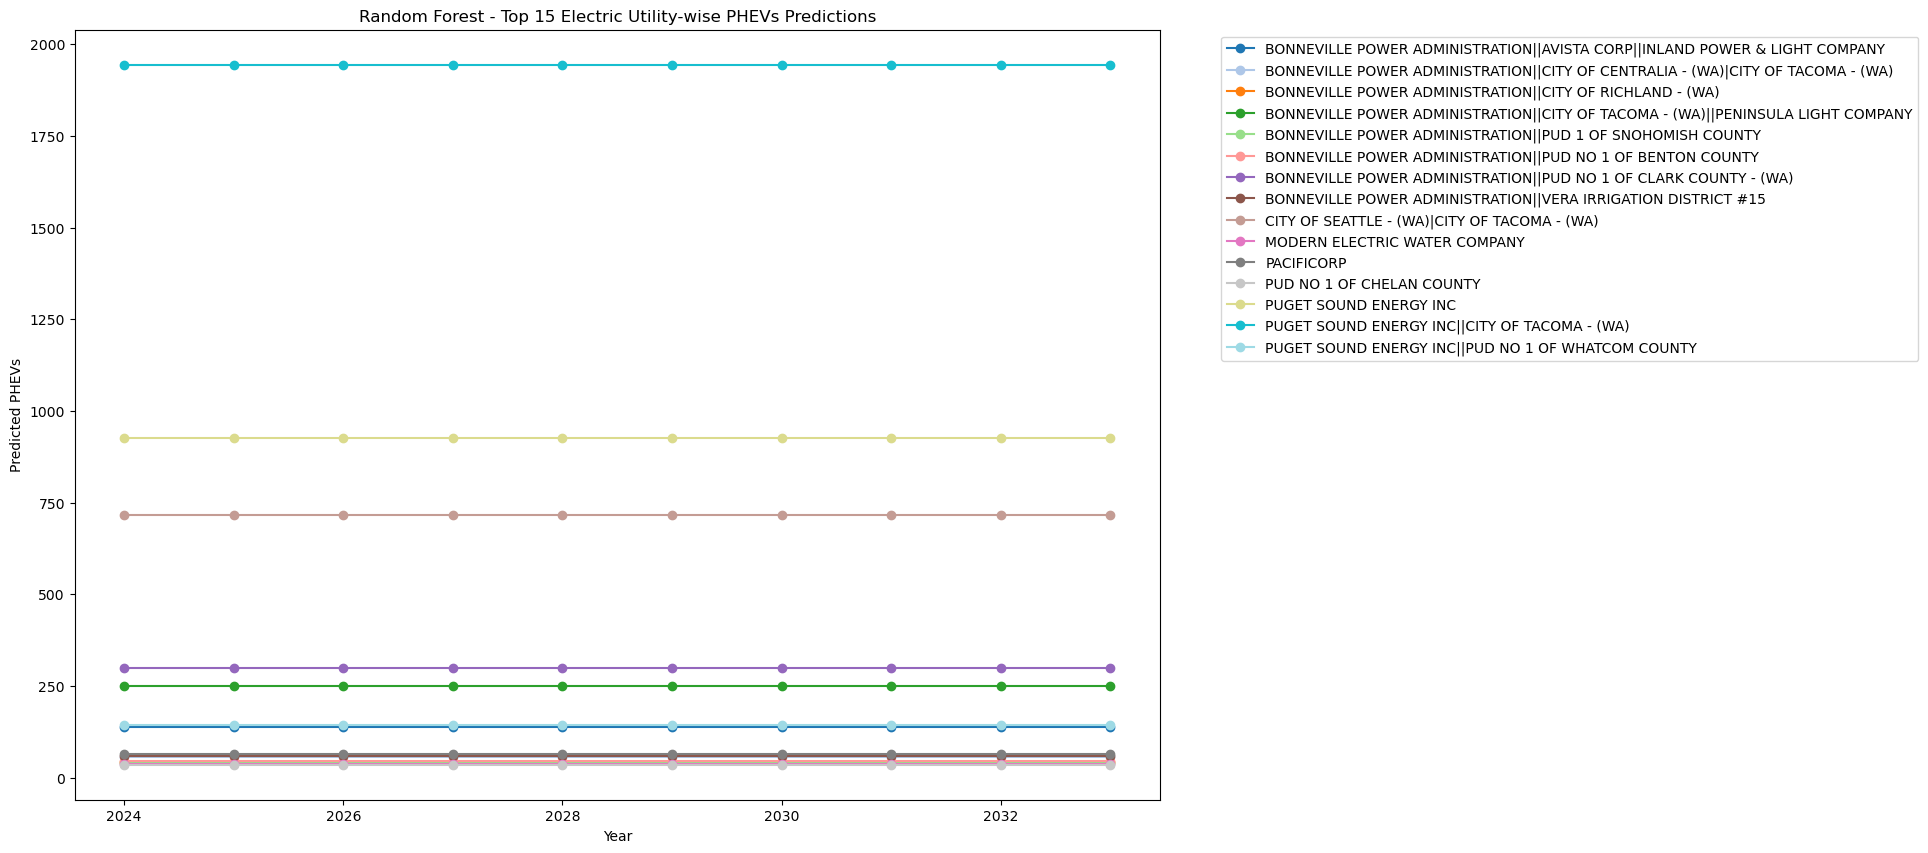

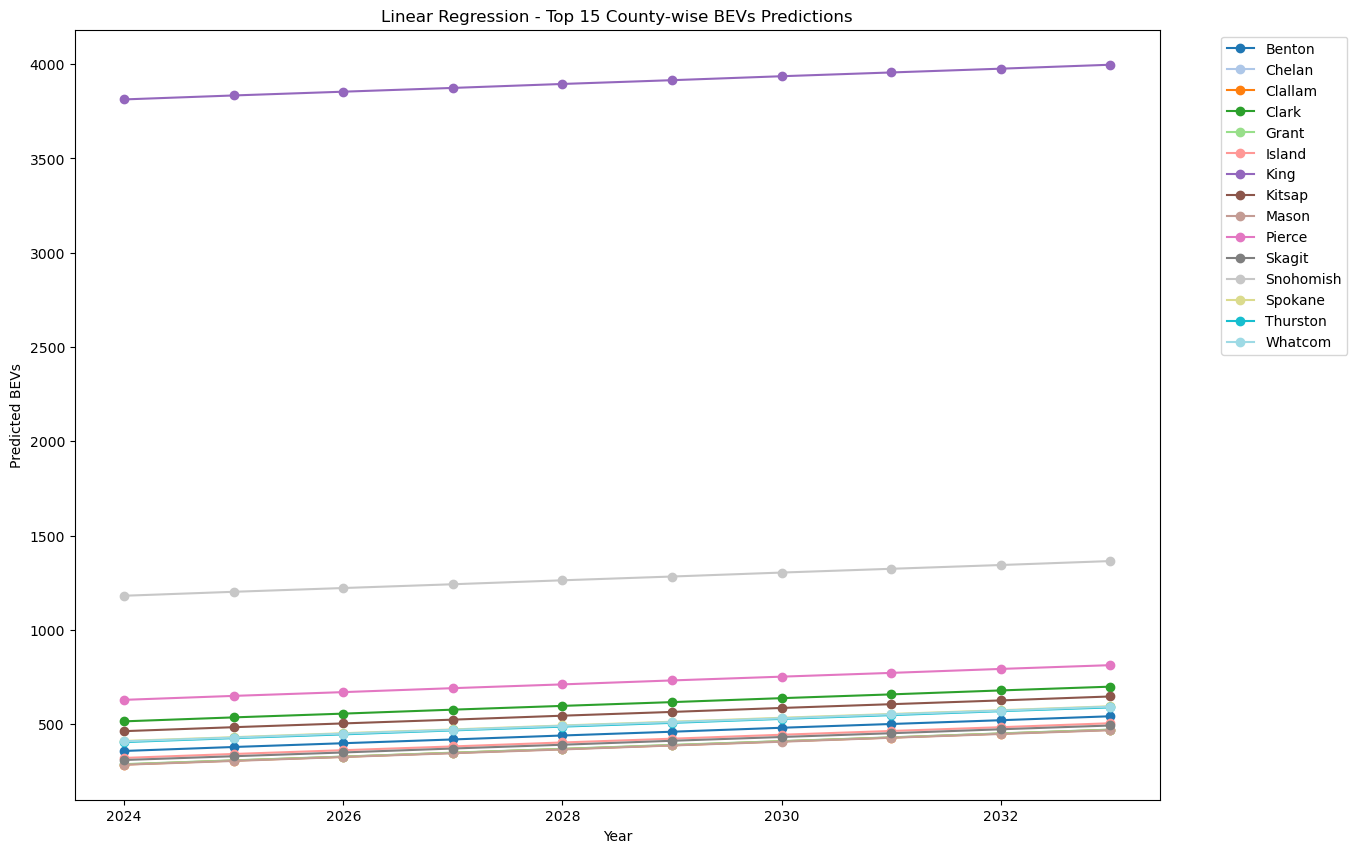

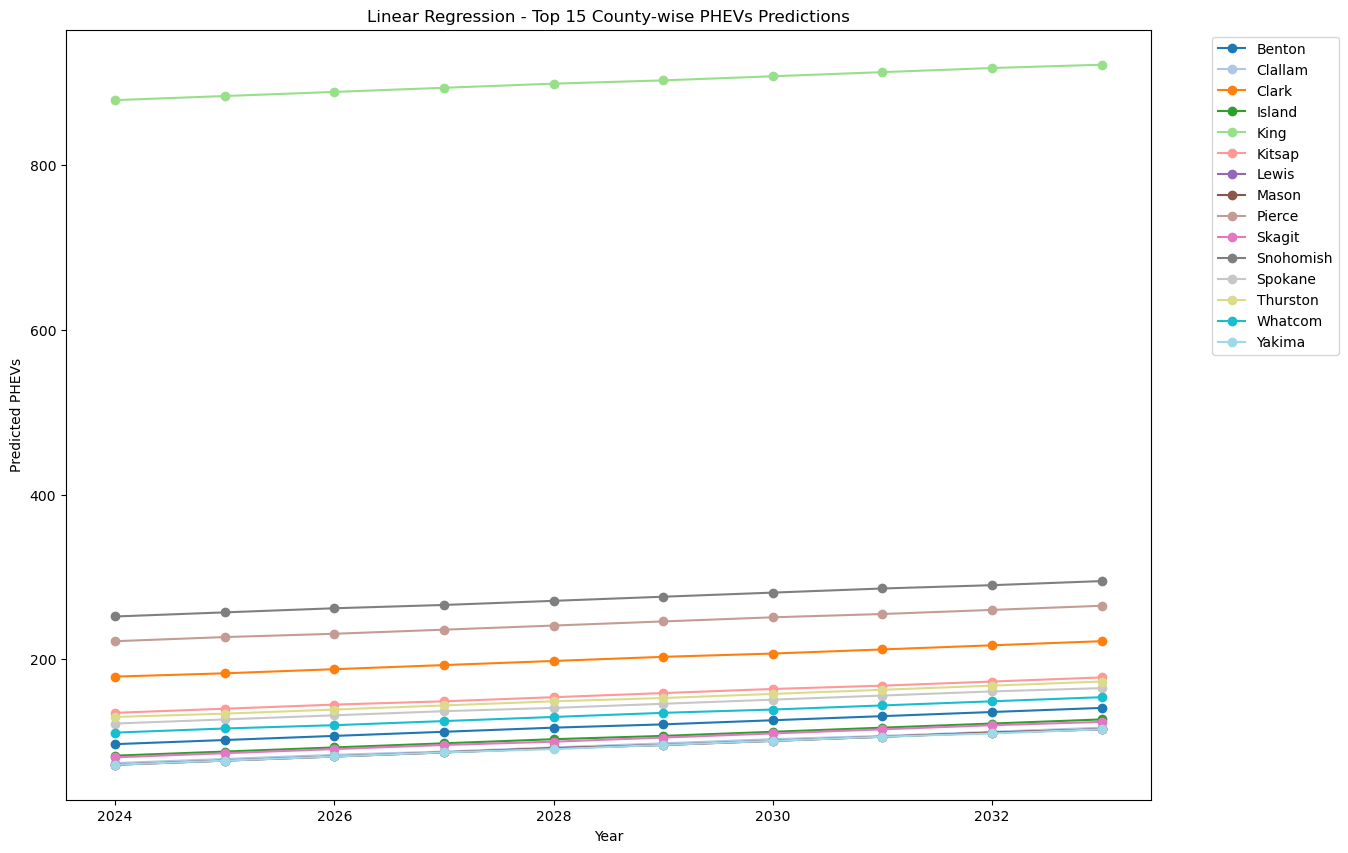

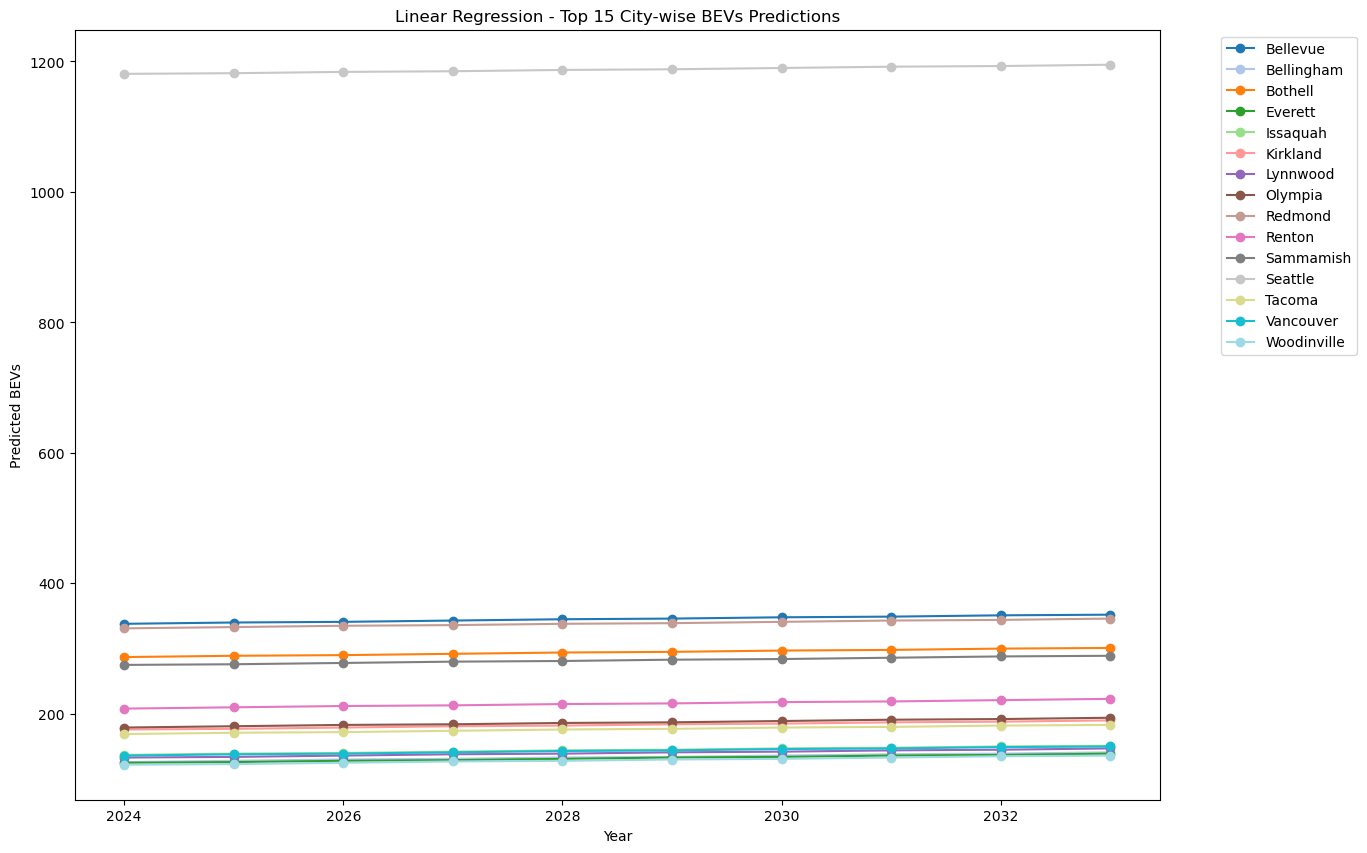

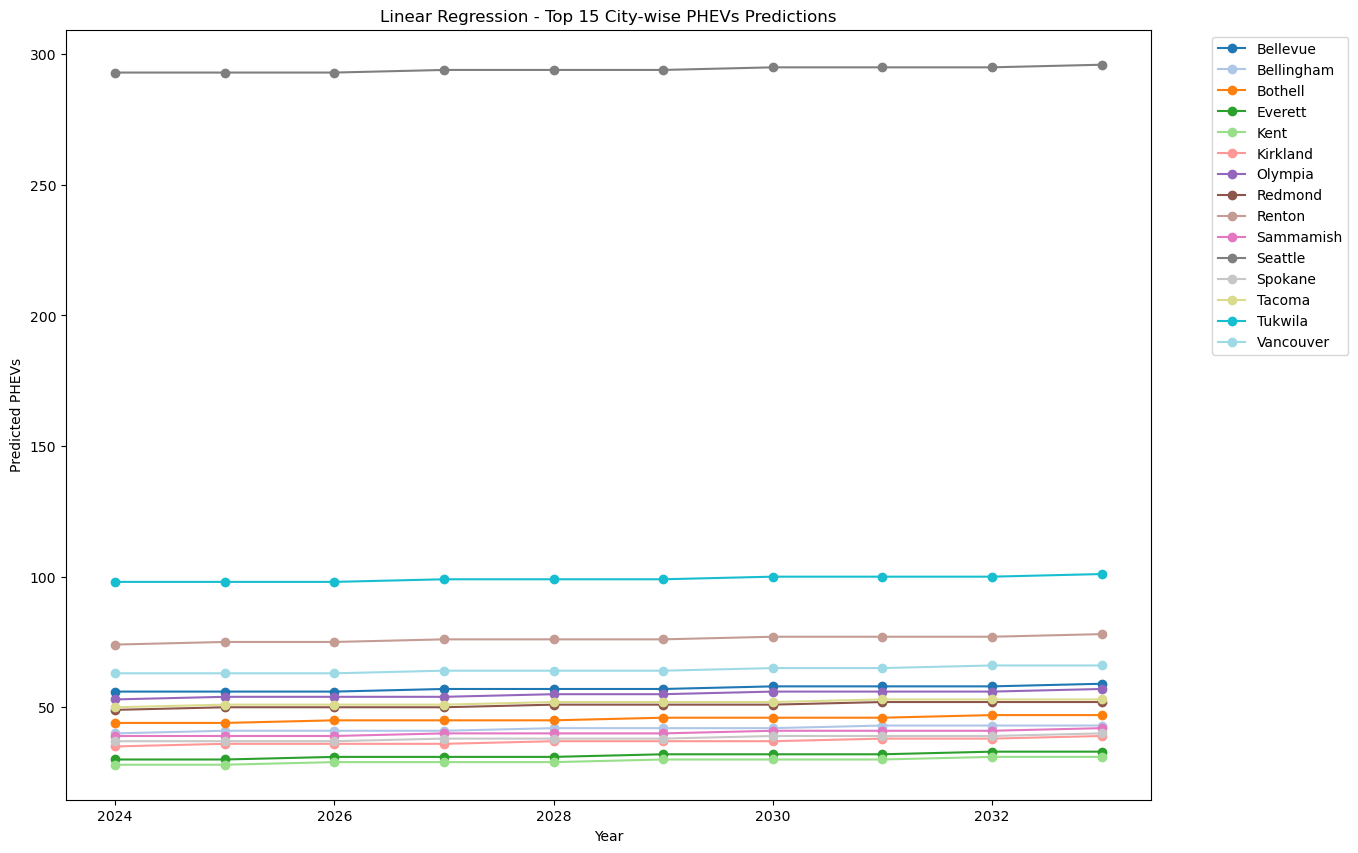

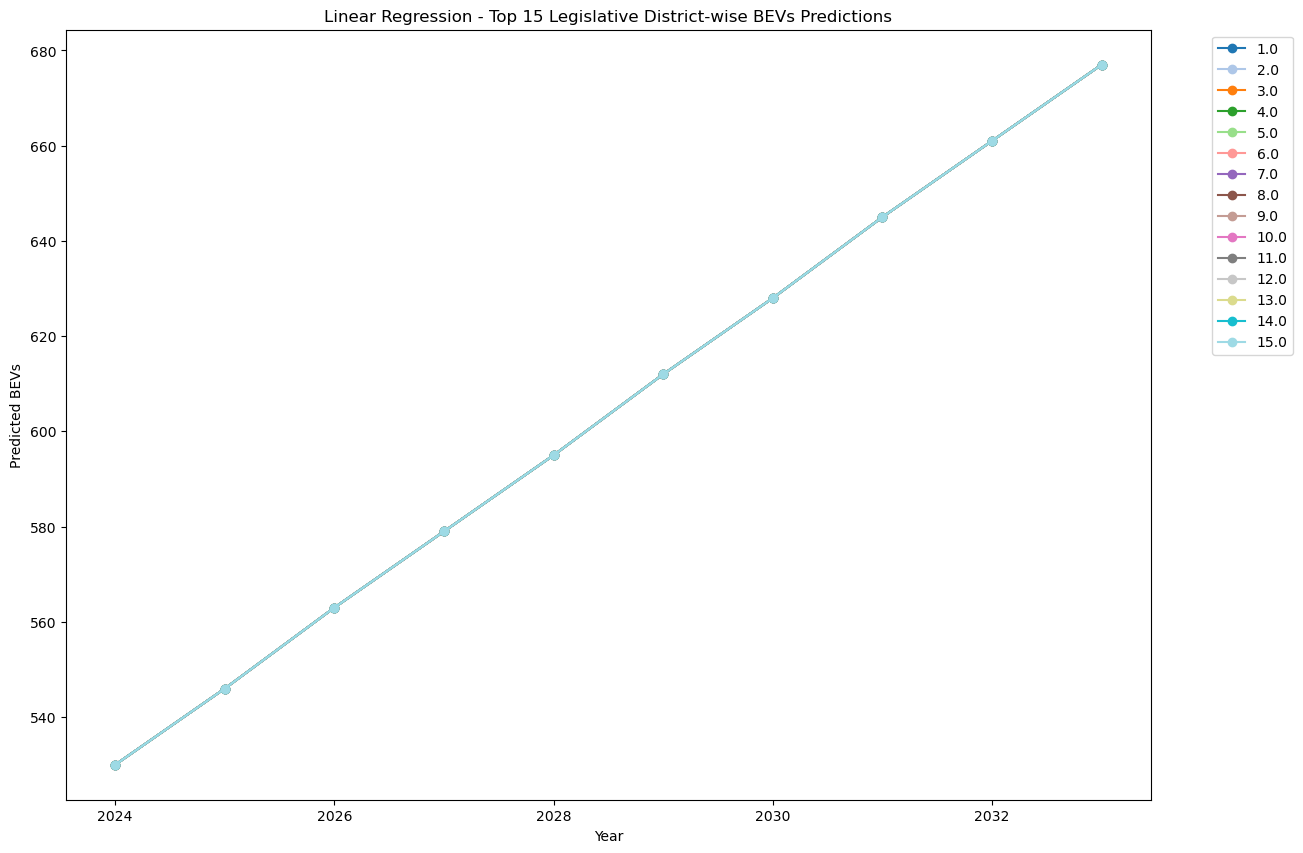

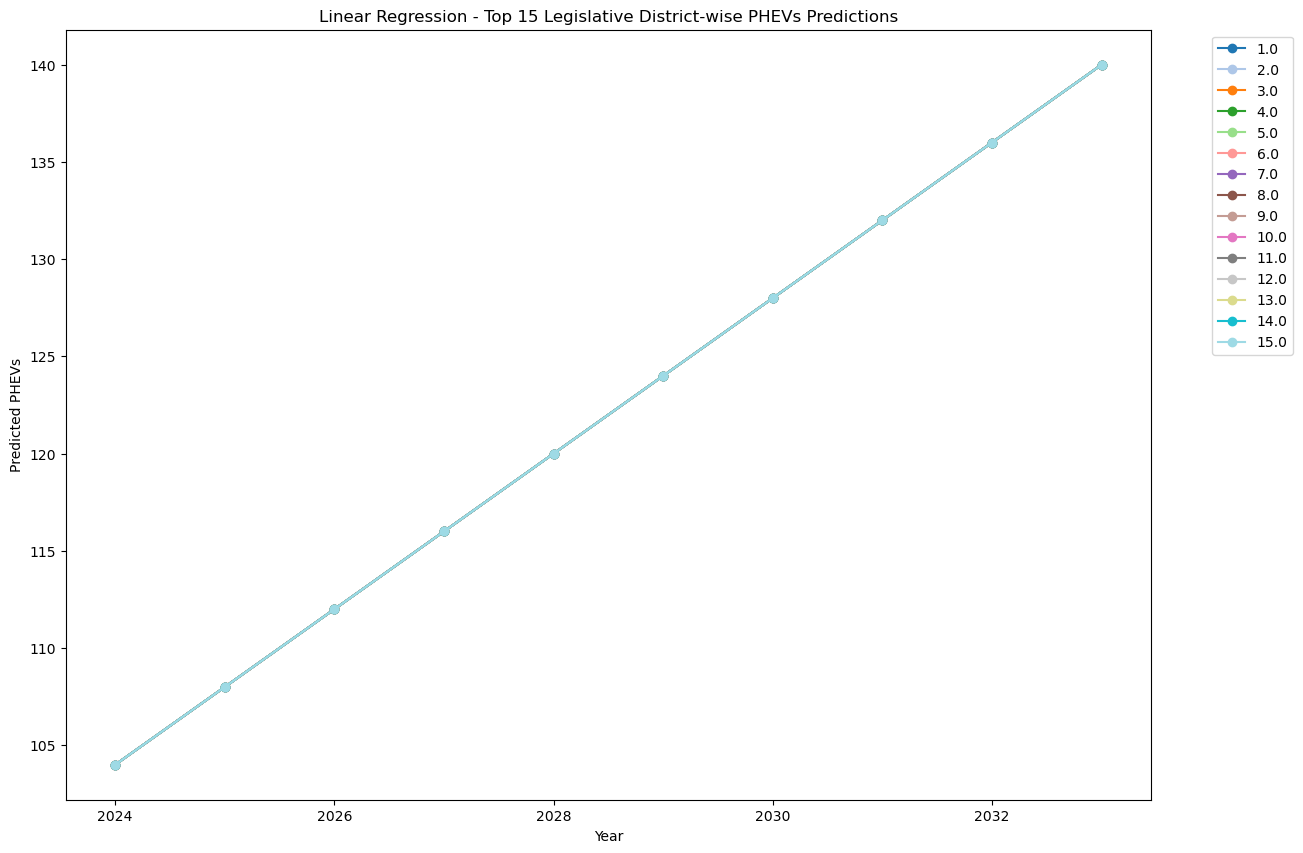

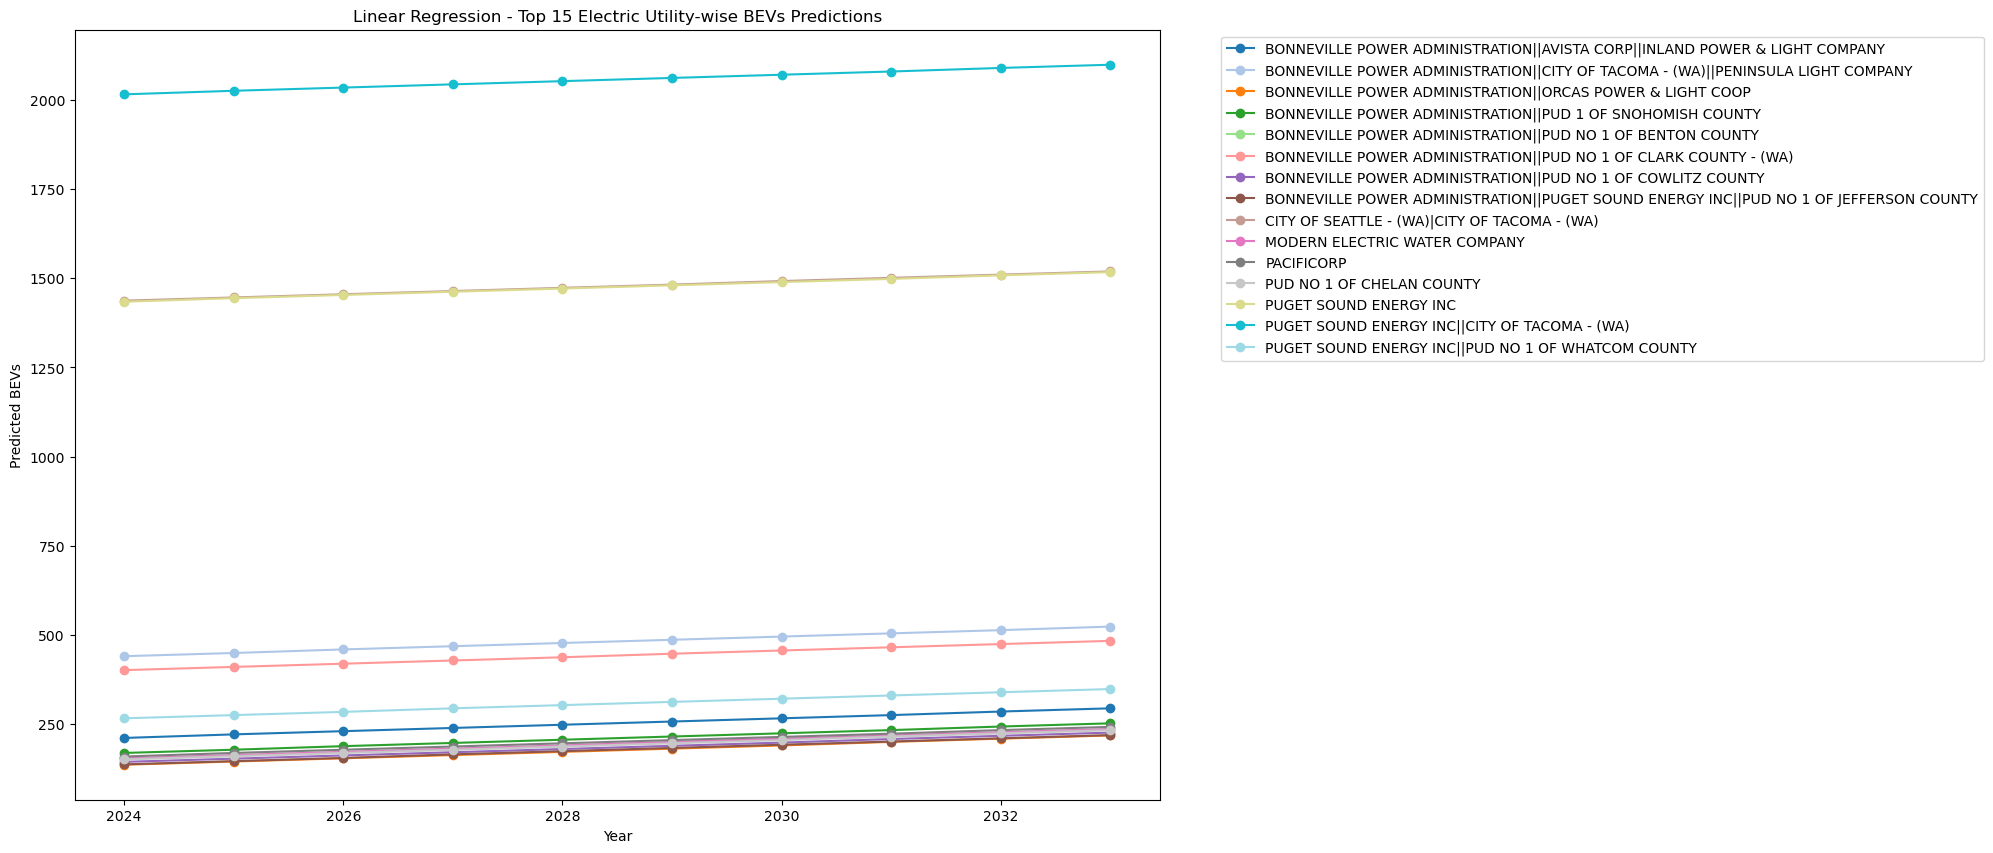

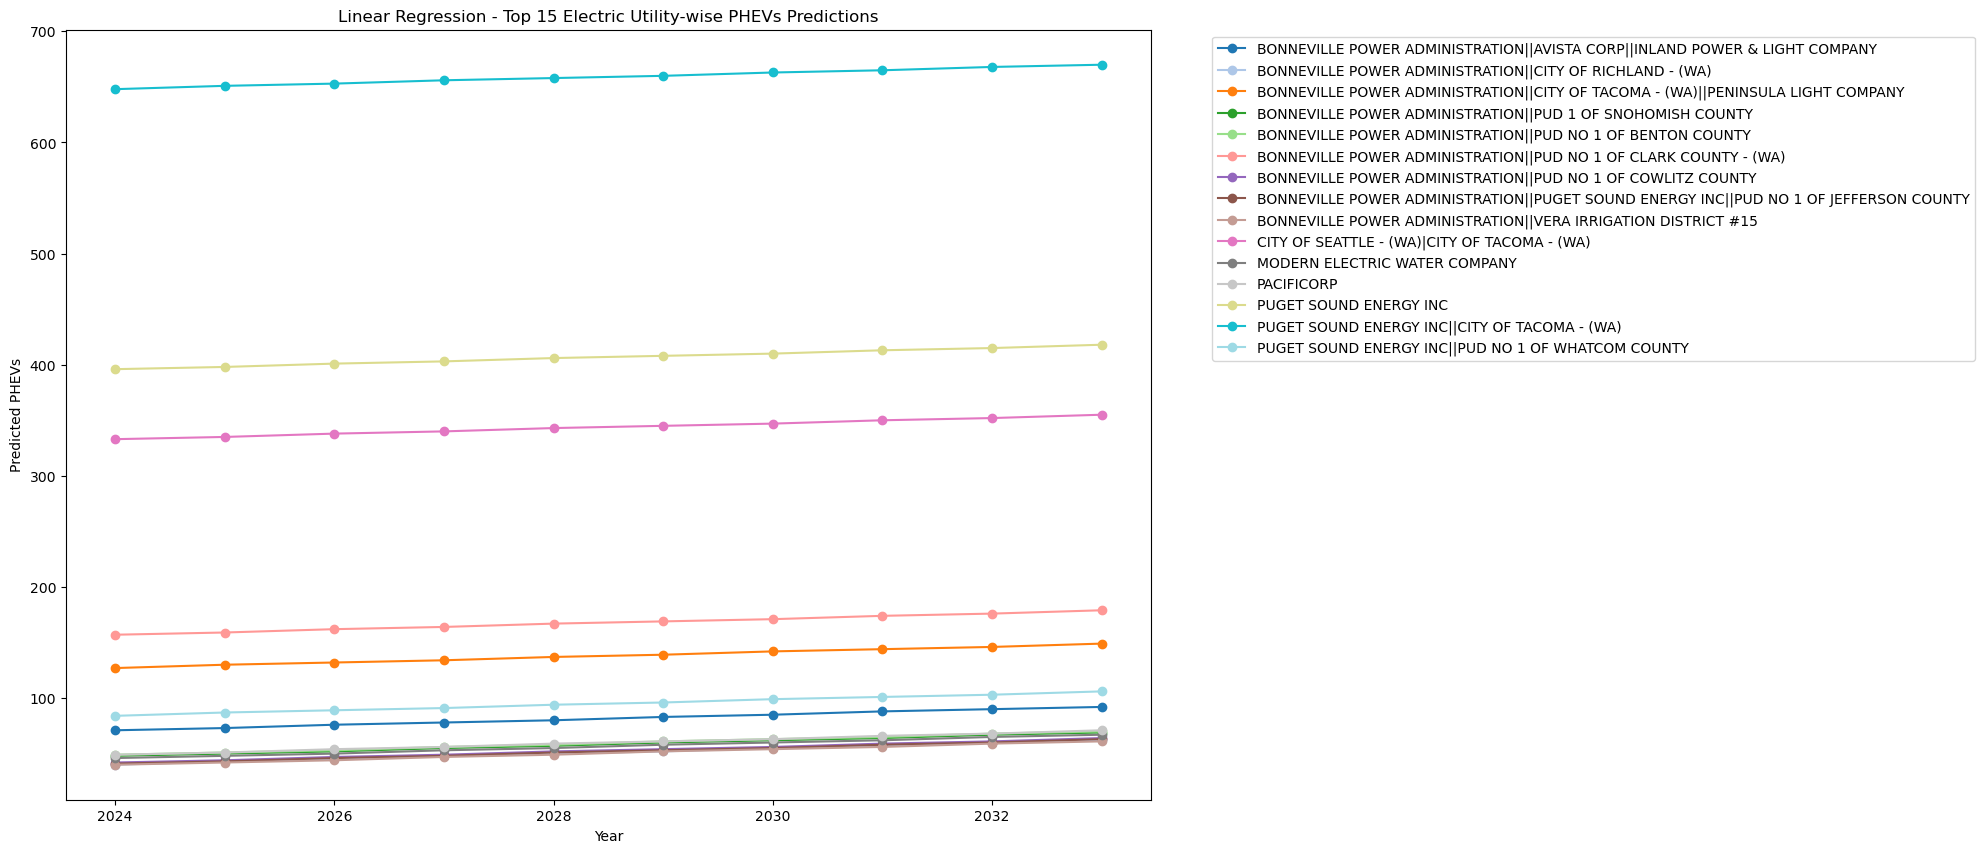

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to get the top N categories based on total predicted values
def get_top_n(predictions, name_column, n=15):
    top_n_names = predictions.groupby(name_column)['Predicted_Values'].sum().nlargest(n).index
    return predictions[predictions[name_column].isin(top_n_names)]

# Function to plot predictions for top N categories with distinct colors
def plot_top_predictions(predictions, title, xlabel, ylabel, name_column):
    plt.figure(figsize=(14, 10))
    unique_names = predictions[name_column].unique()
    colors = plt.colormaps['tab20'](np.linspace(0, 1, len(unique_names)))
    for i, name in enumerate(unique_names):
        subset = predictions[predictions[name_column] == name]
        plt.plot(subset['Year'], subset['Predicted_Values'], marker='o', label=name, color=colors[i])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Apply the function to get the top 15 for each category and model
top_15_rf_bev_county = get_top_n(predictions_rf_bev_county, 'County')
top_15_rf_phev_county = get_top_n(predictions_rf_phev_county, 'County')

top_15_rf_bev_city = get_top_n(predictions_rf_bev_city, 'City')
top_15_rf_phev_city = get_top_n(predictions_rf_phev_city, 'City')

top_15_rf_bev_leg_dist = get_top_n(predictions_rf_bev_leg_dist, 'Legislative District')
top_15_rf_phev_leg_dist = get_top_n(predictions_rf_phev_leg_dist, 'Legislative District')

top_15_rf_bev_elec_utility = get_top_n(predictions_rf_bev_elec_utility, 'Electric Utility')
top_15_rf_phev_elec_utility = get_top_n(predictions_rf_phev_elec_utility, 'Electric Utility')

top_15_lr_bev_county = get_top_n(predictions_lr_bev_county, 'County')
top_15_lr_phev_county = get_top_n(predictions_lr_phev_county, 'County')

top_15_lr_bev_city = get_top_n(predictions_lr_bev_city, 'City')
top_15_lr_phev_city = get_top_n(predictions_lr_phev_city, 'City')

top_15_lr_bev_leg_dist = get_top_n(predictions_lr_bev_leg_dist, 'Legislative District')
top_15_lr_phev_leg_dist = get_top_n(predictions_lr_phev_leg_dist, 'Legislative District')

top_15_lr_bev_elec_utility = get_top_n(predictions_lr_bev_elec_utility, 'Electric Utility')
top_15_lr_phev_elec_utility = get_top_n(predictions_lr_phev_elec_utility, 'Electric Utility')

# Plot top 15 predictions for Random Forest
plot_top_predictions(top_15_rf_bev_county, 'Random Forest - Top 15 County-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'County')
plot_top_predictions(top_15_rf_phev_county, 'Random Forest - Top 15 County-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'County')

plot_top_predictions(top_15_rf_bev_city, 'Random Forest - Top 15 City-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'City')
plot_top_predictions(top_15_rf_phev_city, 'Random Forest - Top 15 City-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'City')

plot_top_predictions(top_15_rf_bev_leg_dist, 'Random Forest - Top 15 Legislative District-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Legislative District')
plot_top_predictions(top_15_rf_phev_leg_dist, 'Random Forest - Top 15 Legislative District-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Legislative District')

plot_top_predictions(top_15_rf_bev_elec_utility, 'Random Forest - Top 15 Electric Utility-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Electric Utility')
plot_top_predictions(top_15_rf_phev_elec_utility, 'Random Forest - Top 15 Electric Utility-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Electric Utility')

# Plot top 15 predictions for Linear Regression
plot_top_predictions(top_15_lr_bev_county, 'Linear Regression - Top 15 County-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'County')
plot_top_predictions(top_15_lr_phev_county, 'Linear Regression - Top 15 County-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'County')

plot_top_predictions(top_15_lr_bev_city, 'Linear Regression - Top 15 City-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'City')
plot_top_predictions(top_15_lr_phev_city, 'Linear Regression - Top 15 City-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'City')

plot_top_predictions(top_15_lr_bev_leg_dist, 'Linear Regression - Top 15 Legislative District-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Legislative District')
plot_top_predictions(top_15_lr_phev_leg_dist, 'Linear Regression - Top 15 Legislative District-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Legislative District')

plot_top_predictions(top_15_lr_bev_elec_utility, 'Linear Regression - Top 15 Electric Utility-wise BEVs Predictions', 'Year', 'Predicted BEVs', 'Electric Utility')
plot_top_predictions(top_15_lr_phev_elec_utility, 'Linear Regression - Top 15 Electric Utility-wise PHEVs Predictions', 'Year', 'Predicted PHEVs', 'Electric Utility')


Here are some conclusions drawn from the output of the Random Forest and Linear Regression predictions for Battery Electric Vehicles (BEVs) and Plug-in Hybrid Electric Vehicles (PHEVs) for different categories:

### General Observations:
1. **Linear Regression Predictions:**
   - **Increasing Trend:** Linear regression models show a clear increasing trend in BEVs and PHEVs across all categories over the years from 2024 to 2033. This indicates a steady growth in the adoption of electric vehicles.
   - **County-wise Analysis:** Larger counties such as King, Pierce, and Snohomish have higher predicted values for BEVs and PHEVs, reflecting their larger populations and possibly better infrastructure for electric vehicles.
   - **City-wise Analysis:** Cities within these counties also show increasing trends in electric vehicle adoption. Major cities likely have better facilities and incentives encouraging the switch to electric vehicles.
   - **Legislative District-wise Analysis:** Predictions are uniform across all legislative districts
   - **Electric Utility-wise Analysis:** Certain utilities, like Puget Sound Energy Inc., show higher predicted values, indicating areas served by these utilities may have better infrastructure or incentives for electric vehicles.

2. **Random Forest Predictions:**
   - **Static Predictions:** Random Forest model predictions are static over the years, indicating no growth in the adoption of electric vehicles. This suggests that the model might not be capturing the temporal growth trends adequately.
   - **County-wise Analysis:** High predicted values for BEVs and PHEVs in counties like King, Pierce, and Snohomish indicate these counties have high electric vehicle adoption. However, the lack of growth over the years suggests potential limitations in the model.
   - **City-wise Analysis:** Many cities have zero predicted values, which might indicate a limitation in the model's ability to capture data at a granular city level or a lack of historical data for those cities.
   - **Legislative District-wise Analysis:** Similar to the city-wise predictions, legislative district-wise predictions show static values, reflecting the same limitation of the model.
   - **Electric Utility-wise Analysis:** Certain utilities, like Puget Sound Energy Inc., show higher predicted values, but again, there is no growth over the years.

### Specific Insights:
1. **King County:**
   - **Linear Regression:** Predicted to see the most significant increase in BEVs, from 3813 in 2024 to 3997 in 2033.
   - **Random Forest:** Shows a static prediction of 19035 BEVs consistently from 2024 to 2033, indicating high current adoption but not reflecting future growth.

2. **Pierce County:**
   - **Linear Regression:** Predicted increase from 629 BEVs in 2024 to 813 BEVs in 2033.
   - **Random Forest:** Static prediction of 931 BEVs from 2024 to 2033.

3. **Electric Utilities:**
   - **Linear Regression:** Shows a gradual increase in predictions, with utilities like Puget Sound Energy Inc. growing from 1434 BEVs in 2024 to 1517 BEVs in 2033.
   - **Random Forest:** Static predictions, with Puget Sound Energy Inc. showing 4482 BEVs consistently over the years.


**Conclusion**

An analysis after using existing geographical features like City, County, Legislative District, and Electric Utility shows that while we can get some idea of electric vehicle (EV) adoption trends, the predictions aren’t as accurate as we would like. The current models, struggle to fit the data well indicating that there is still room for improvement.

To really understand and predict how many people will start using electric cars, we need to look beyond just where they live. We need to incorporate additional factors that paint a fuller picture of the people and the economy in those areas. Here are some key factors that could make our predictions much better:

**Population Growth:** Areas with rapid population growth are likely to see more new vehicles, including EVs.
**Income Levels:** Higher income levels mean more people can afford electric vehicles.
**Average Household Income:** Places with higher disposable income tend to have higher EV adoption rates.
**Unemployment Rate:** Economic stability, shown by lower unemployment rates, can influence people's ability to buy new cars.
**Electricity Costs:** Lower electricity costs can make electric vehicles more appealing compared to traditional fuel vehicles.

Adding these demographic and economic factors will help us create a more accurate and reliable prediction model. This, in turn, will help policymakers and businesses make better decisions about where to focus their efforts and resources to promote electric vehicle adoption.

**Recommendations**

To improve our predictions and provide actionable insights, we should:

**Gather More Data:** Collect information on population growth, income levels, average household income, unemployment rates, and electricity costs.
Integrate New Features: Add these new data points to our existing dataset and prepare them for analysis.

**Retrain Models:** Use the enhanced dataset to train our machine learning models and evaluate the improvements.
**Select Key Features:** Identify which new features have the most impact on predictions using methods like feature importance scores.

By incorporating these additional demographic and economic factors, we’ll be able to make much more accurate predictions. This will help in strategically promoting electric vehicle adoption, leading to a cleaner, more sustainable future.



<p style="font-size:30px;"><b><u>Research Question No.3</u></b></p>

<p style="font-size:20px;"><b>How do geographic location and local infrastructure (electric utilities) impact EV adoption in Washington?</b></p>

<u>STEP I</u>

<b>Feature Engineering</b>

In [241]:
elec_dataset = electric_v
# Create a new feature for the number of EVs per county
ev_count_per_county = elec_dataset.groupby('County')['DOL Vehicle ID'].count().reset_index()
ev_count_per_county.columns = ['County', 'EV_Count_County']
# Merge this feature back into the original dataset
elec_dataset = elec_dataset.merge(ev_count_per_county, on = 'County', how = 'left')

ev_count_per_city = elec_dataset.groupby('City')['DOL Vehicle ID'].count().reset_index()
ev_count_per_city.columns = ['City', 'EV_Count_City']
# Merge this feature back into the original dataset
elec_dataset =elec_dataset.merge(ev_count_per_city, on = 'City', how = 'left')

ev_count_per_utility = elec_dataset.groupby('Electric Utility')['DOL Vehicle ID'].count().reset_index()
ev_count_per_utility.columns = ['Electric Utility', 'EV_Count_Utility']
# Merge this feature back into the original dataset
elec_dataset =elec_dataset.merge(ev_count_per_utility, on = 'Electric Utility', how = 'left')

ev_count_per_leg_dist = elec_dataset.groupby('Legislative District')['DOL Vehicle ID'].count().reset_index()
ev_count_per_leg_dist.columns = ['Legislative District', 'EV_Count_Leg_Dist']
# Merge this feature back into the original dataset
elec_dataset =elec_dataset.merge(ev_count_per_leg_dist, on = 'Legislative District', how = 'left')

elec_dataset.to_csv("D:/Personal/Data Analytics Learning/TMU/CIND 820 Capstone/test.csv")

<u>STEP II</u>

<b>Descriptive Statistics and Visualization</b>

         Postal Code     Model Year  Electric Range  DOL Vehicle ID  \
count  186471.000000  186471.000000   186471.000000    1.864710e+05   
mean    98261.647527    2020.661148       56.683731    2.225855e+08   
std       304.624225       2.991387       90.771207    7.463921e+07   
min     98001.000000    1997.000000        0.000000    4.385000e+03   
25%     98052.000000    2019.000000        0.000000    1.851589e+08   
50%     98122.000000    2022.000000        0.000000    2.302291e+08   
75%     98371.000000    2023.000000       73.000000    2.578035e+08   
max     99403.000000    2024.000000      337.000000    4.792548e+08   

            Latitude      Longitude           Year  EV_Count_County  \
count  186471.000000  186471.000000  186471.000000    186471.000000   
mean       47.462836    -122.079426    2020.661148     55679.203978   
std         0.610882       1.020595       2.991387     43378.814056   
min        45.595997    -124.614078    1997.000000         3.000000   
25%  

<Figure size 1200x1200 with 0 Axes>

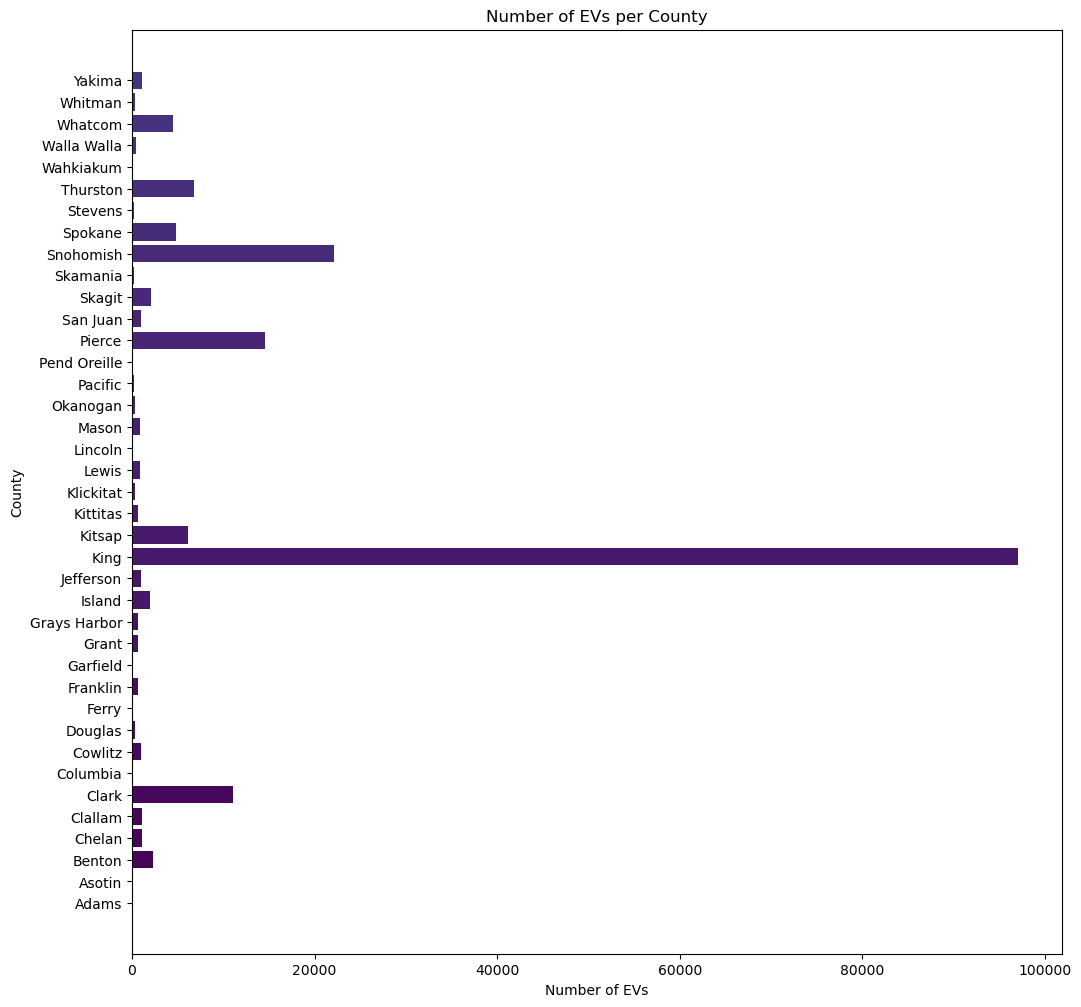

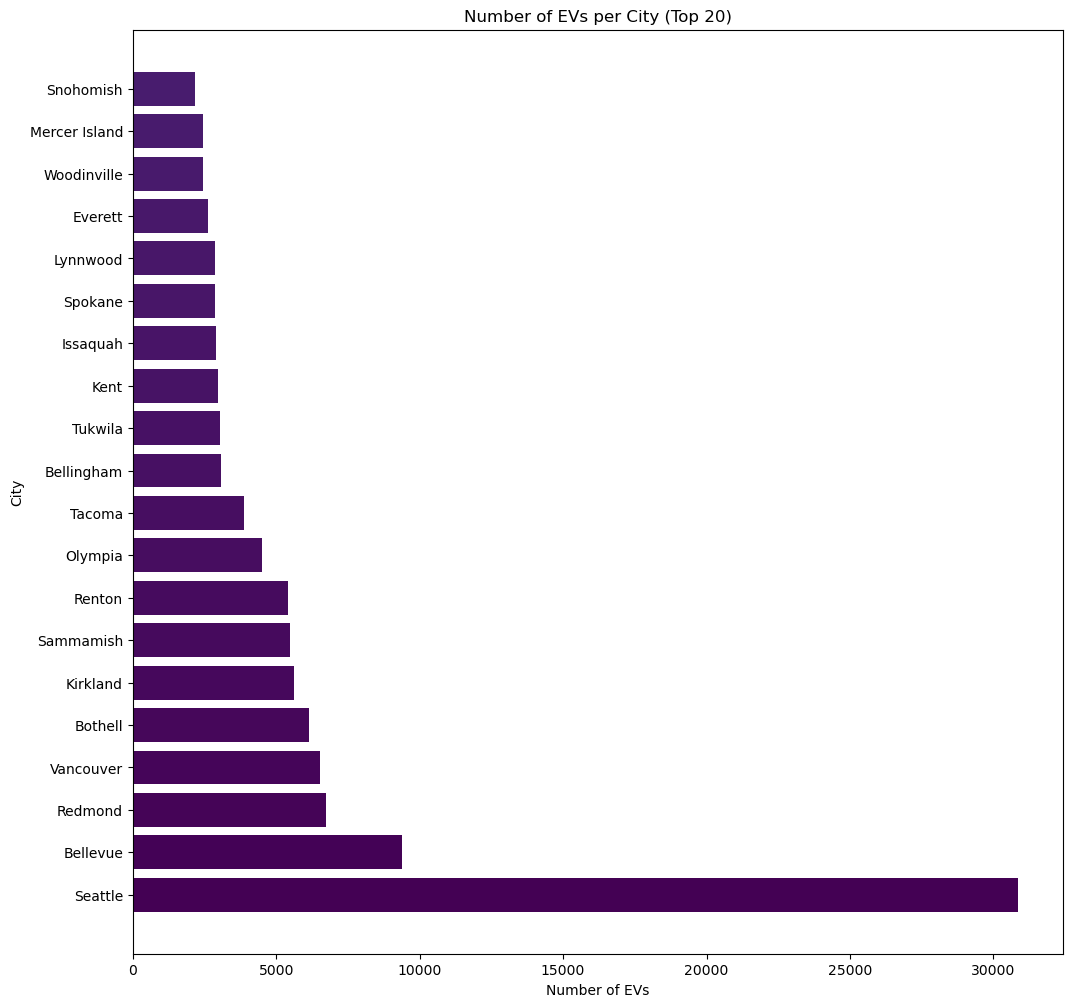

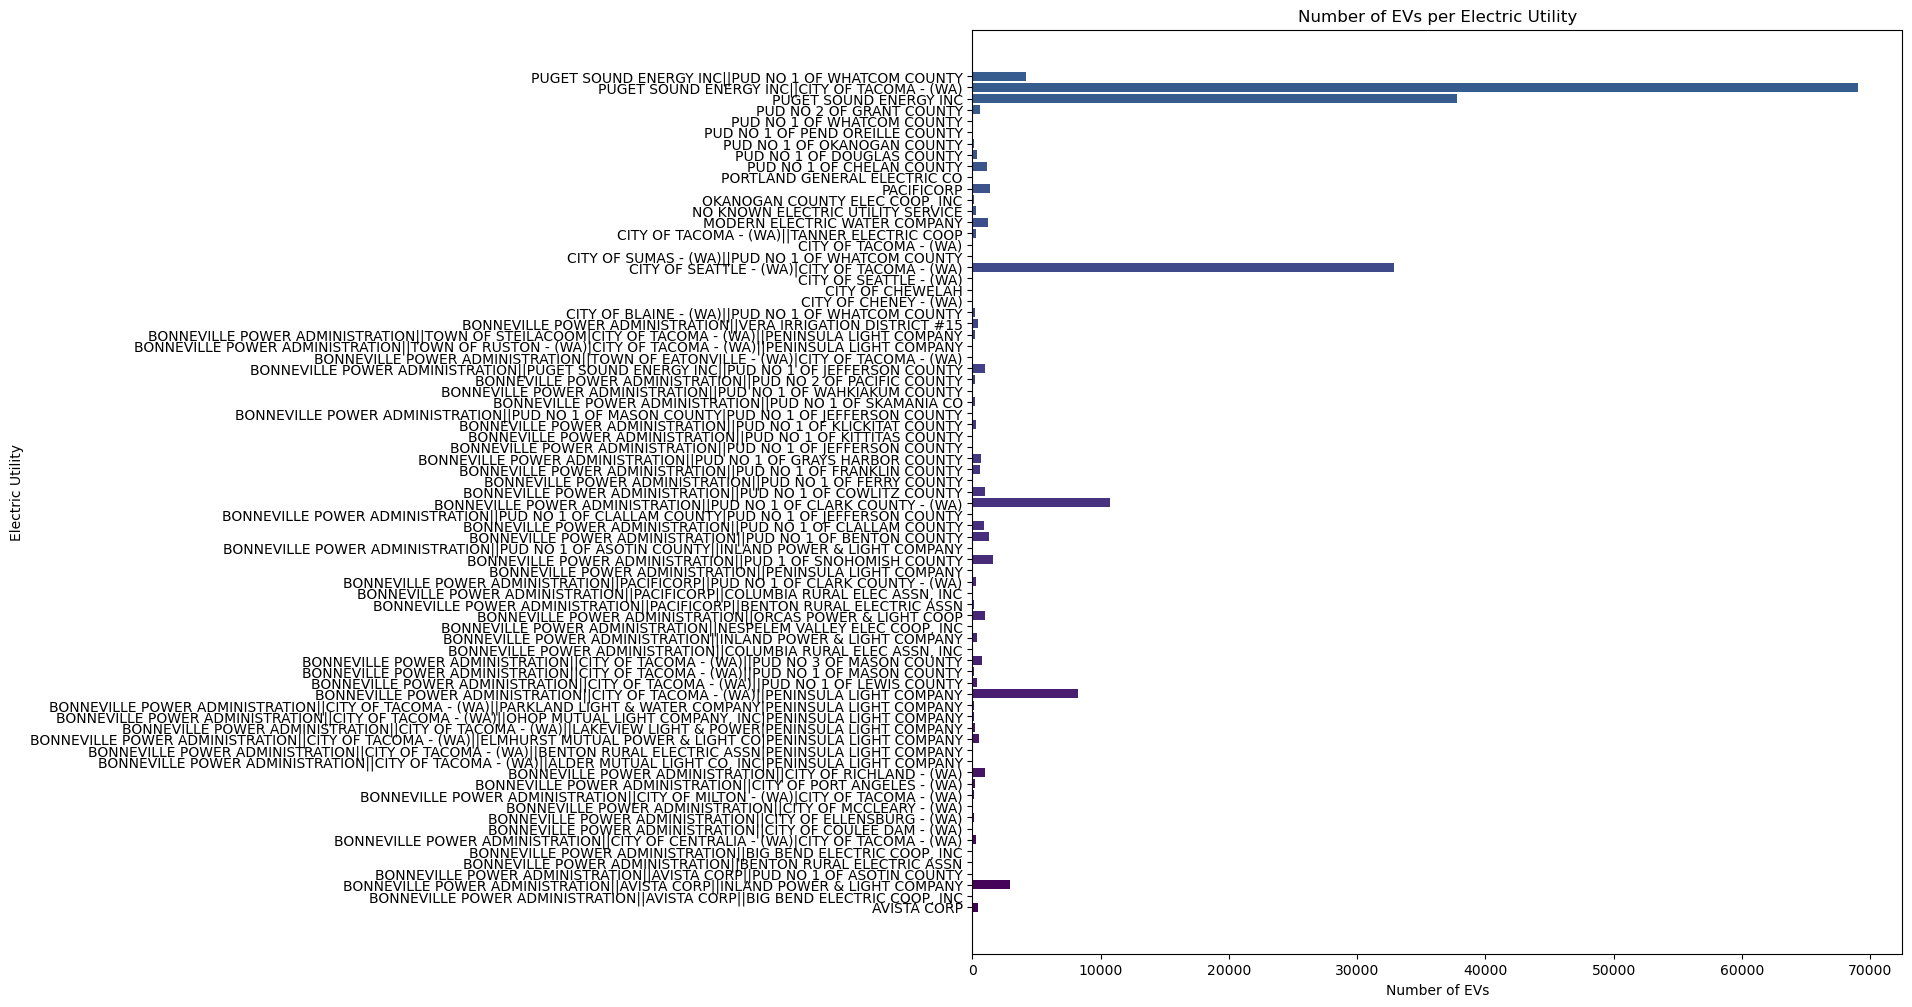

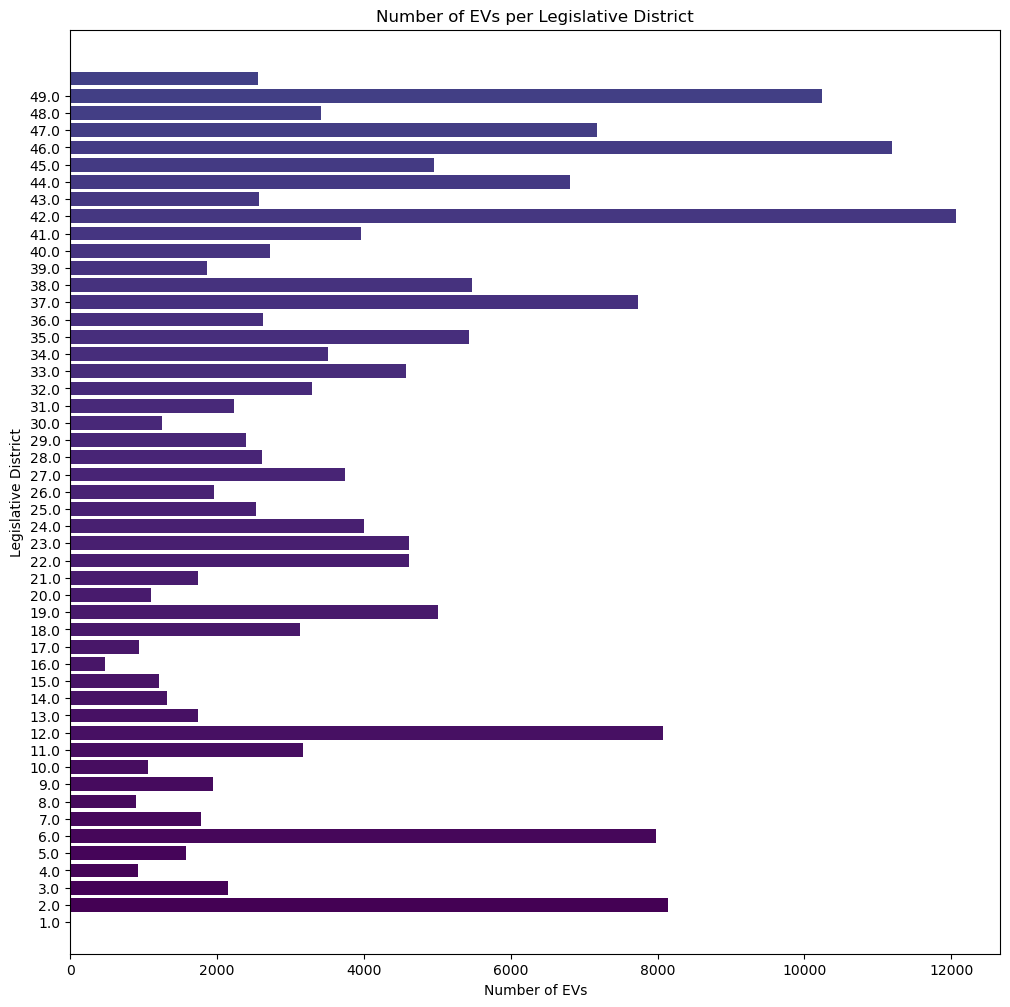

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) 

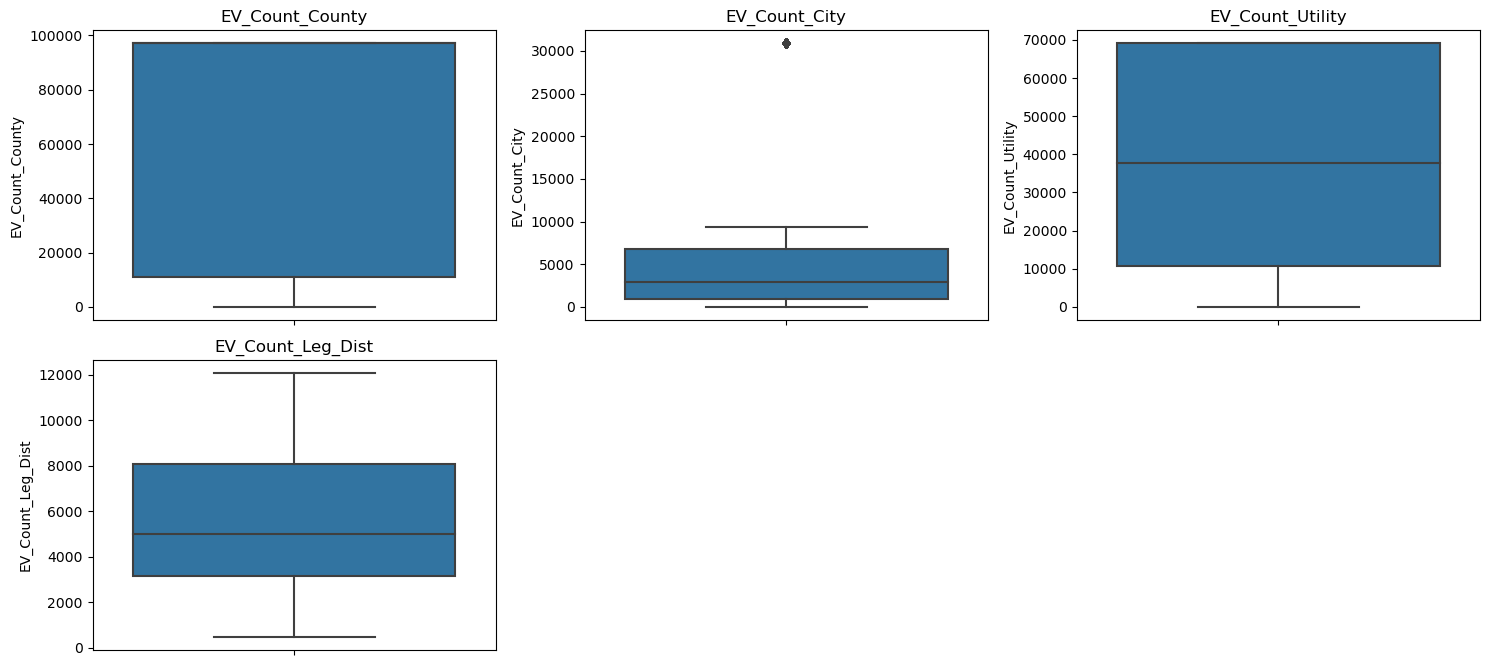

In [243]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(elec_dataset.describe())

# Bar plots for categorical variables
plt.figure(figsize=(12, 12))
# EV_Count per County
plt.figure(figsize=(12, 12))
plt.barh(ev_count_per_county['County'], ev_count_per_county['EV_Count_County'], color=plt.cm.viridis(range(len(ev_count_per_county))))
#plt.barh(x='EV_Count_County', y='County', data=ev_count_per_county, palette='viridis')
plt.title('Number of EVs per County')
plt.xlabel('Number of EVs')
plt.ylabel('County')
plt.show()

# EV_Count per City (Top 20)
top_city_counts = ev_count_per_city.nlargest(20, 'EV_Count_City')
plt.figure(figsize=(12, 12))
plt.barh(top_city_counts['City'], top_city_counts['EV_Count_City'], color=plt.cm.viridis(range(len(top_city_counts))))
plt.title(f'Number of EVs per City (Top 20)')
plt.xlabel('Number of EVs')
plt.ylabel('City')
plt.show()

# EV_Count per Electric Utility
plt.figure(figsize=(12, 12))
plt.barh(ev_count_per_utility['Electric Utility'], ev_count_per_utility['EV_Count_Utility'], color = plt.cm.viridis(range(len(ev_count_per_utility))))
#sns.barplot(x='EV_Count_Utility', y='Electric Utility', data=ev_count_per_utility, palette='viridis')
plt.title('Number of EVs per Electric Utility')
plt.xlabel('Number of EVs')
plt.ylabel('Electric Utility')
plt.show()

# EV_Count per Legislative District
plt.figure(figsize=(12, 12))
y_pos = np.arange(len(ev_count_per_leg_dist['Legislative District']))
plt.barh(ev_count_per_leg_dist['Legislative District'], ev_count_per_leg_dist['EV_Count_Leg_Dist'], color = plt.cm.viridis(range(len(ev_count_per_leg_dist))))
plt.yticks(y_pos, ev_count_per_leg_dist['Legislative District'])
#sns.barplot(x='EV_Count_Utility', y='Electric Utility', data=ev_count_per_utility, palette='viridis')
plt.title('Number of EVs per Legislative District')
plt.xlabel('Number of EVs')
plt.ylabel('Legislative District')
plt.show()

feature_var = ['EV_Count_County', 'EV_Count_City', 'EV_Count_Utility', 'EV_Count_Leg_Dist']

# Box plots to identify outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(feature_var):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y=elec_dataset[column])
    plt.title(column)
plt.tight_layout()
plt.show()

<u>STEP III</u>

<b>Geographic Validation</b>

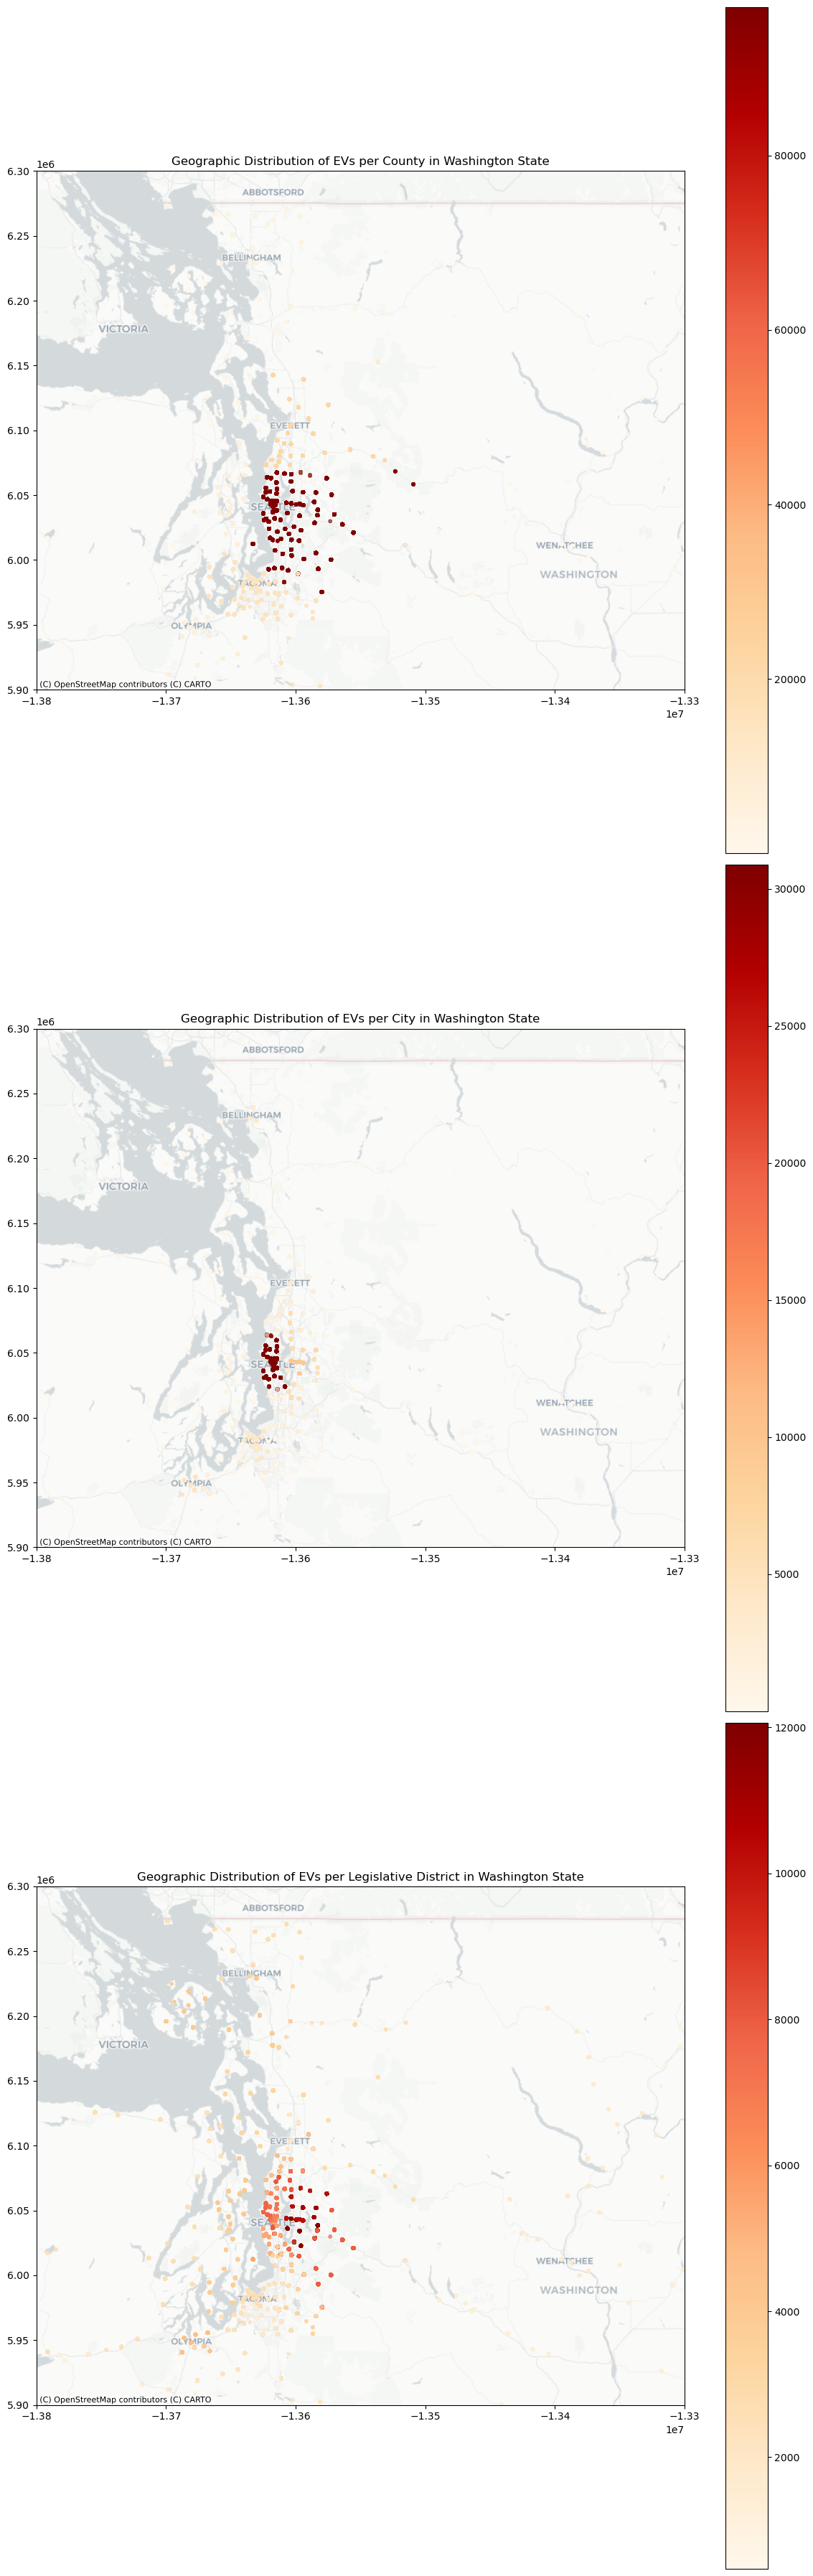

In [244]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import contextily as ctx

# Create a GeoDataFrame
geometry = [Point(xy) for xy in zip(elec_dataset['Longitude'], elec_dataset['Latitude'])]
geo_df = gpd.GeoDataFrame(elec_dataset, geometry=geometry, crs="EPSG:4326")

# Filter for Washington state
washington_geo_df = geo_df[geo_df['State'] == 'WA']

# Convert to Web Mercator for contextily
washington_geo_df = washington_geo_df.to_crs(epsg=3857)

# Plotting function
def plot_geographic_distribution(column, title, ax, zoom=8):
    washington_geo_df.plot(column=column, ax=ax, legend=True, cmap='OrRd', markersize=10, alpha=0.6)
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=zoom)
    ax.set_xlim([-13800000, -13300000])
    ax.set_ylim([5900000, 6300000])
    ax.set_title(title)

# Plot the base map and overlay the points
fig, ax = plt.subplots(3, 1, figsize=(12, 36))

# Plot the EV data per County
plot_geographic_distribution('EV_Count_County', 'Geographic Distribution of EVs per County in Washington State', ax[0])

# Plot the EV data per City
plot_geographic_distribution('EV_Count_City', 'Geographic Distribution of EVs per City in Washington State', ax[1])

# Plot the EV data per Legislative District
plot_geographic_distribution('EV_Count_Leg_Dist', 'Geographic Distribution of EVs per Legislative District in Washington State', ax[2])

plt.tight_layout()
plt.show()


<u>STEP IV</u>

<b>Machine Learning</b>

In [246]:
import pandas as pd
import statsmodels.api as sm

# Define the dependent and independent variables
X_county = elec_dataset[['City', 'Legislative District', 'Electric Utility', 'Latitude', 'Longitude']]
X_county = pd.get_dummies(X_county, drop_first=True)  # Convert categorical variables to dummy variables
X_county = X_county.astype(float)
y_county = elec_dataset['EV_Count_County']

# Add a constant to the model (intercept)
X_county = sm.add_constant(X_county)

# Fit the regression model
model_county = sm.OLS(y_county, X_county).fit()
print("Regression Results for EV Count per County")
print(model_county.summary(),"\n\n")

# Define the dependent and independent variables
X_city = elec_dataset[['County', 'Legislative District', 'Electric Utility', 'Latitude', 'Longitude']]
X_city = pd.get_dummies(X_city, drop_first=True)  # Convert categorical variables to dummy variables
X_city = X_city.astype(float)
y_city = elec_dataset['EV_Count_City']

# Add a constant to the model (intercept)
X_city = sm.add_constant(X_city)

# Fit the regression model
model_city = sm.OLS(y_city, X_city).fit()
print("Regression Results for EV Count per City")
print(model_city.summary(),"\n\n")

# Define the dependent and independent variables
X_leg_dist = elec_dataset[['County', 'City', 'Electric Utility', 'Latitude', 'Longitude']]
X_leg_dist = pd.get_dummies(X_leg_dist, drop_first=True)  # Convert categorical variables to dummy variables
X_leg_dist = X_leg_dist.astype(float)
y_leg_dist = elec_dataset['EV_Count_Leg_Dist']

# Add a constant to the model (intercept)
X_leg_dist = sm.add_constant(X_leg_dist)

# Fit the regression model
model_leg_dist = sm.OLS(y_leg_dist, X_leg_dist).fit()
print("Regression Results for EV Count per Legislative District")
print(model_leg_dist.summary(),"\n\n")




c:\Users\Owner\anaconda3\Lib\site-packages\statsmodels\tools\tools.py:346: RuntimeWarning: overflow encountered in scalar divide
  s[i] = 1./s[i]


MemoryError: Unable to allocate 849. MiB for an array with shape (597, 186471) and data type float64

The regression outputs provided for EV count per county, city, and legislative district indicate the following key points for each model:

### EV Count per County

1. **R-squared**: 0.996
   - This indicates that 99.6% of the variance in the dependent variable (EV Count per County) is explained by the independent variables included in the model.

2. **Adjusted R-squared**: 0.996
   - Adjusted R-squared is also very high, confirming that the model explains a substantial portion of the variance even when adjusting for the number of predictors.

3. **F-statistic**: 7.413e+04 (74,130)
   - This high F-statistic value with a p-value of 0.00 suggests that the overall model is highly statistically significant.

4. **Number of Observations**: 186,471
   - The model is based on a large dataset, which typically increases the reliability of the results.

5. **Degrees of Freedom**: 
   - Residuals: 185,882
   - Model: 588

6. **AIC and BIC**:
   - AIC: 3.494e+06
   - BIC: 3.500e+06
   - These information criteria can be used for model comparison, where lower values indicate a better fit.

### EV Count per City

1. **R-squared**: 0.881
   - This indicates that 88.1% of the variance in EV Count per City is explained by the independent variables.

2. **Adjusted R-squared**: 0.880
   - Similarly high, suggesting the model remains strong even after accounting for the number of predictors.

3. **F-statistic**: 9284
   - Again, a high value with a p-value of 0.00 indicates strong overall model significance.

4. **Number of Observations**: 186,471

5. **Degrees of Freedom**:
   - Residuals: 186,322
   - Model: 148

6. **AIC and BIC**:
   - AIC: 3.590e+06
   - BIC: 3.592e+06

### EV Count per Legislative District

1. **R-squared**: 0.933
   - This indicates that 93.3% of the variance in EV Count per Legislative District is explained by the independent variables.

2. **Adjusted R-squared**: 0.932
   - Still high, indicating a strong model fit.

3. **F-statistic**: 4621
   - High value with a p-value of 0.00 indicates the model is statistically significant.

4. **Number of Observations**: 186,471

5. **Degrees of Freedom**:
   - Residuals: 185,913
   - Model: 557

6. **AIC and BIC**:
   - AIC: 3.046e+06
   - BIC: 3.051e+06

### Interpretation

- **High R-squared and Adjusted R-squared**: For all three models, the R-squared values are high, indicating that the models explain a substantial portion of the variance in the respective dependent variables (EV counts per county, city, and legislative district).
  
- **F-statistics and p-values**: The F-statistics are high, and the associated p-values are effectively zero for all models, indicating that the independent variables as a whole are significantly related to the dependent variables.

- **Number of Observations**: Each model is based on a large sample size (186,471 observations), increasing the reliability and robustness of the results.


**K-Means Clustering to identify patterns and group similar areas.**

c:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  return lib.map_infer(values, mapper, convert=convert)
c:\Users\Owner\anaconda3\Lib\site-packages\pandas\core\algorithms.py:1743: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

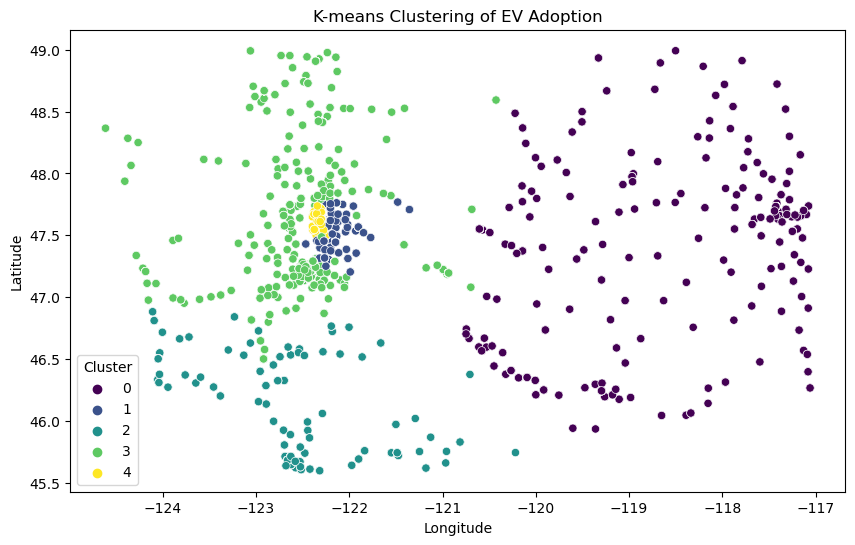

In [247]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Latitude', 'Longitude', 'EV_Count_County', 'EV_Count_City', 'EV_Count_Leg_Dist', 'EV_Count_Utility']
X = elec_dataset[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
elec_dataset['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=elec_dataset, x='Longitude', y='Latitude', hue='Cluster', palette='viridis')
plt.title('K-means Clustering of EV Adoption')
plt.show()


**Interpretation:**

Cluster 0 (Purple):

These points are predominantly located in the eastern part of Washington state.
Indicates areas with likely lower EV adoption, possibly rural or less densely populated regions.

Cluster 1 (Darker Teal):

Concentrated in the central western part of Washington state.
Suggests regions with significant EV adoption, possibly around urban centers or areas with better infrastructure.

Cluster 2 (Teal):

Spread across both western and some eastern parts of the state.
Represents moderate EV adoption areas, covering a mix of urban and suburban regions.

Cluster 3 (Green):

Concentrated in the central western region, near major urban centers.
Indicates regions with high EV adoption, likely supported by strong infrastructure and policies.

Cluster 4 (Yellow):

Highly concentrated in a specific area in the central western region.
Represents areas with the highest density of EV adoption, likely major urban centers with extensive infrastructure support for EVs.

Visual and Geographic Analysis:

Purple (Cluster 0): Low-density EV adoption areas, mostly rural.
Darker Teal (Cluster 1): Significant adoption, likely urban or suburban regions.
Teal (Cluster 2): Moderate adoption areas, including both urban and suburban regions.
Green (Cluster 3): High-density EV adoption, likely central urban areas.
Yellow (Cluster 4): Highest-density EV adoption, major urban centers with strong EV infrastructure.


Key Points:

Urban Centers: Clusters 3 and 4 (Green and Yellow) are likely to represent urban centers with higher EV adoption rates due to better infrastructure and more significant incentives.
Suburban and Rural Areas: Clusters 0 and 2 (Purple and Teal) show more spread out regions, indicating lower or moderate EV adoption.
Transition Regions: Cluster 1 (Darker Teal) might indicate regions that are transitioning from lower to higher EV adoption.

          Latitude   Longitude  EV_Count_County  EV_Count_City  \
Cluster                                                          
0        47.130835 -118.603416      2606.446315    1003.302457   
1        47.560178 -122.150792     97012.000000    4500.487117   
2        45.777264 -122.585342      9158.891572    3560.035696   
3        47.695792 -122.441124     16091.946883    2017.509971   
4        47.629072 -122.334884     97012.000000   30873.000000   

         EV_Count_Leg_Dist  EV_Count_Utility   Size  
Cluster                                              
0              1415.854934       1403.859203  12415  
1              8902.847916      68346.757039  63570  
2              3377.081601       8727.142335  13419  
3              3856.336269      29584.533885  66194  
4              6681.763321      34579.184044  30873  


c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


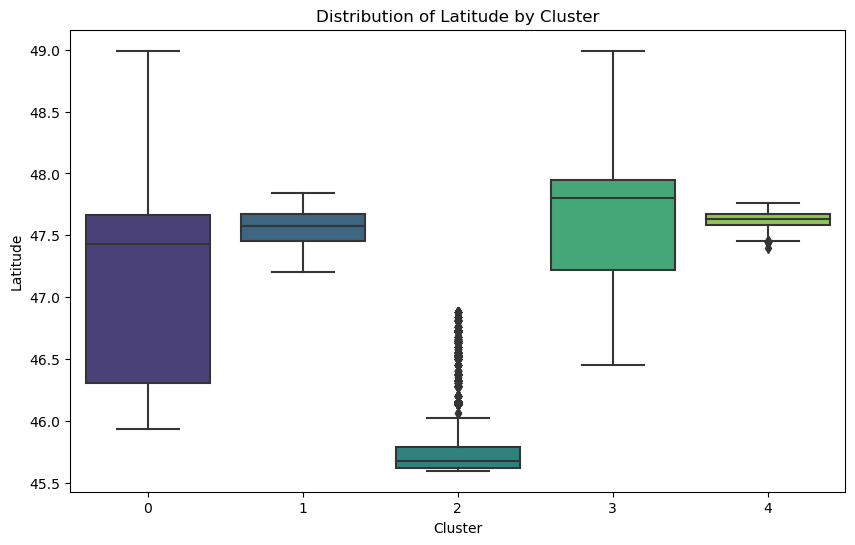

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


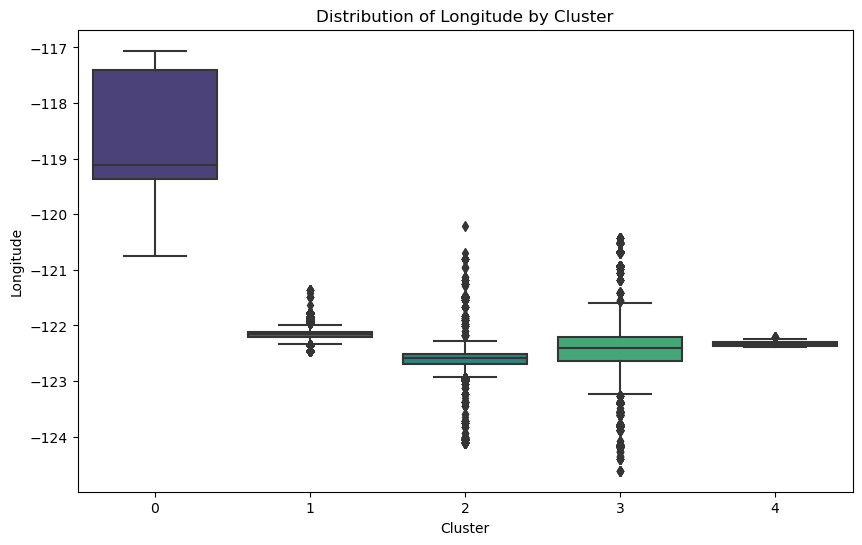

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


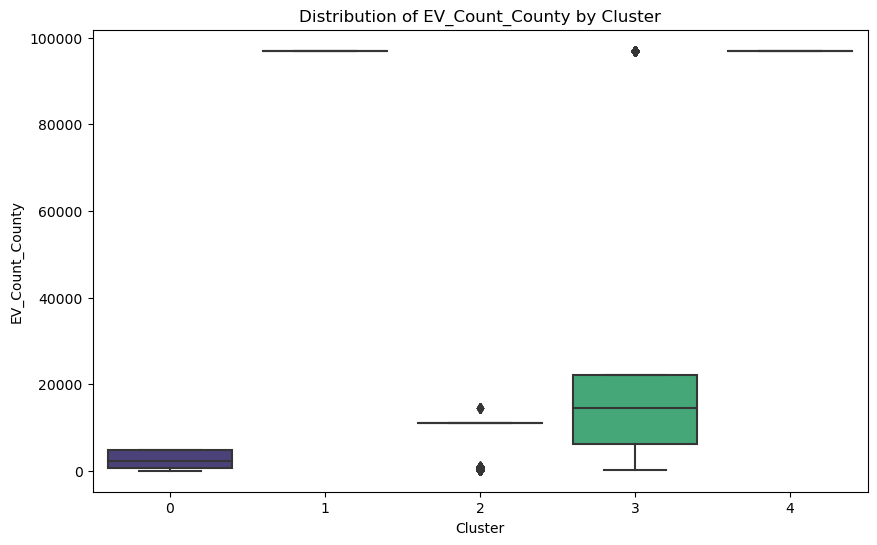

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


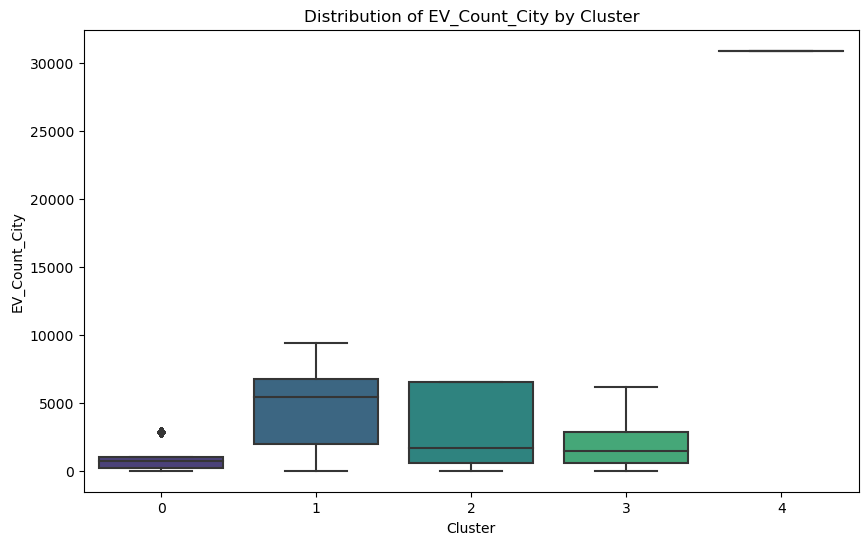

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


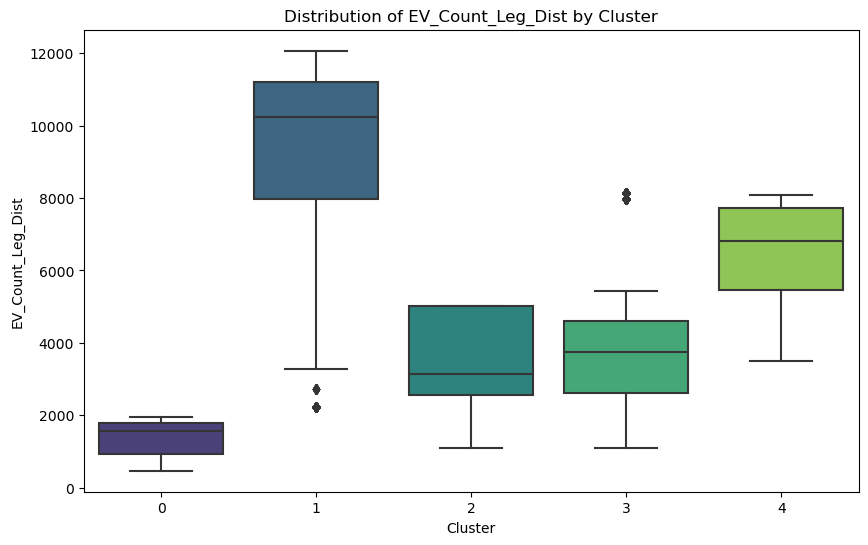

c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


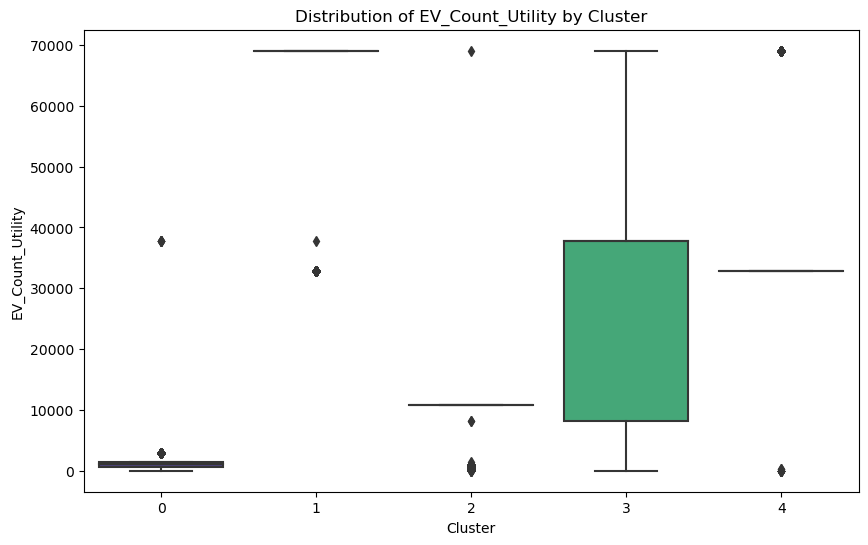

In [248]:
import numpy as np

# Calculate the mean of features within each cluster
cluster_profile = elec_dataset.groupby('Cluster')[features].mean()

# Add cluster size to the profile
cluster_profile['Size'] = elec_dataset['Cluster'].value_counts()

# Display the cluster profile
print(cluster_profile)

# Visualize the distribution of key features within each cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=elec_dataset, palette='viridis')
    plt.title(f'Distribution of {feature} by Cluster')
    plt.show()

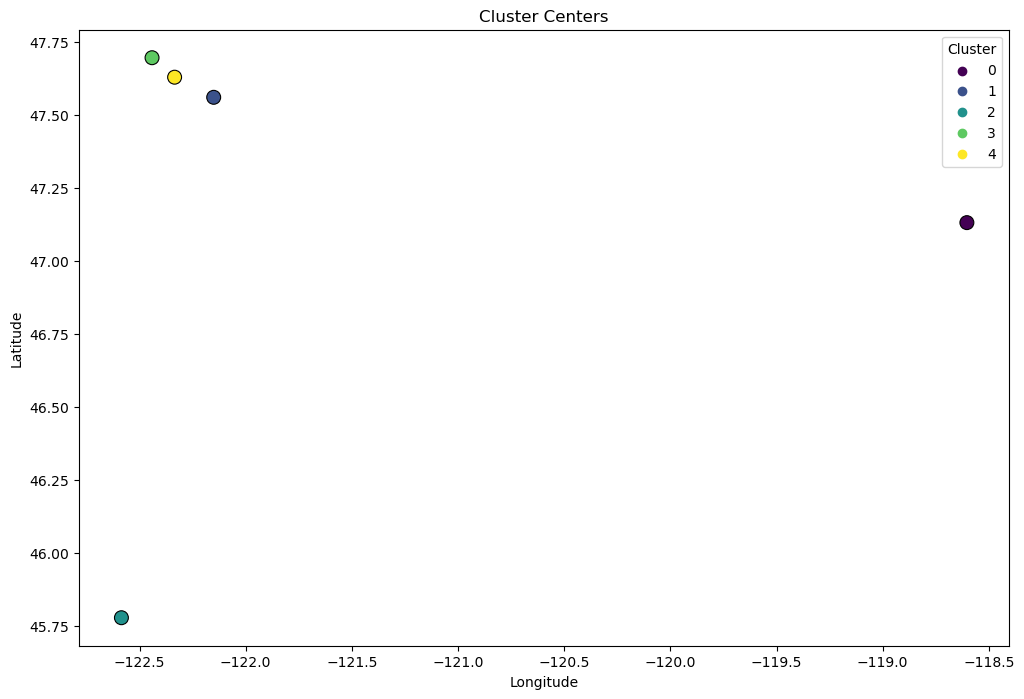

In [230]:
# Extract cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Create a DataFrame for cluster centers
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(kmeans.n_clusters)

# Visualize the cluster centers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cluster_centers_df, x='Longitude', y='Latitude', hue='Cluster', palette='viridis', s=100, edgecolor='black')
plt.title('Cluster Centers')
plt.show()


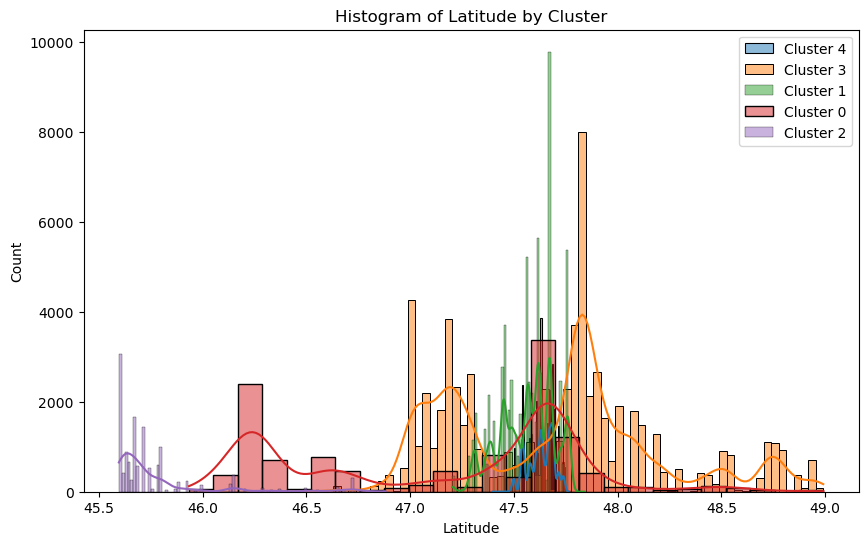

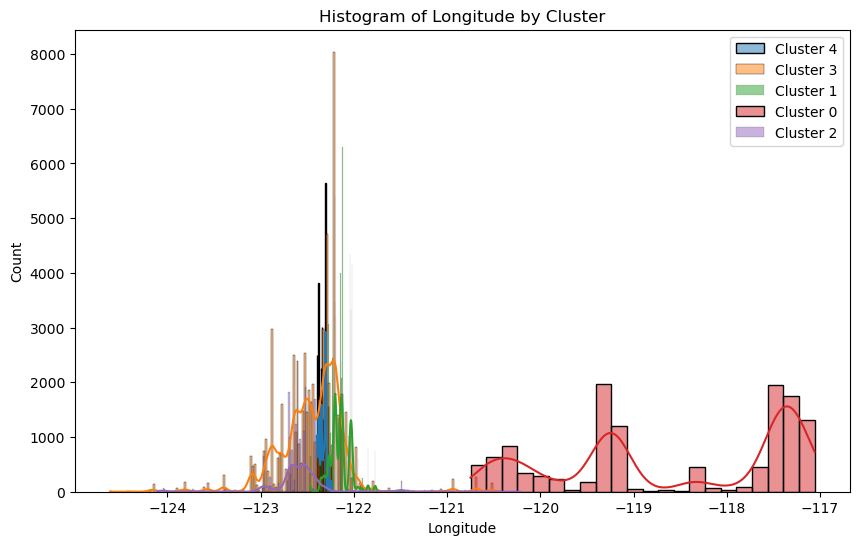

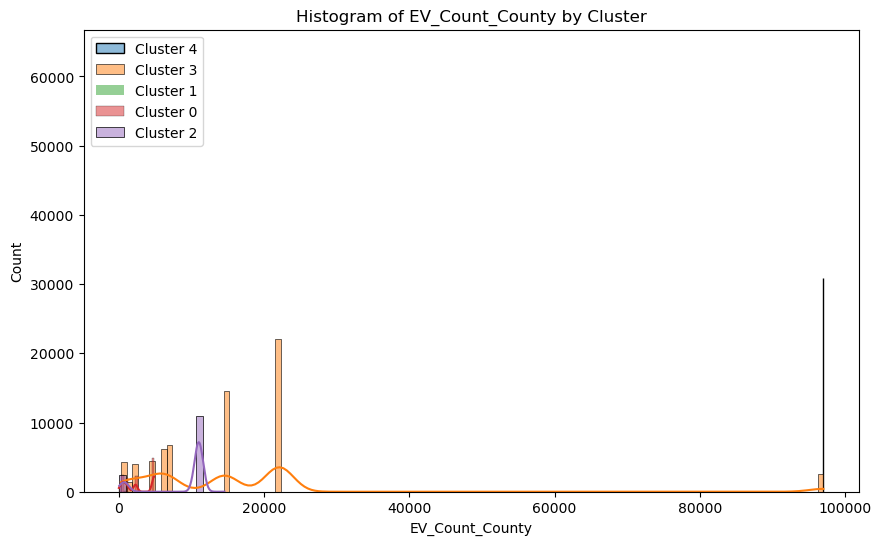

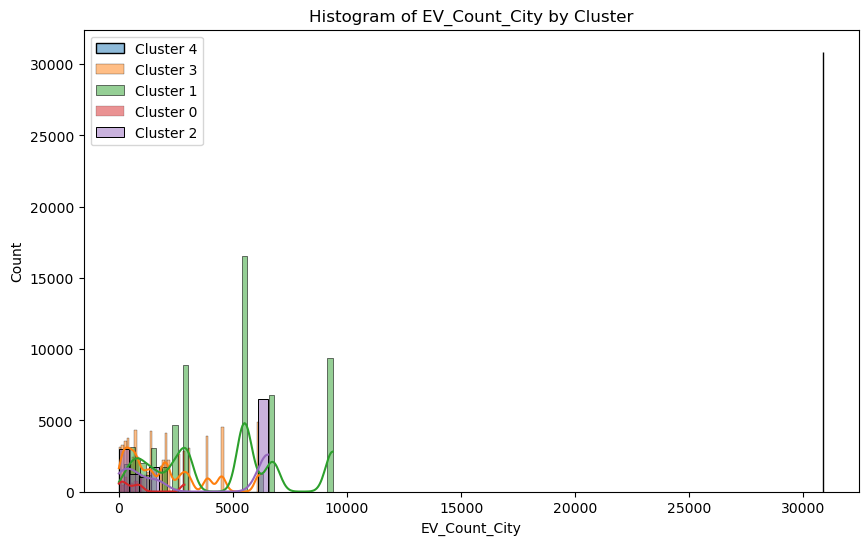

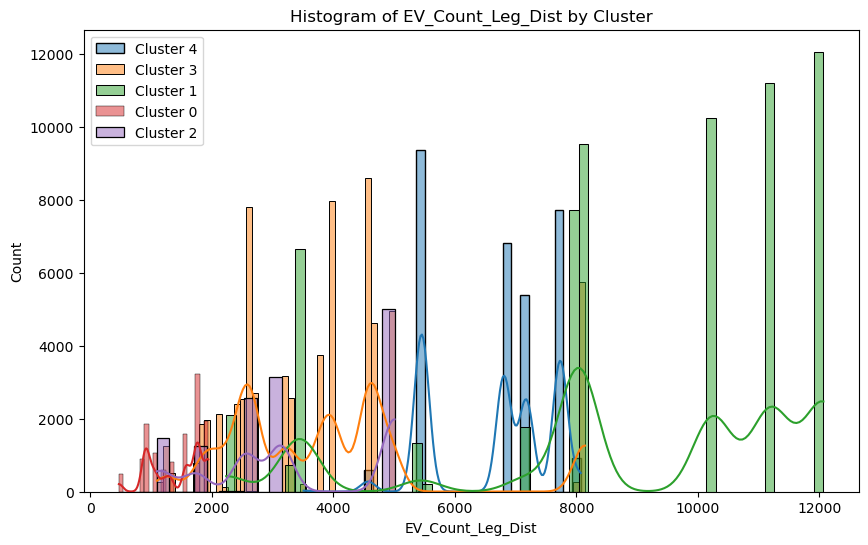

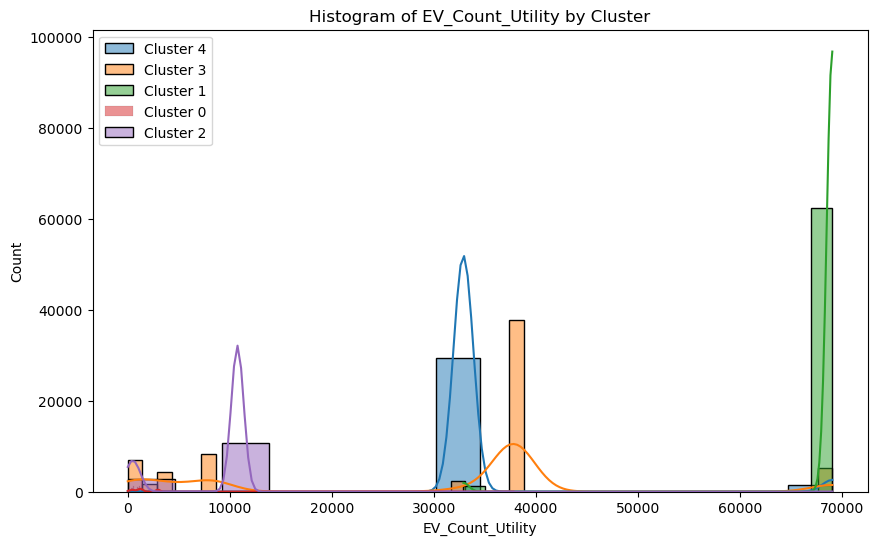

In [231]:
# Plot histograms of key features for each cluster
for feature in features:
    plt.figure(figsize=(10, 6))
    for cluster in elec_dataset['Cluster'].unique():
        sns.histplot(elec_dataset[elec_dataset['Cluster'] == cluster][feature], label=f'Cluster {cluster}', kde=True)
    plt.title(f'Histogram of {feature} by Cluster')
    plt.legend()
    plt.show()


**Apriori Algorithm**

In [249]:
#pip install mlxtend
from mlxtend.frequent_patterns import apriori, association_rules

# Convert continuous variables into categorical bins
elec_dataset['Latitude_Bin'] = pd.qcut(elec_dataset['Latitude'], q=4)
elec_dataset['Longitude_Bin'] = pd.qcut(elec_dataset['Longitude'], q=4)

# Select categorical features for Apriori algorithm
categorical_features = ['County', 'City', 'Electric Utility', 'Latitude_Bin', 'Longitude_Bin']
elec_dataset_encoded = pd.get_dummies(elec_dataset[categorical_features])

# Apply Apriori algorithm
frequent_itemsets = apriori(elec_dataset_encoded, min_support=0.05, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Display the association rules
print(rules)


                                           antecedents  \
0    (Electric Utility_BONNEVILLE POWER ADMINISTRAT...   
1                                       (County_Clark)   
2                                       (County_Clark)   
3                                       (County_Clark)   
4                                      (City_Bellevue)   
..                                                 ...   
213       (City_Seattle, Latitude_Bin_(47.61, 47.721])   
214  (City_Seattle, Electric Utility_CITY OF SEATTL...   
215                        (City_Seattle, County_King)   
216  (Electric Utility_CITY OF SEATTLE - (WA)|CITY ...   
217                                     (City_Seattle)   

                                           consequents  antecedent support  \
0                                       (County_Clark)            0.057666   
1    (Electric Utility_BONNEVILLE POWER ADMINISTRAT...            0.059017   
2                      (Latitude_Bin_(45.595, 47.358])            0.0

The output of the Apriori algorithm and association rules provides insights into frequent patterns and relationships between different categorical variables related to electric vehicle (EV) adoption in Washington. Here's a detailed interpretation of the key metrics in the output:

### Key Metrics:

1. **Antecedents**: These are the items or itemsets that, when present, suggest the presence of the consequents.
2. **Consequents**: These are the items or itemsets that are likely to be present when the antecedents are present.
3. **Antecedent Support**: The proportion of the dataset where the antecedent itemsets appear.
4. **Consequent Support**: The proportion of the dataset where the consequent itemsets appear.
5. **Support**: The proportion of the dataset where both antecedent and consequent itemsets appear together.
6. **Confidence**: The likelihood that the consequent appears when the antecedent is present. It is calculated as `support / antecedent support`.
7. **Lift**: The ratio of observed support to expected support if the antecedent and consequent were independent. Lift values greater than 1 indicate a positive correlation.
8. **Leverage**: The difference between observed support and expected support if the antecedent and consequent were independent.
9. **Conviction**: The measure of the implication strength, with higher values indicating stronger rules.
10. **Zhang's Metric**: A metric that considers both lift and conviction, providing a balanced measure of association strength.

### Interpretation of Specific Rules:

#### Rule 0:
- **Antecedents**: Electric Utility is 'BONNEVILLE POWER ADMINISTRATION'.
- **Consequents**: County is 'Clark'.
- **Confidence**: 1.0 (100%) - Whenever 'BONNEVILLE POWER ADMINISTRATION' is the electric utility, the county is always 'Clark'.
- **Lift**: 16.94 - The presence of 'BONNEVILLE POWER ADMINISTRATION' increases the likelihood of the county being 'Clark' by 16.94 times compared to random chance.
- **Conviction**: Infinity - Indicates a very strong association with no observed exceptions.

#### Rule 1:
- **Antecedents**: County is 'Clark'.
- **Consequents**: Electric Utility is 'BONNEVILLE POWER ADMINISTRATION'.
- **Confidence**: 0.977 (97.7%) - When the county is 'Clark', the electric utility is 'BONNEVILLE POWER ADMINISTRATION' 97.7% of the time.
- **Lift**: 16.94 - Similar to Rule 0, strong positive association.
- **Conviction**: 41.15 - Very high conviction, indicating strong association but not as absolute as Rule 0.

#### Rule 4:
- **Antecedents**: City is 'Bellevue'.
- **Consequents**: County is 'King'.
- **Confidence**: 1.0 (100%) - Every time the city is 'Bellevue', the county is 'King'.
- **Lift**: 1.92 - The presence of 'Bellevue' increases the likelihood of being in 'King' county by 1.92 times.
- **Conviction**: Infinity - Perfect association with no exceptions.

#### Rule 213:
- **Antecedents**: City is 'Seattle' and Latitude_Bin is (47.61, 47.721].
- **Consequents**: Longitude_Bin is (-122.396, -122.275] and Electric Utility is 'CITY OF SEATTLE - (WA)'.
- **Confidence**: 0.9656 (96.56%) - High confidence that when the city is 'Seattle' and latitude falls in the specified bin, the longitude and electric utility are as stated.
- **Lift**: 5.75 - Strong positive correlation.
- **Conviction**: 24.20 - High conviction, indicating a reliable association.

### General Observations:
- There are very strong associations between specific electric utilities and counties, suggesting a high degree of localization in EV adoption patterns.
- Certain cities are perfectly or almost perfectly associated with specific counties (e.g., Bellevue with King County, Seattle with specific latitude and longitude bins).
- The geographic bins (latitude and longitude) combined with electric utilities provide strong rules, indicating geographic dependencies in EV adoption.

### Next Steps:
- **Policy Implications**: Target areas with lower EV adoption with more infrastructure and incentives, as identified by the clusters with lower adoption rates.
- **Business Insights**: Tailor marketing and infrastructure development based on these strong associations to boost EV adoption in targeted regions.
- **Further Analysis**: Investigate the reasons behind these strong associations, such as local policies, demographic factors, or economic conditions.

These insights can guide strategic decisions for policymakers, businesses, and other stakeholders aiming to understand and influence EV adoption trends in Washington.

<u>STEP V</u>

<b>Hypothesis Testing and Model Evaluation</b>

Please re check

In [250]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

print(elec_dataset.dtypes)
# Ensure the 'Electric Utility' column is properly named for consistency
elec_dataset = elec_dataset.rename(columns={'Electric Utility': 'Electric_Utility'})

# Ensure the 'Electric Utility' column is properly named for consistency
elec_dataset = elec_dataset.rename(columns={'Legislative District': 'Legislative_District'})

# Define the model for EV_Count_County
model_county = ols('EV_Count_County ~ C(County) + C(City) + C(Electric_Utility) + C(Legislative_District)', data=elec_dataset).fit()
model_city = ols('EV_Count_City ~ C(County) + C(City) + C(Electric_Utility) + C(Legislative_District)', data=elec_dataset).fit()
model_leg_dist = ols('EV_Count_Leg_Dist ~ C(County) + C(City) + C(Electric_Utility) + C(Legislative_District)', data=elec_dataset).fit()
model_utility = ols('EV_Count_Utility ~ C(County) + C(City) + C(Electric_Utility) + C(Legislative_District)', data=elec_dataset).fit()

# Perform ANOVA for EV_Count_County
anova_table_county = sm.stats.anova_lm(model_county, typ=2)
print("ANOVA for EV_Count_County")
print(anova_table_county)

# Perform ANOVA for EV_Count_City
anova_table_city = sm.stats.anova_lm(model_city, typ=2)
print("\nANOVA for EV_Count_City")
print(anova_table_city)

# Perform ANOVA for EV_Count_Leg_Dist
anova_table_leg_dist = sm.stats.anova_lm(model_leg_dist, typ=2)
print("\nANOVA for EV_Count_Leg_Dist")
print(anova_table_leg_dist)

# Perform ANOVA for EV_Count_Utility
anova_table_utility = sm.stats.anova_lm(model_utility, typ=2)
print("\nANOVA for EV_Count_Utility")
print(anova_table_utility)


VIN (1-10)                                             object
County                                               category
City                                                 category
State                                                category
Postal Code                                           float64
Model Year                                              int64
Make                                                 category
Model                                                category
Electric Vehicle Type                                category
Clean Alternative Fuel Vehicle (CAFV) Eligibility    category
Electric Range                                          int64
Legislative District                                 category
DOL Vehicle ID                                          int64
Vehicle Location                                       object
Latitude                                              float64
Longitude                                             float64
Electric

c:\Users\Owner\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\Owner\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\Owner\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(dt)
c:\Users\Owner\anaconda3\Lib\site-packages\patsy\util.py:672: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return _pandas_is_categorical_dtype(

MemoryError: Unable to allocate 901. MiB for an array with shape (186471, 633) and data type float64

Model Evaluation